<a href="https://colab.research.google.com/github/lkhart/football_penny_app/blob/main/LineUP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LineUP Data Analysis Report**

Initial data report for 2021 NFL game data used in designing the Penny defense optimization application.

LineUP team: Bennett Falck, Laura Hart, Michael Stadt

15 October 2023

## Dataset Analysis

Contextual information and descriptive analysis for each of the datasets provided on Kaggle:



*   Game Data
*   Player Data
*   Play Data
*   Tracking Data


Source: [NFL Big Data Bowl 2021](https://www.kaggle.com/competitions/nfl-big-data-bowl-2021/overview)



Setup

Import libraries and load datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games_df = pd.read_csv('games.csv')
players_df = pd.read_csv('players.csv')
plays_df = pd.read_csv('plays.csv')
week1_df = pd.read_csv('week1.csv')
week2_df = pd.read_csv('week2.csv')
week3_df = pd.read_csv('week3.csv')
week4_df = pd.read_csv('week4.csv')
week5_df = pd.read_csv('week5.csv')
week6_df = pd.read_csv('week6.csv')
week7_df = pd.read_csv('week7.csv')
week8_df = pd.read_csv('week8.csv')
week9_df = pd.read_csv('week9.csv')
week10_df = pd.read_csv('week10.csv')
week11_df = pd.read_csv('week11.csv')
week12_df = pd.read_csv('week12.csv')
week13_df = pd.read_csv('week13.csv')
week14_df = pd.read_csv('week14.csv')
week15_df = pd.read_csv('week15.csv')
week16_df = pd.read_csv('week16.csv')
week17_df = pd.read_csv('week17.csv')

### **Game Data**: 'games.csv'

**Overview**

Basic properties of the 'games.csv' dataset, which contains the teams playing in each game. The key variable is gameID.

In [2]:
# data sample display (first few rows)
games_df.head()

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1
1  2018090901  09/09/2018        13:00:00          CLE             PIT     1
2  2018090902  09/09/2018        13:00:00          IND             CIN     1
3  2018090903  09/09/2018        13:00:00          MIA             TEN     1
4  2018090900  09/09/2018        13:00:00          BAL             BUF     1

In [3]:
# describe data types and non-null values
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


**Distribution of Games per Week**

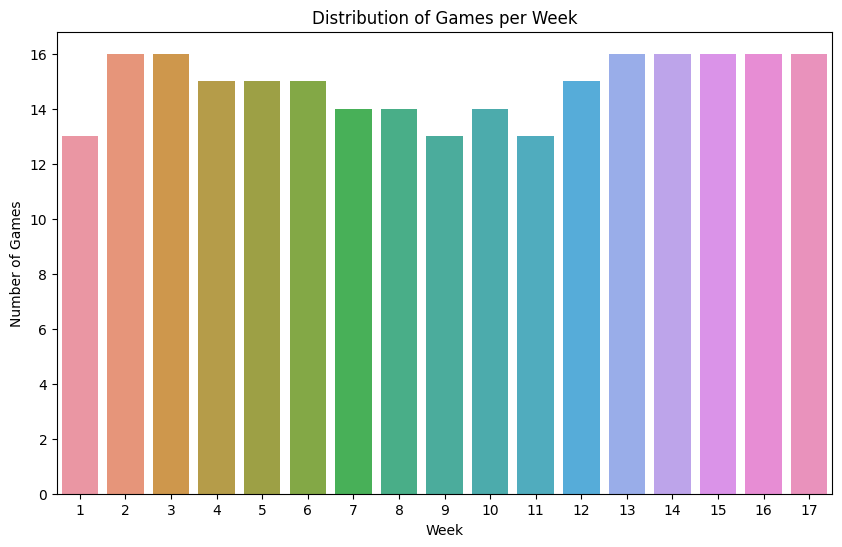

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data=games_df, x='week')
plt.title('Distribution of Games per Week')
plt.xlabel('Week')
plt.ylabel('Number of Games')
plt.show()

**Teams Hosting Games**

Display how many times each team hosted a game.

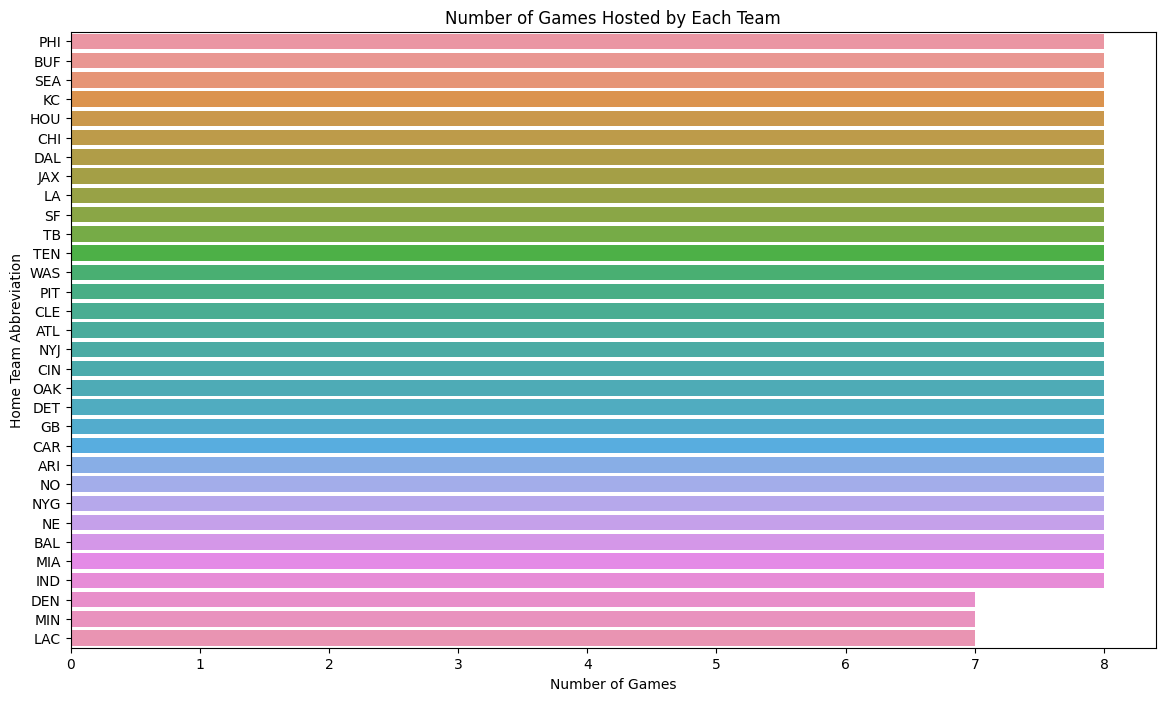

In [5]:
plt.figure(figsize=(14,8))
sns.countplot(data=games_df, y='homeTeamAbbr', order = games_df['homeTeamAbbr'].value_counts().index)
plt.title('Number of Games Hosted by Each Team')
plt.xlabel('Number of Games')
plt.ylabel('Home Team Abbreviation')
plt.show()

**Teams Visiting for Games**

Display how many times each team played as a visitor.

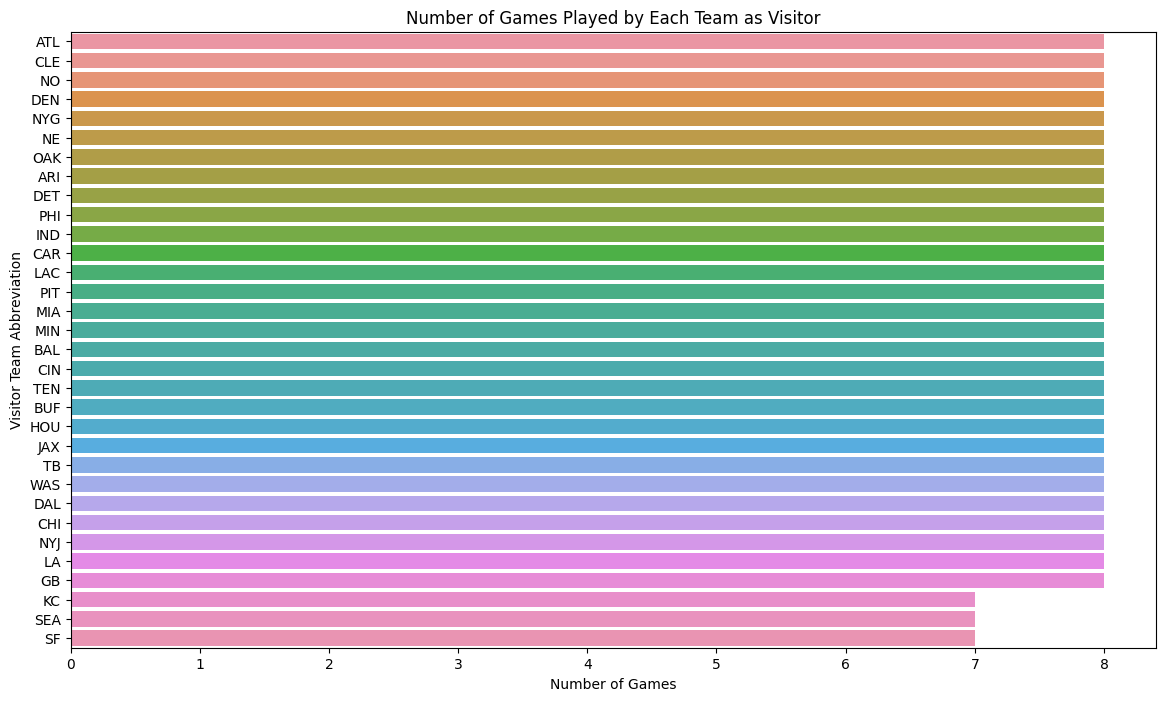

In [6]:
plt.figure(figsize=(14,8))
sns.countplot(data=games_df, y='visitorTeamAbbr', order = games_df['visitorTeamAbbr'].value_counts().index)
plt.title('Number of Games Played by Each Team as Visitor')
plt.xlabel('Number of Games')
plt.ylabel('Visitor Team Abbreviation')
plt.show()

**Game Distribution by Date**

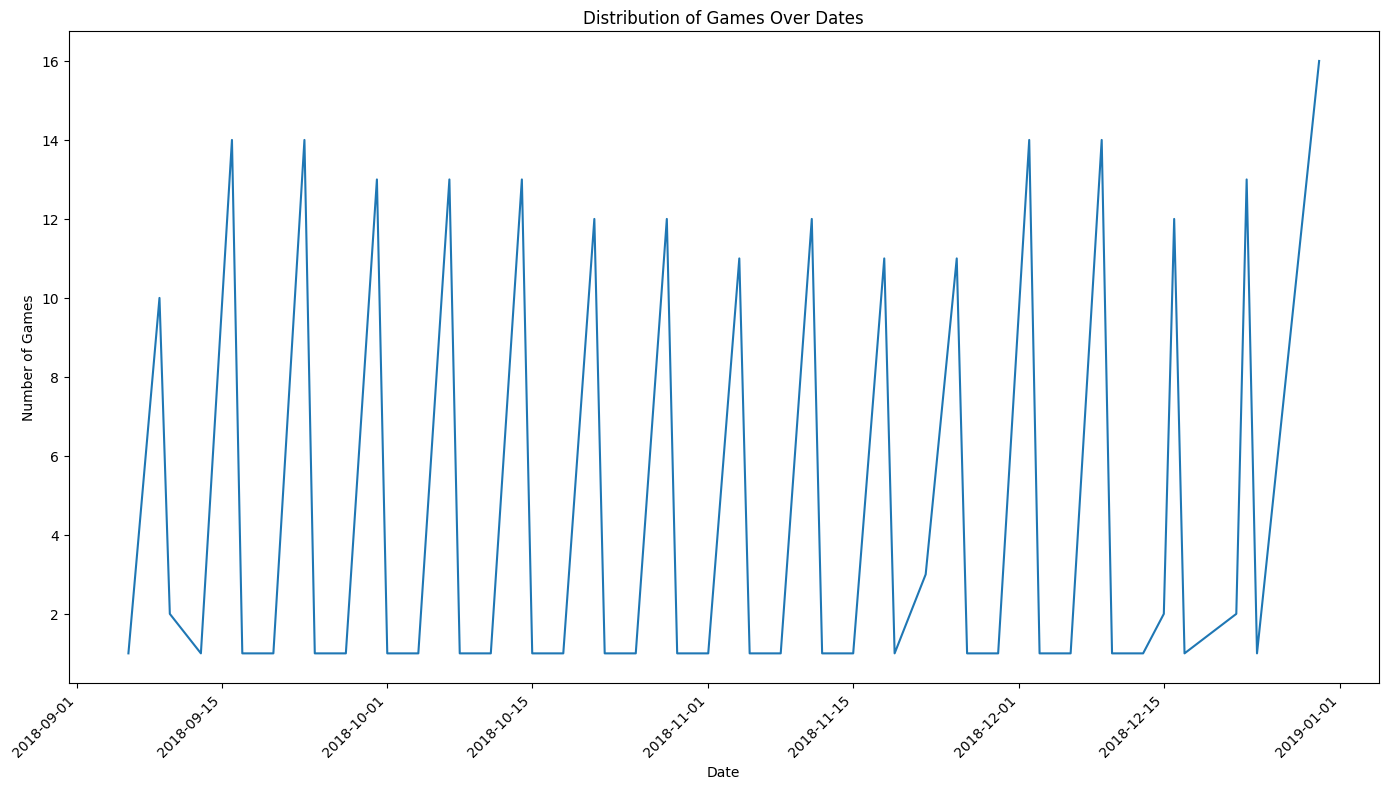

In [7]:
games_df['gameDate'] = pd.to_datetime(games_df['gameDate'])
games_date_distribution = games_df['gameDate'].value_counts().sort_index()

plt.figure(figsize=(14,8))
games_date_distribution.plot()
plt.title('Distribution of Games Over Dates')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Missing Data Check**

In [17]:
games_df.isnull().sum()


gameId             0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
week               0
dtype: int64

**Duplicate ID Check**

In [19]:
games_df['gameId'].duplicated().sum()

0

### **Player Data**: 'players.csv'

**Overview**

Player-level information from players that participated in any of the 2021 games included in the tracking files. The key variable is nflId.

In [8]:
# data sample display (first few rows)
players_df.head()

nflId height  weight   birthDate             collegeName position  \
0  2539334     72     190  1990-09-10              Washington       CB   
1  2539653     70     186  1988-11-01  Southeastern Louisiana       CB   
2  2543850     69     186  1991-12-18                  Purdue       SS   
3  2555162     73     227  1994-11-04         Louisiana State      MLB   
4  2555255     75     232  1993-07-01               Minnesota      OLB   

          displayName  
0     Desmond Trufant  
1       Robert Alford  
2       Ricardo Allen  
3         Deion Jones  
4  De'Vondre Campbell

In [9]:
# describe data types and non-null values
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


**Distribution of Player Heights**

The original format of this data had inconsistent formatting for this column, so before we can proceed, we must convert all heights to the same unit (inches).

In [11]:
# convert all player heights to inches

def convert_height_to_inches(height_str):
    if '-' in height_str:
        feet, inches = map(int, height_str.split('-'))
        return (feet * 12) + inches
    else:
        return int(height_str)

players_df['height'] = players_df['height'].apply(convert_height_to_inches)



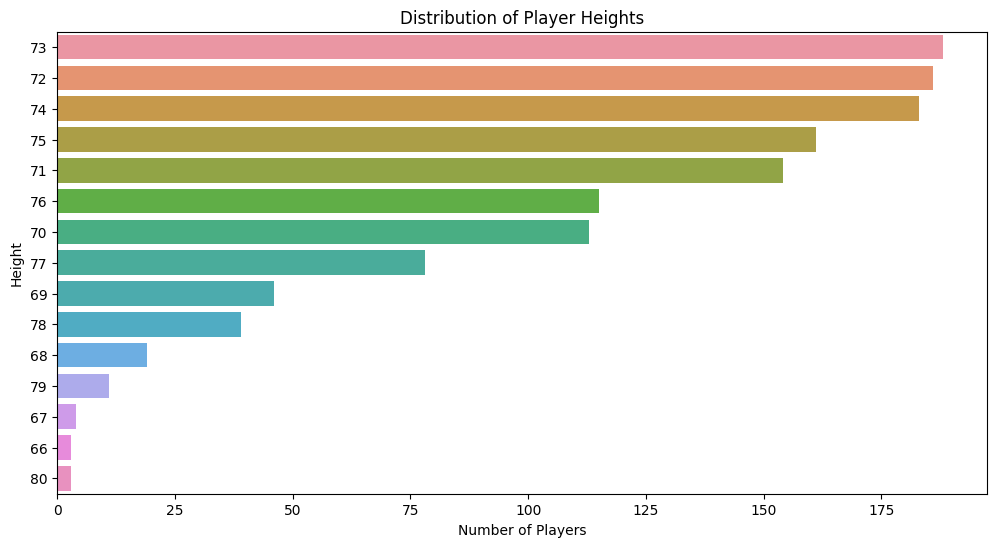

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=players_df, y='height', order = players_df['height'].value_counts().index)
plt.title('Distribution of Player Heights')
plt.xlabel('Number of Players')
plt.ylabel('Height')
plt.show()

**Distribution of Player Weights**

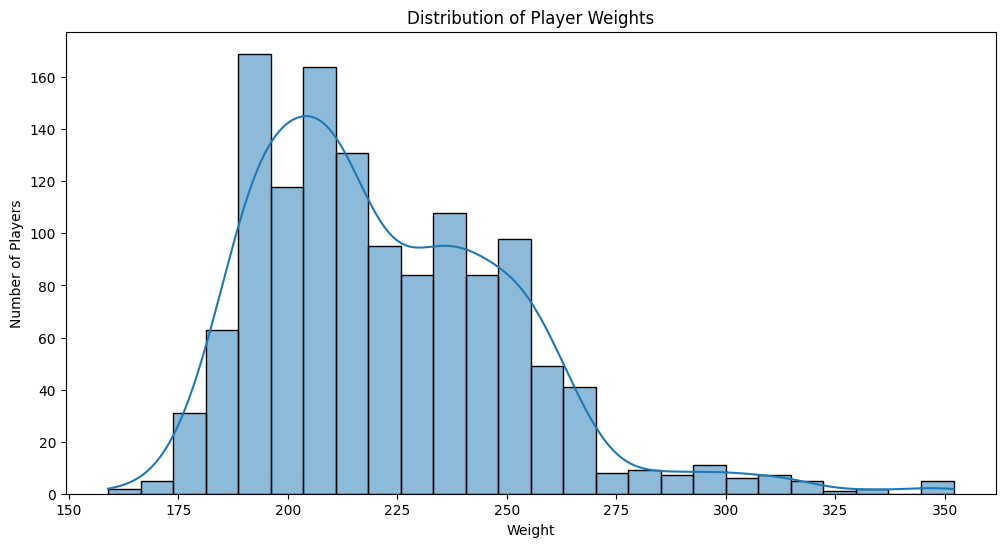

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(players_df['weight'], kde=True)
plt.title('Distribution of Player Weights')
plt.xlabel('Weight')
plt.ylabel('Number of Players')
plt.show()

**Distribution of Players by College**

Limiting only to the top 20 colleges to simplify visual.

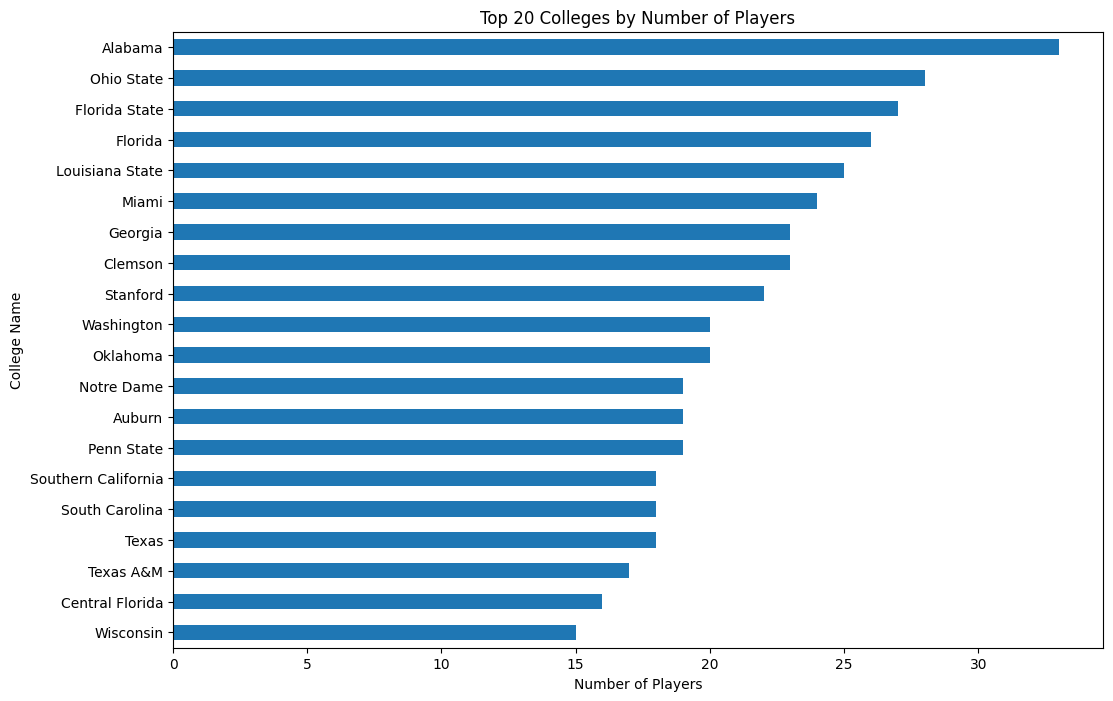

In [14]:
top_colleges = players_df['collegeName'].value_counts().head(20)
plt.figure(figsize=(12,8))
top_colleges.plot(kind='barh')
plt.title('Top 20 Colleges by Number of Players')
plt.xlabel('Number of Players')
plt.ylabel('College Name')
plt.gca().invert_yaxis()  # To have the college with the most players at the top
plt.show()

**Distribution of Player Ages**

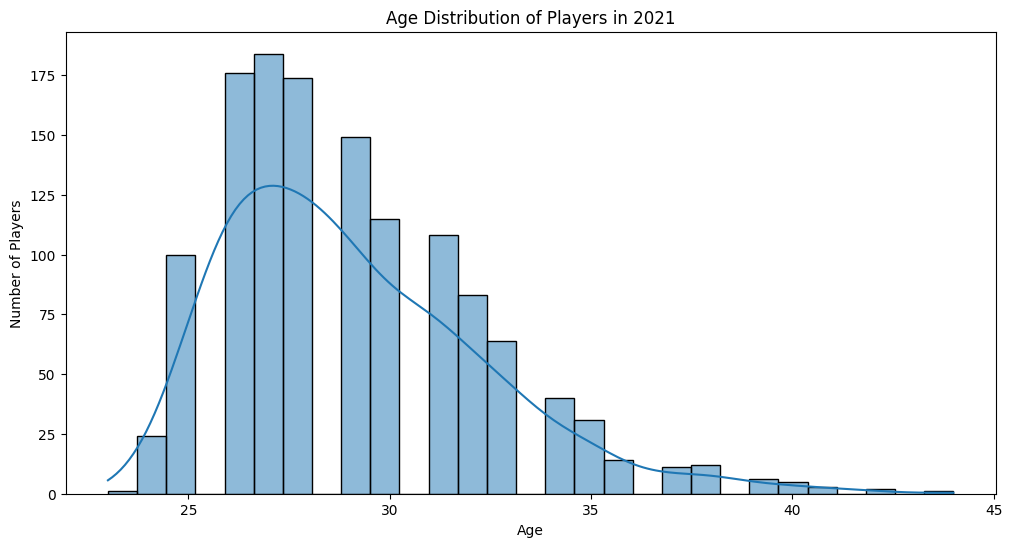

In [16]:
# Convert birthDate to datetime and calculate age in 2021
players_df['birthDate'] = pd.to_datetime(players_df['birthDate'])
players_df['age'] = 2021 - players_df['birthDate'].dt.year

plt.figure(figsize=(12,6))
sns.histplot(players_df['age'], kde=True)
plt.title('Age Distribution of Players in 2021')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()


**Distribution of Players by Position**

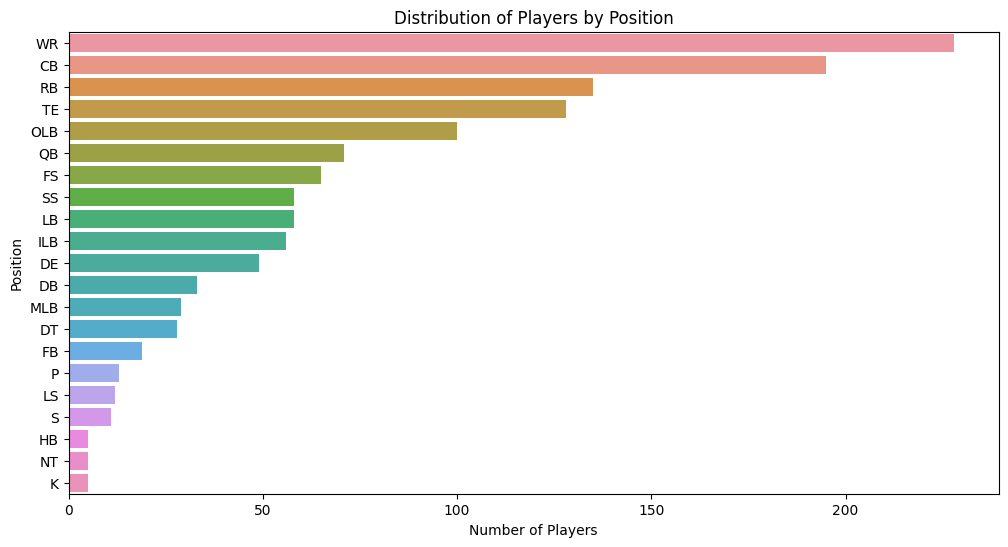

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=players_df, y='position', order = players_df['position'].value_counts().index)
plt.title('Distribution of Players by Position')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.show()

**Missing Data Check**

In [20]:
players_df.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
age            0
dtype: int64

**Duplicate ID Check**

In [21]:
players_df['nflId'].duplicated().sum()

0

### **Play Data**: 'plays.csv'

**Overview**

Play-level information from each game. The key variables are gameId and playId.

In [22]:
# data sample display (first few rows)
plays_df.head()


gameId  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   
2  2018090600     168  (13:05) (Shotgun) M.Ryan pass incomplete short...   
3  2018090600     190  (13:01) (Shotgun) M.Ryan pass deep left to J.J...   
4  2018090600     256  (10:59) (Shotgun) M.Ryan pass incomplete short...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   
2        1     2         10            ATL  play_type_pass          PHI   
3        1     3         10            ATL  play_type_pass          PHI   
4        1     3          1            ATL  play_type_pass          PHI   

   yardlineNumber  ... preSnapHomeScore gameClock  absoluteYardlineNumber  \
0              20  ...              0.0  15:00:00                    90.0   
1              39  ...              0.0  13:10:00                    49.0   
2              39  ...              0.0  13:05:00                    49.0   
3              39  ...              0.0  13:01:00                    49.0   
4               1  ...              0.0  10:59:00                    11.0   

   penaltyCodes penaltyJerseyNumbers passResult  offensePlayResult  \
0           NaN                  NaN          C                 10   
1           NaN                  NaN          I                  0   
2           NaN                  NaN          I                  0   
3           NaN                  NaN          C                 33   
4           NaN                  NaN          I                  0   

   playResult       epa  isDefensivePI  
0          10  0.261827          False  
1           0 -0.372360          False  
2           0 -0.702779          False  
3          33  3.047530          False  
4           0 -0.842272          False  

[5 rows x 27 columns]

In [33]:
# describe data types and non-null values
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

**Distribution of Play Types**

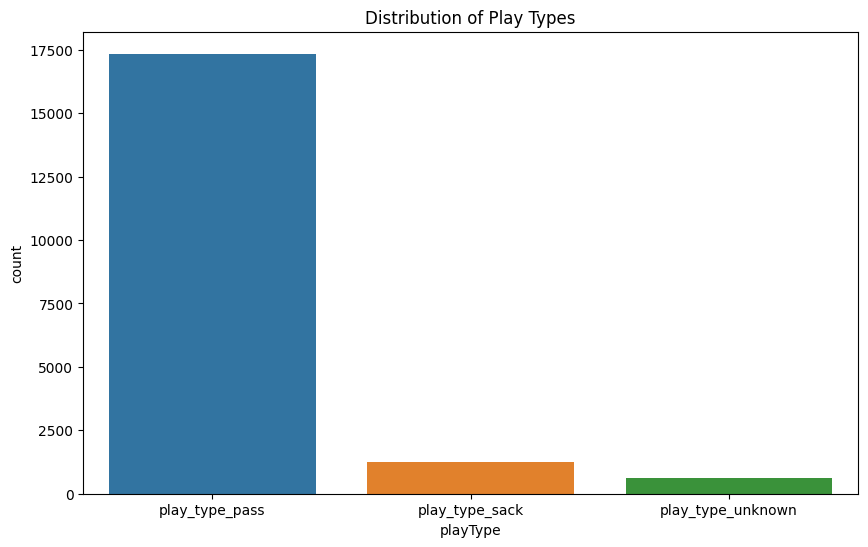

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=plays_df, x='playType')
plt.title('Distribution of Play Types')
plt.show()


**Distribution of Yards Needed for First Down (yardsToGo)**

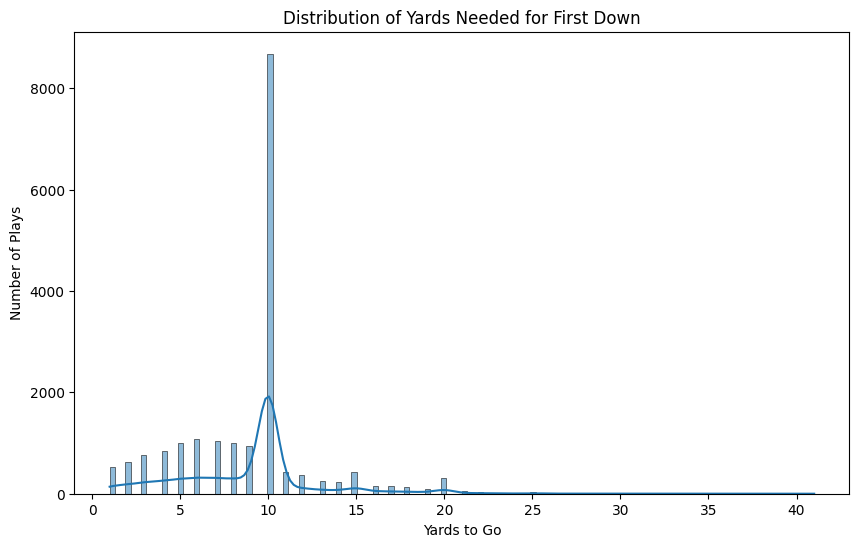

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(plays_df['yardsToGo'], kde=True)
plt.title('Distribution of Yards Needed for First Down')
plt.xlabel('Yards to Go')
plt.ylabel('Number of Plays')
plt.show()


**Distribution of Number of Defenders in the Box**

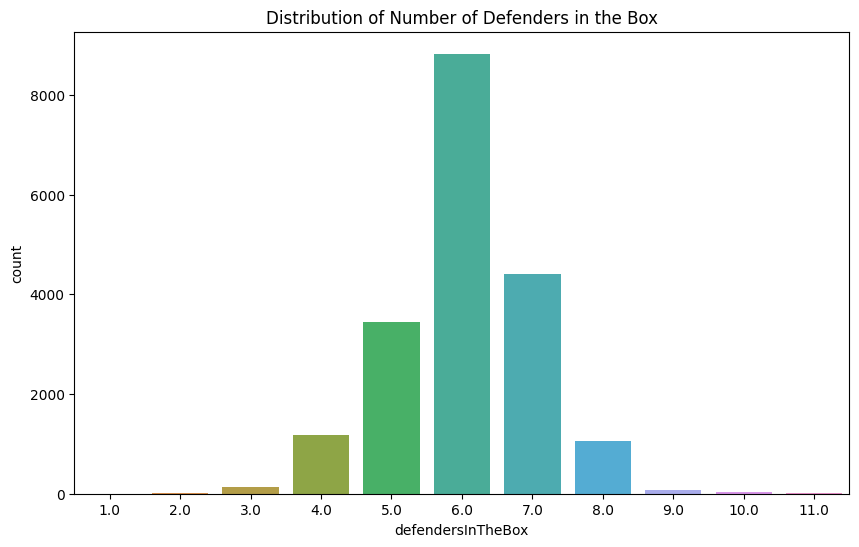

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=plays_df, x='defendersInTheBox')
plt.title('Distribution of Number of Defenders in the Box')
plt.show()


**Distribution of Number of Pass Rushers**

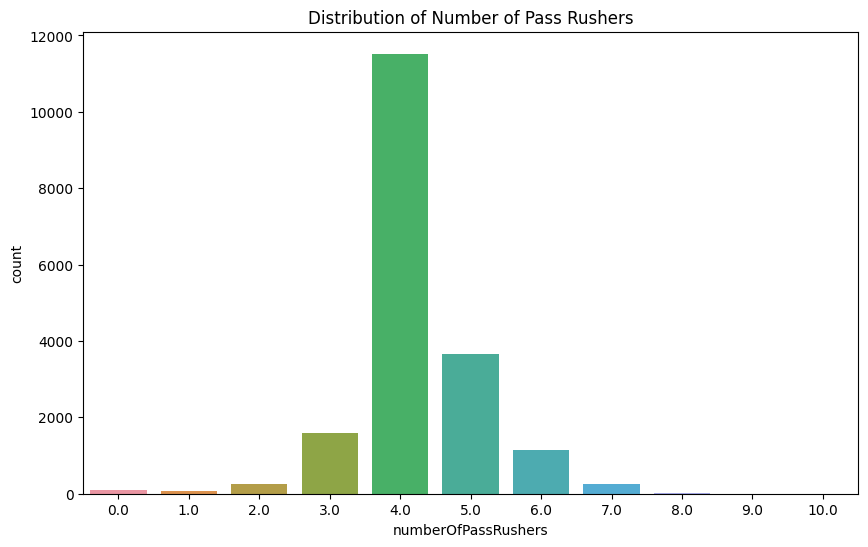

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=plays_df, x='numberOfPassRushers')
plt.title('Distribution of Number of Pass Rushers')
plt.show()


**Outcome of Passing Play**

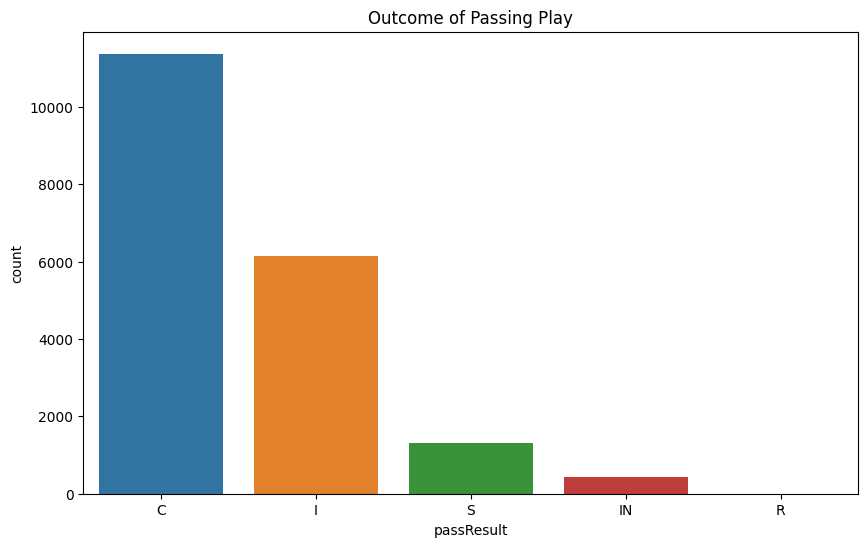

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=plays_df, x='passResult')
plt.title('Outcome of Passing Play')
plt.show()


**Expected Points Added (EPA)**

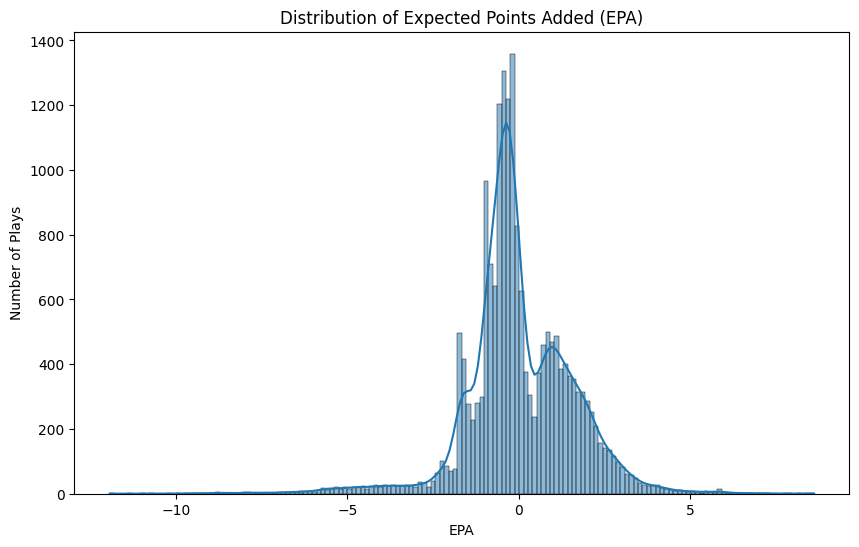

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(plays_df['epa'], kde=True)
plt.title('Distribution of Expected Points Added (EPA)')
plt.xlabel('EPA')
plt.ylabel('Number of Plays')
plt.show()


**Explore Correlations**

<ipython-input-31-89309be4abdb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = plays_df.corr()


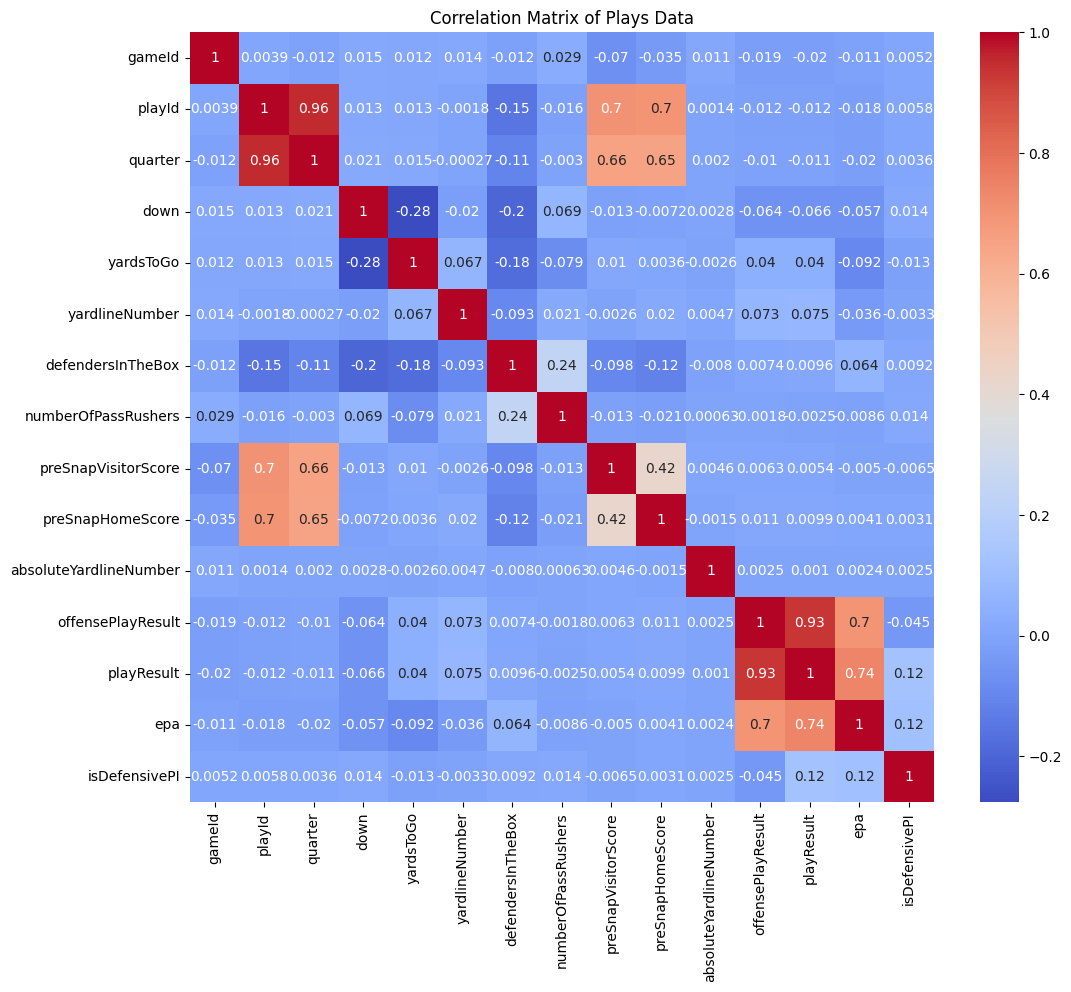

In [31]:
correlation = plays_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Plays Data')
plt.show()


**Missing Data Check**

In [34]:
plays_df.isnull().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
gameClock                   639
absoluteYardlineNumber      639
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

### **Tracking Data**: 'week [week number].csv'

**Overview**

Player tracking data from all games in week [week number]. The key variables are gameId, playId, and nflId. There are 17 weeks in a typical NFL Regular Season, and thus 17 data frames wiht player tracking data are provided.

For brevity, we will outline the EDA steps to be performed on each of these 17 files, then loop through all the weeks.

Processing week1.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-09-07T01:07:14.599Z  91.73  26.67  0.00  0.01  0.02  289.57  240.93   
1  2018-09-07T01:07:14.599Z  88.89  36.47  0.01  0.01  0.01  105.63   66.66   
2  2018-09-07T01:07:14.599Z  91.35  44.16  0.02  0.03  0.01  290.45   16.86   
3  2018-09-07T01:07:14.599Z  86.31  22.01  0.09  0.42  0.01   70.12  168.91   
4  2018-09-07T01:07:14.599Z  90.78  36.15  0.00  0.00  0.00  257.61  193.97   

  event      nflId      displayName  jerseyNumber position  frameId  team  \
0  None      310.0        Matt Ryan           2.0       QB        1  away   
1  None    79848.0  Malcolm Jenkins          27.0       SS        1  home   
2  None  2495454.0      Julio Jones          11.0       WR        1  away   
3  None  2495613.0     Corey Graham          24.0       FS        1  home   
4  None  2533040.0     Mohamed Sanu          12.0       WR        1  away   

       gameId  playId playDirection  rout

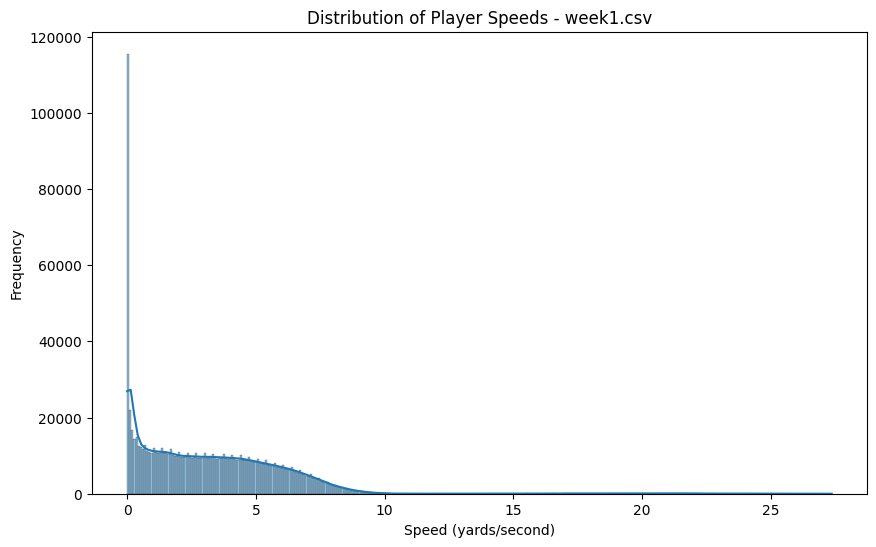

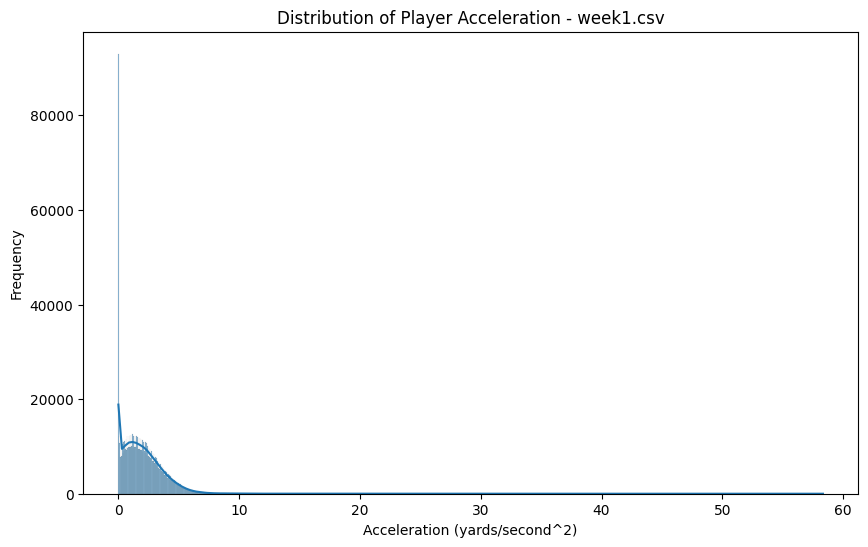

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


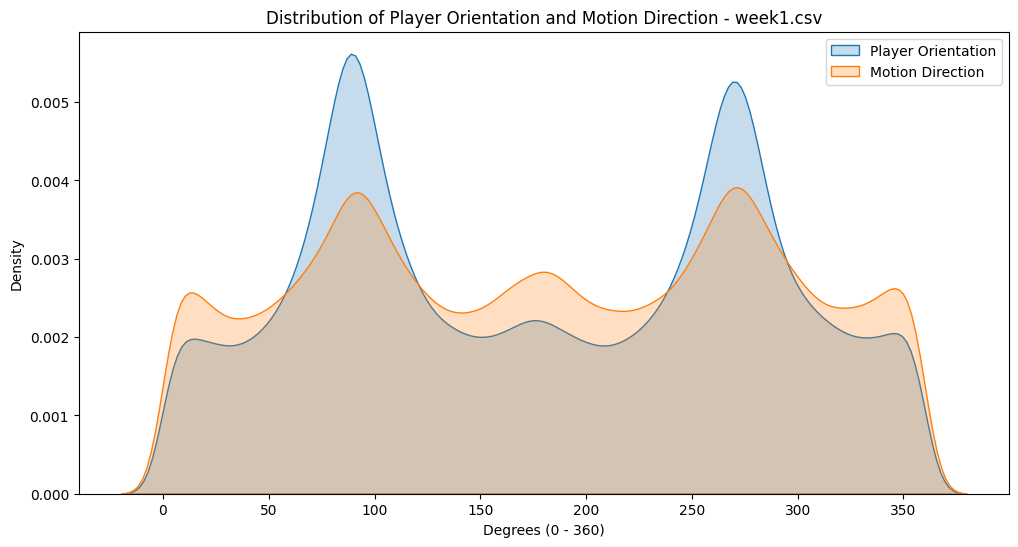

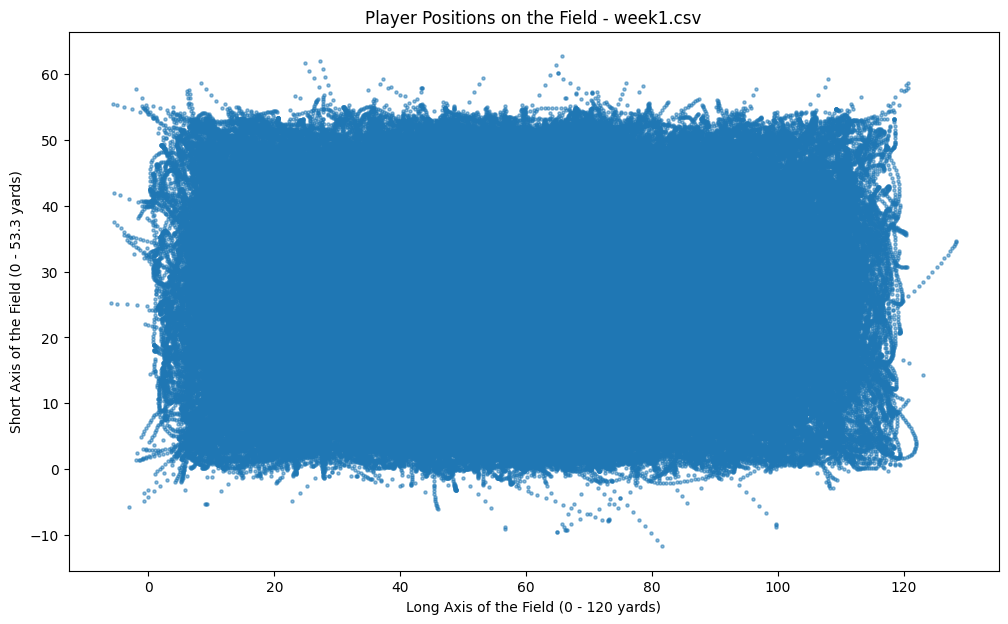

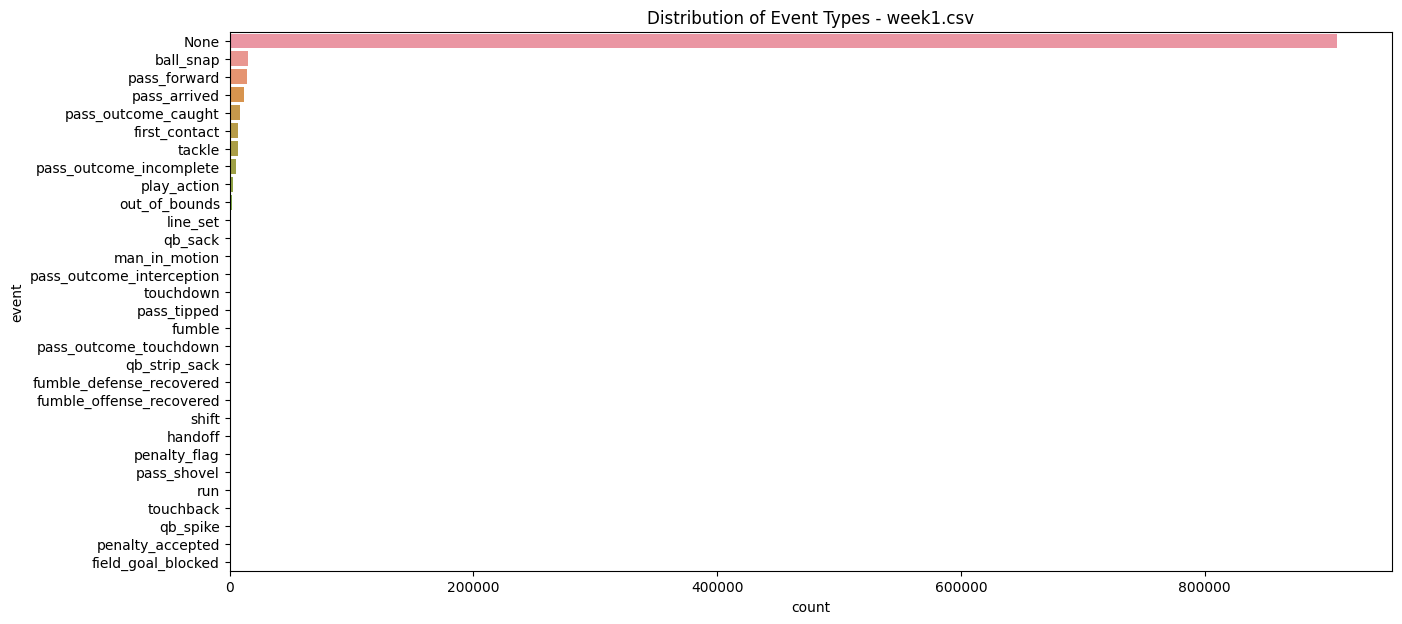

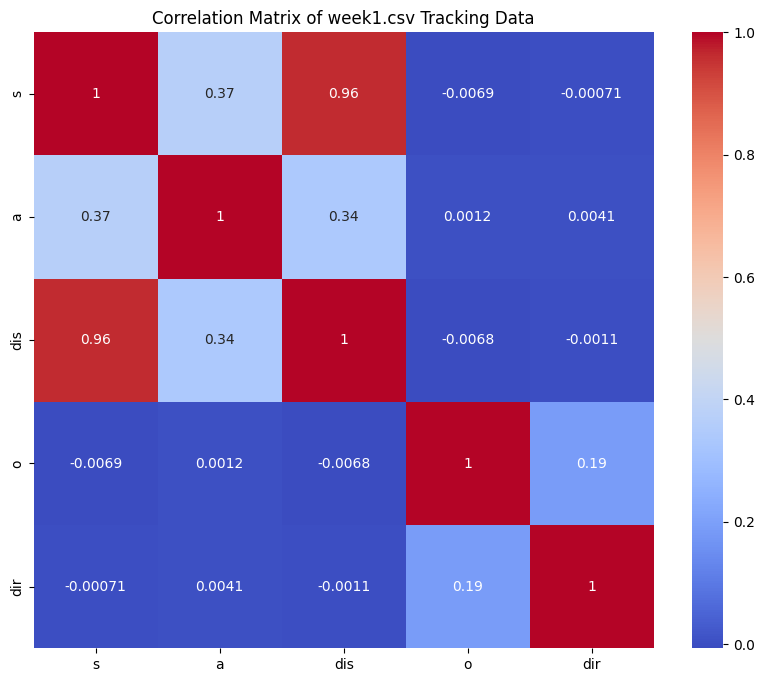

Processing week2.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-09-14T00:23:24.700Z  29.73  26.60  0.00  0.00  0.00   81.40   98.80   
1  2018-09-14T00:23:24.700Z  33.93  18.95  0.00  0.00  0.00   93.25   10.24   
2  2018-09-14T00:23:24.700Z  35.95   7.00  0.04  0.03  0.01  286.14  136.27   
3  2018-09-14T00:23:24.700Z  44.51  36.03  0.77  0.67  0.08  264.78  322.29   
4  2018-09-14T00:23:24.700Z  37.79  14.66  0.28  0.53  0.03  268.29  255.08   

  event      nflId       displayName  jerseyNumber position  frameId  team  \
0  None      382.0        Joe Flacco           5.0       QB        1  away   
1  None    71269.0  Michael Crabtree          15.0       WR        1  away   
2  None  2533060.0   Dre Kirkpatrick          27.0       CB        1  home   
3  None  2539233.0    Shawn Williams          36.0       SS        1  home   
4  None  2543474.0  Darqueze Dennard          21.0       CB        1  home   

       gameId  playId playDirection

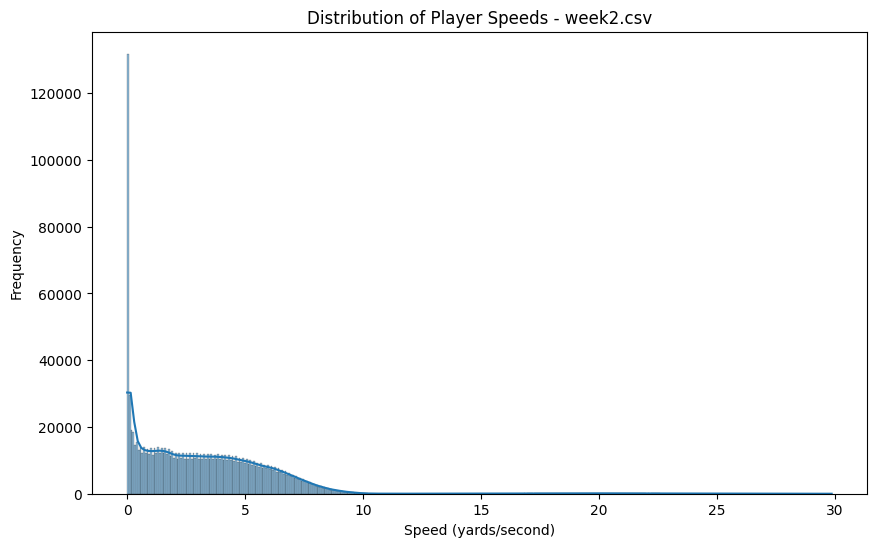

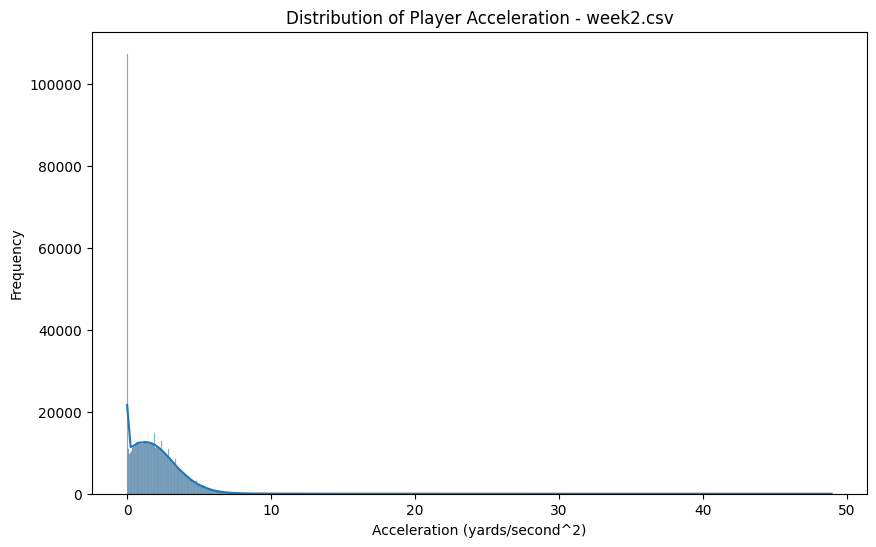

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


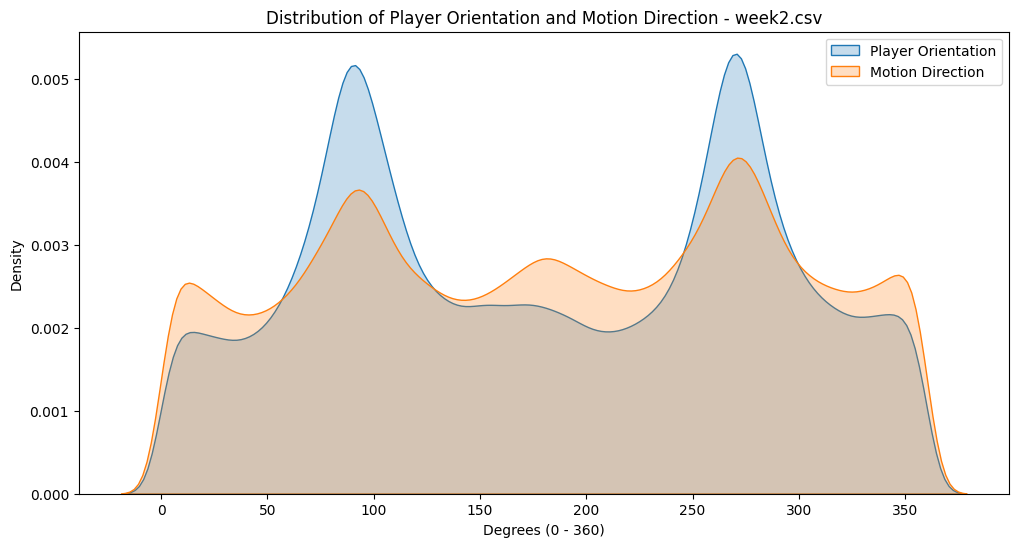

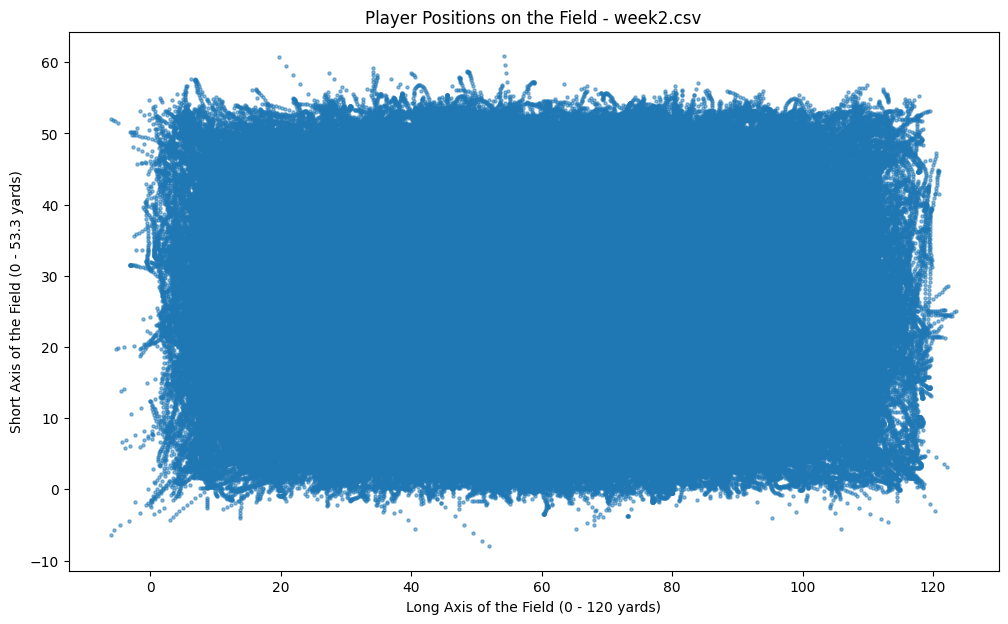

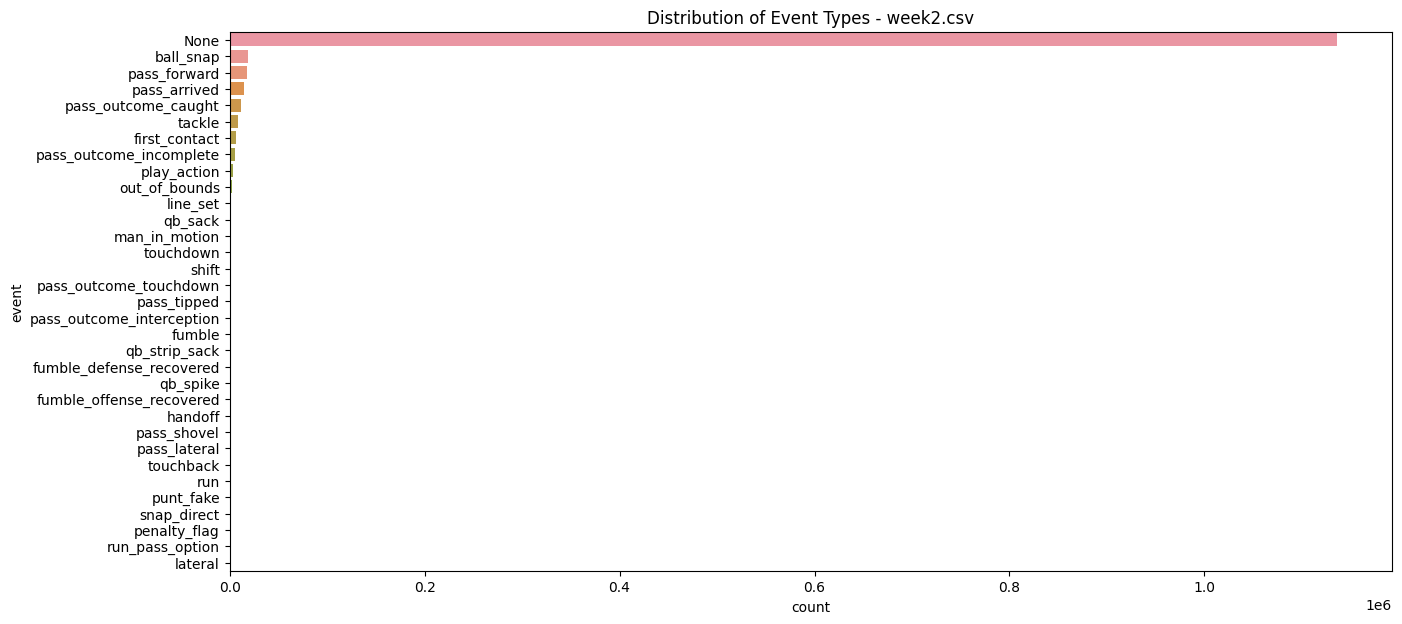

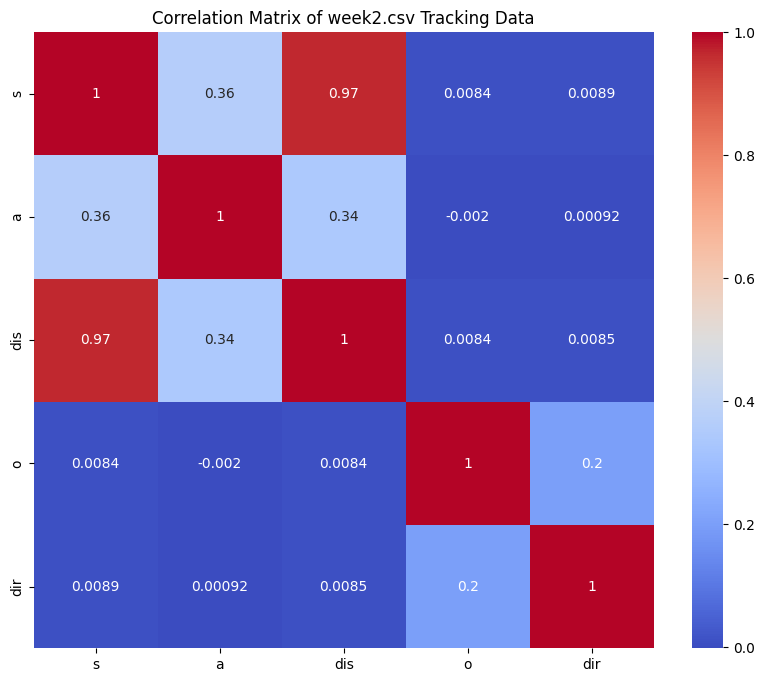

Processing week3.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-09-21T00:23:26.200Z  33.47  26.91  0.00  0.01  0.01   82.28  245.04   
1  2018-09-21T00:23:26.200Z  36.32  11.84  0.46  0.80  0.05  278.40  312.33   
2  2018-09-21T00:23:26.200Z  35.79  17.36  0.41  0.37  0.04  287.41  338.27   
3  2018-09-21T00:23:26.200Z  33.62  31.43  0.02  0.03  0.02  104.03  250.29   
4  2018-09-21T00:23:26.200Z  33.38  17.42  0.01  0.01  0.00   81.26   80.56   

  event      nflId       displayName  jerseyNumber position  frameId  team  \
0  None  2495240.0      Tyrod Taylor           5.0       QB        1  home   
1  None  2532877.0  Trumaine Johnson          22.0       CB        1  away   
2  None  2533059.0  Morris Claiborne          21.0       CB        1  away   
3  None  2540928.0      Darren Fells          88.0       TE        1  home   
4  None  2543488.0     Jarvis Landry          80.0       WR        1  home   

       gameId  playId playDirection

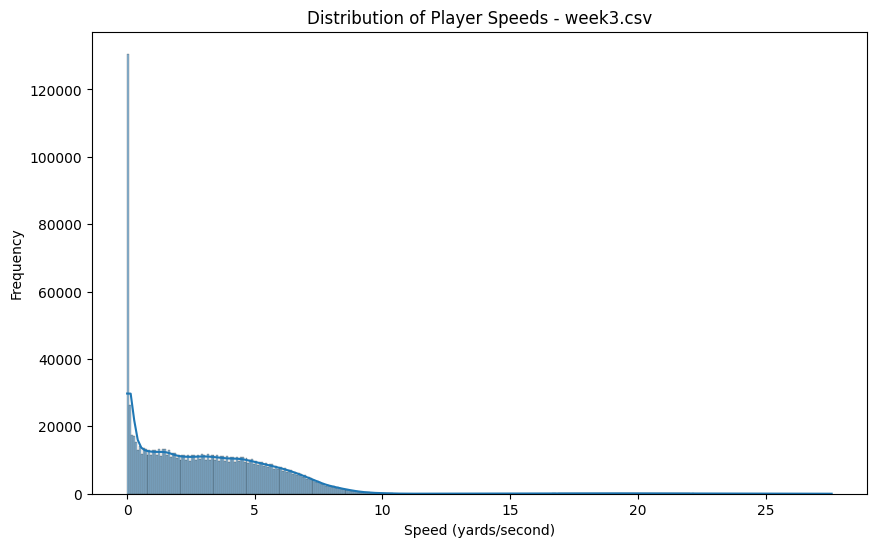

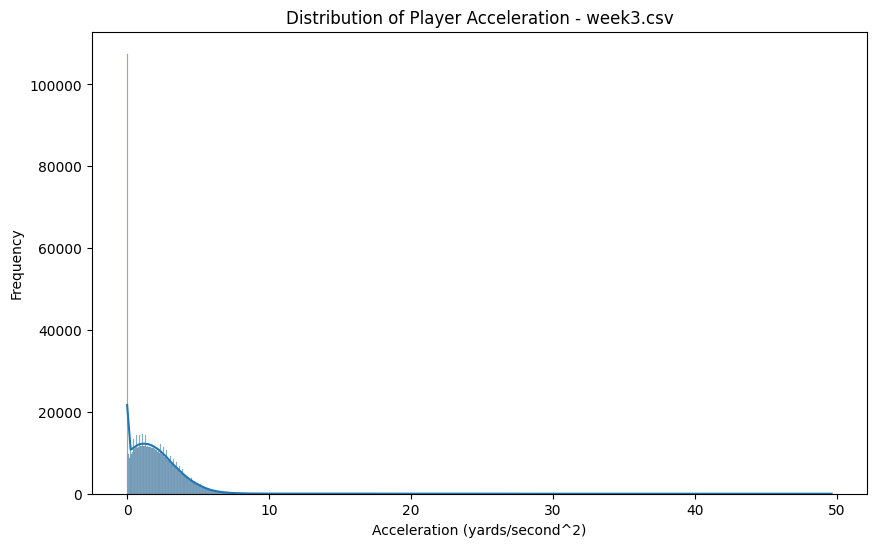

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


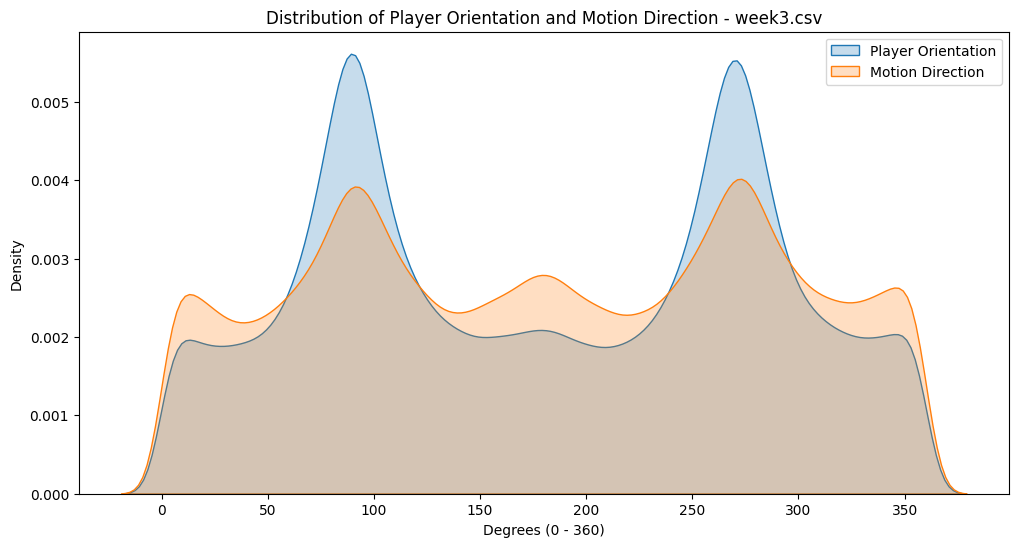

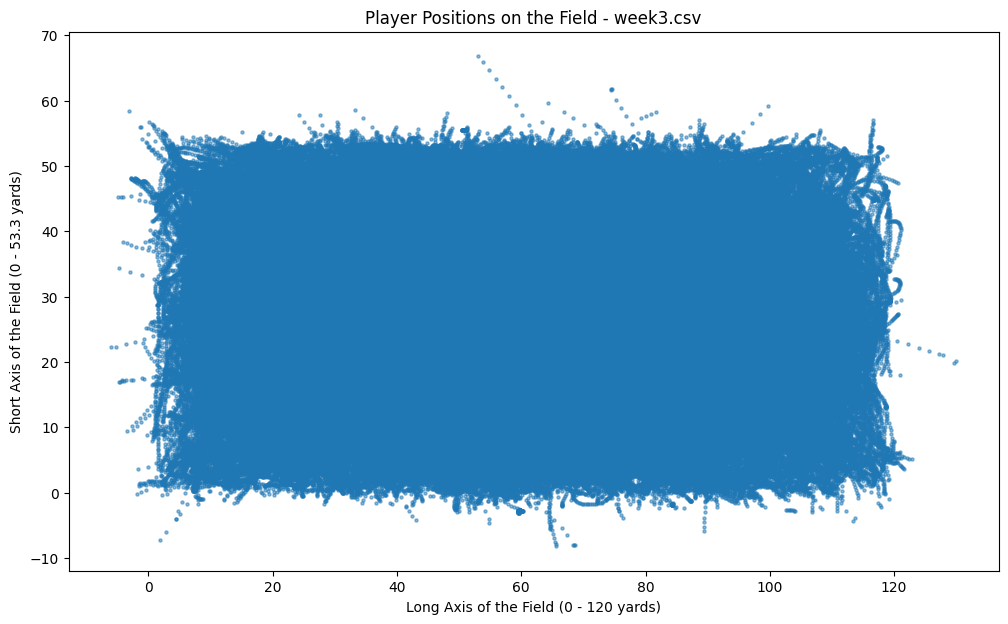

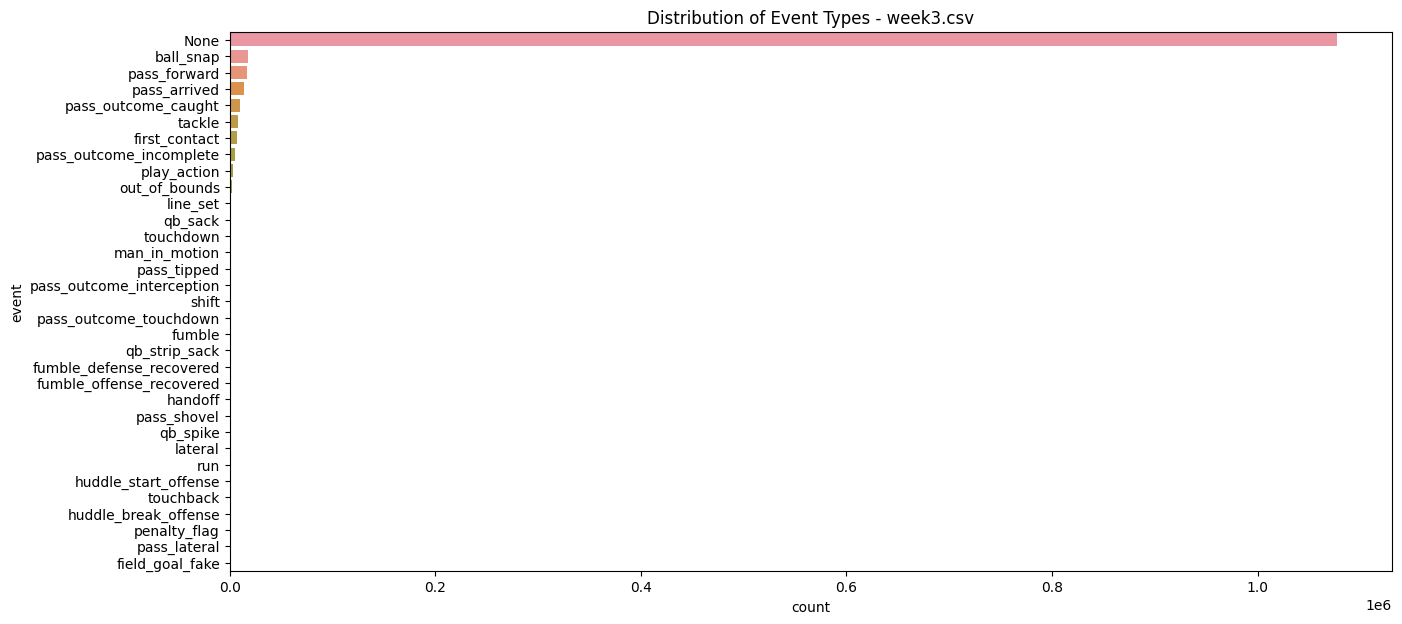

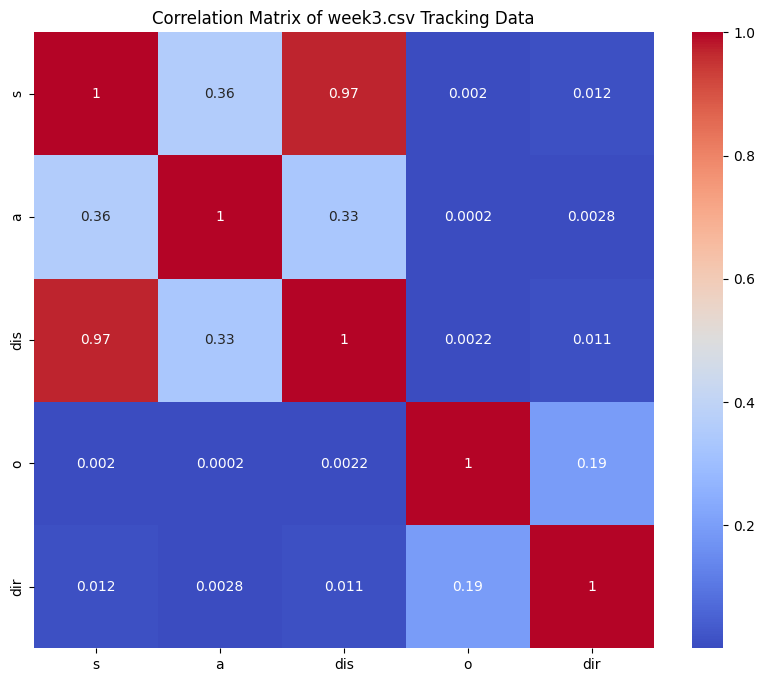

Processing week4.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-09-28T00:24:25.599Z  38.75  38.62  0.00  0.00  0.00  268.48  211.26   
1  2018-09-28T00:24:25.599Z  36.65  18.82  0.00  0.00  0.00   87.43  270.14   
2  2018-09-28T00:24:25.599Z  33.32  29.96  0.00  0.00  0.00  108.61  136.07   
3  2018-09-28T00:24:25.599Z  41.05  19.32  0.03  0.87  0.01  298.32  197.60   
4  2018-09-28T00:24:25.599Z  33.21  32.21  0.00  0.00  0.00  111.99  134.18   

  event      nflId            displayName  jerseyNumber position  frameId  \
0  None  1037374.0            Sam Shields          37.0       CB        1   
1  None  2495438.0           Kyle Rudolph          82.0       TE        1   
2  None  2532820.0           Kirk Cousins           8.0       QB        1   
3  None  2540197.0  Nickell Robey-Coleman          23.0       CB        1   
4  None  2541161.0        Latavius Murray          25.0       RB        1   

   team      gameId  playId playDirection

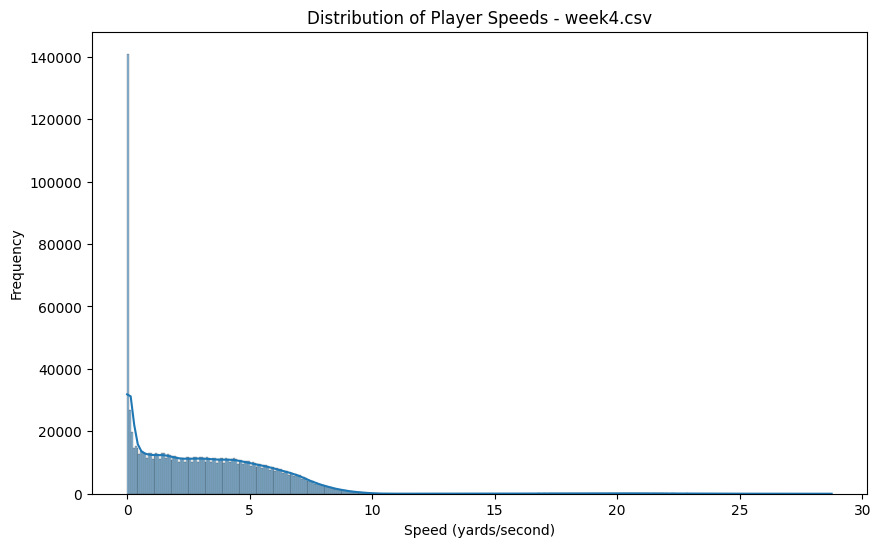

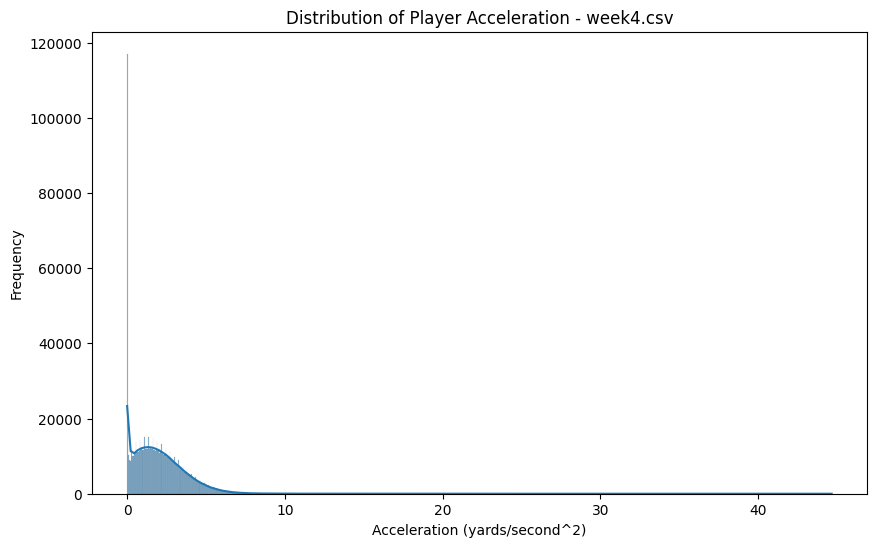

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


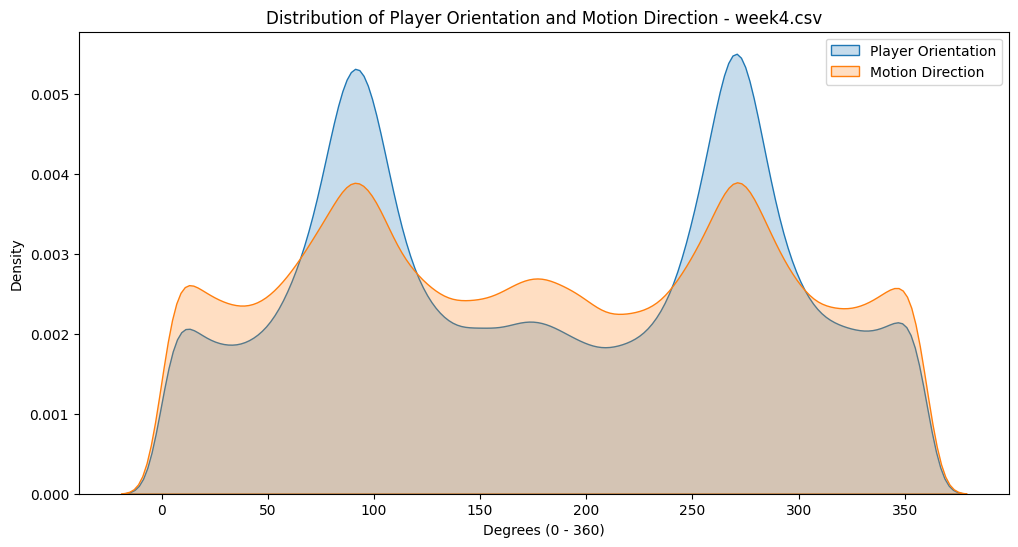

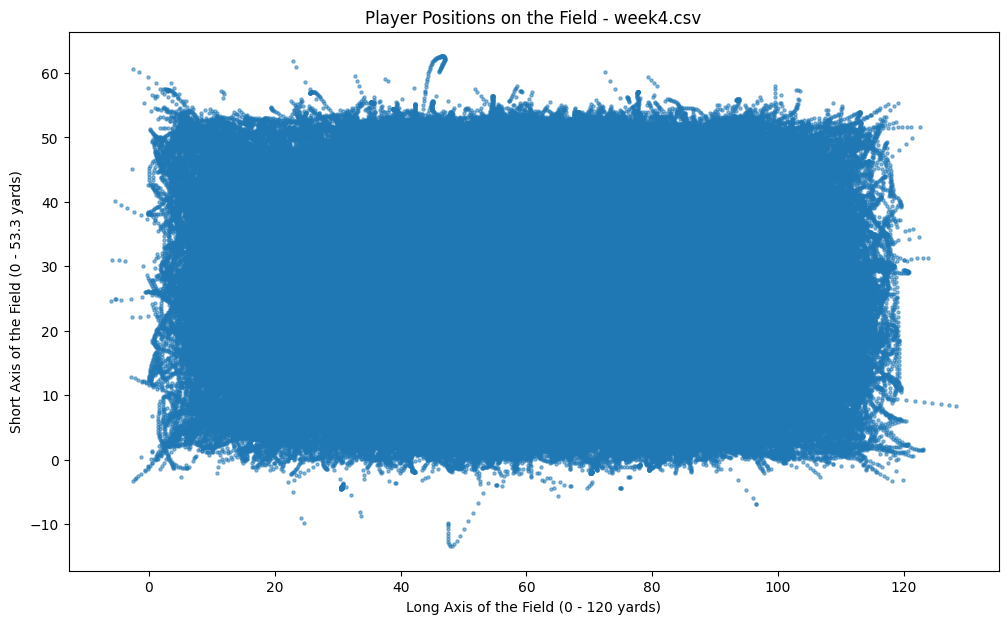

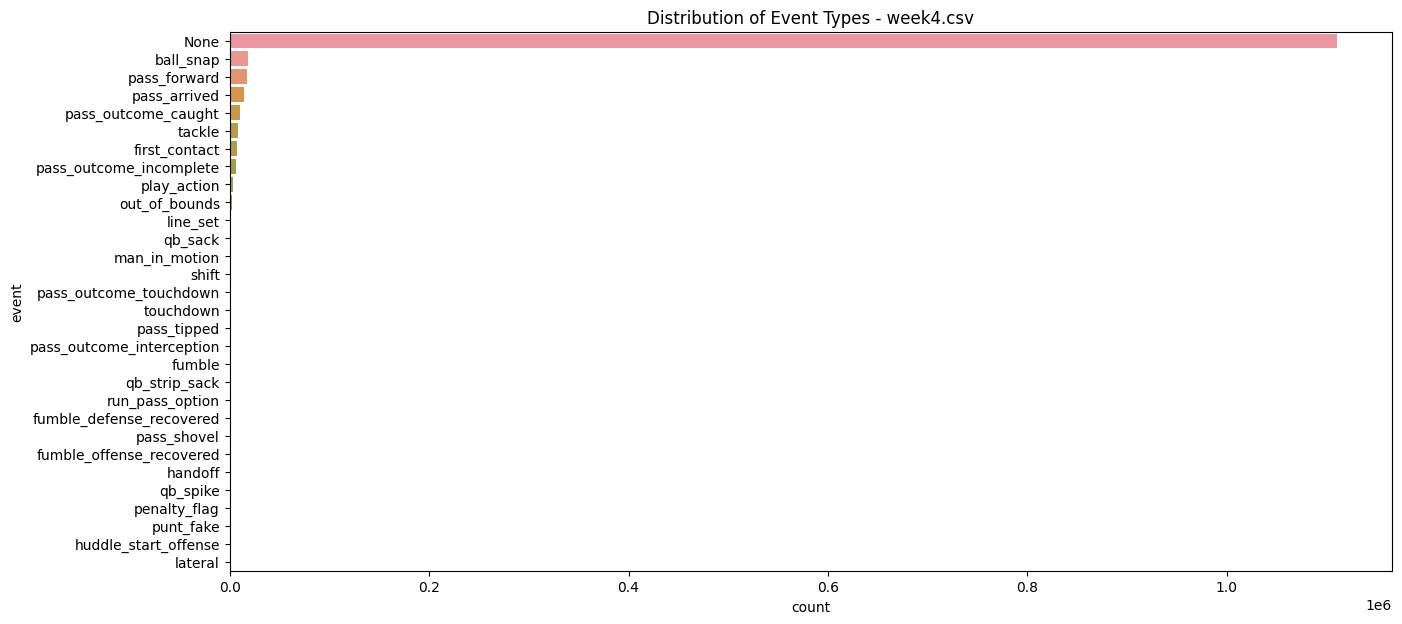

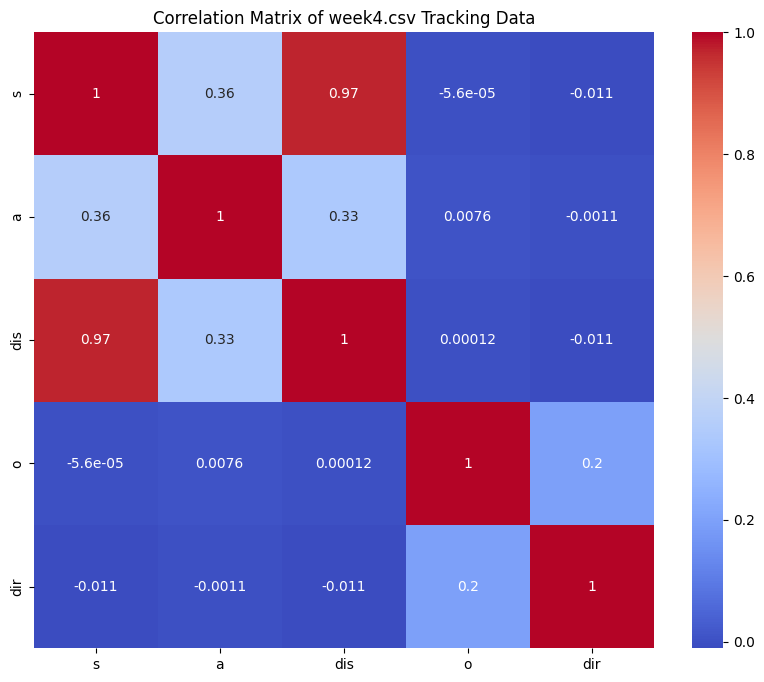

Processing week5.csv
                       time      x      y    s    a  dis       o     dir  \
0  2018-10-05T00:23:49.700Z  86.56  30.79  0.0  0.0  0.0  260.09  311.40   
1  2018-10-05T00:23:49.700Z  85.54  34.83  0.0  0.0  0.0  301.97  279.57   
2  2018-10-05T00:23:49.700Z  90.23  23.65  0.0  0.0  0.0  275.51  261.21   
3  2018-10-05T00:23:49.700Z  86.47  15.91  0.0  0.0  0.0  283.76  234.57   
4  2018-10-05T00:23:49.700Z  85.62   8.77  0.0  0.0  0.0  266.56  172.17   

  event      nflId     displayName  jerseyNumber position  frameId  team  \
0  None   238498.0  Julian Edelman          11.0       WR        1  home   
1  None   497240.0  Rob Gronkowski          87.0       TE        1  home   
2  None  2504211.0       Tom Brady          12.0       QB        1  home   
3  None  2530515.0     Chris Hogan          15.0       WR        1  home   
4  None  2537931.0     Josh Gordon          10.0       WR        1  home   

       gameId  playId playDirection  route  
0  2018100400      5

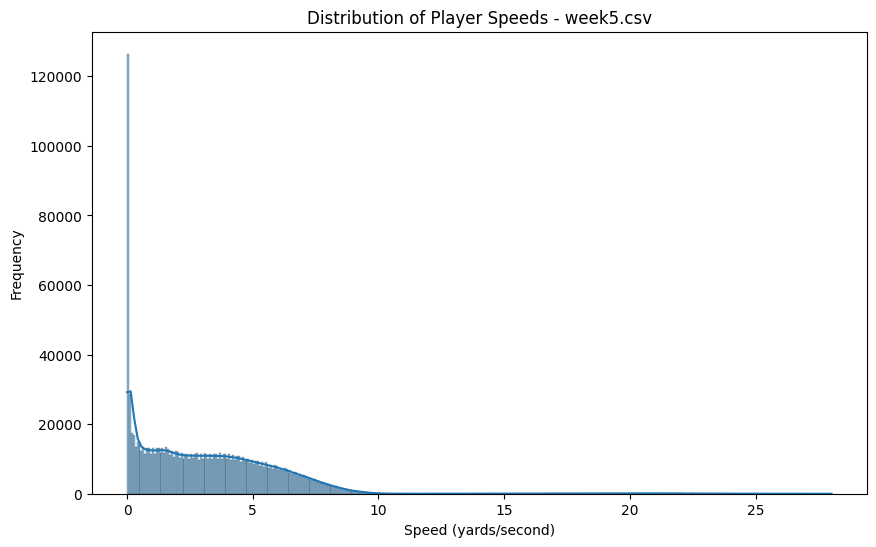

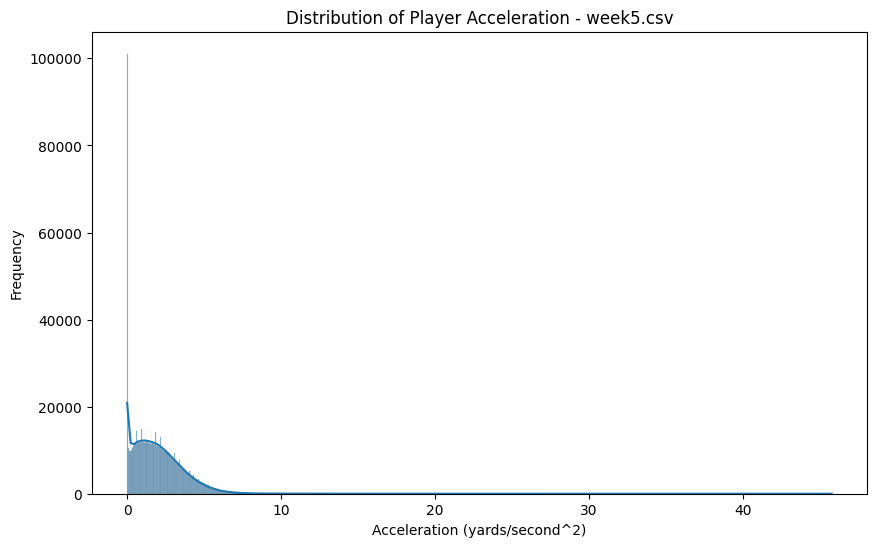

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


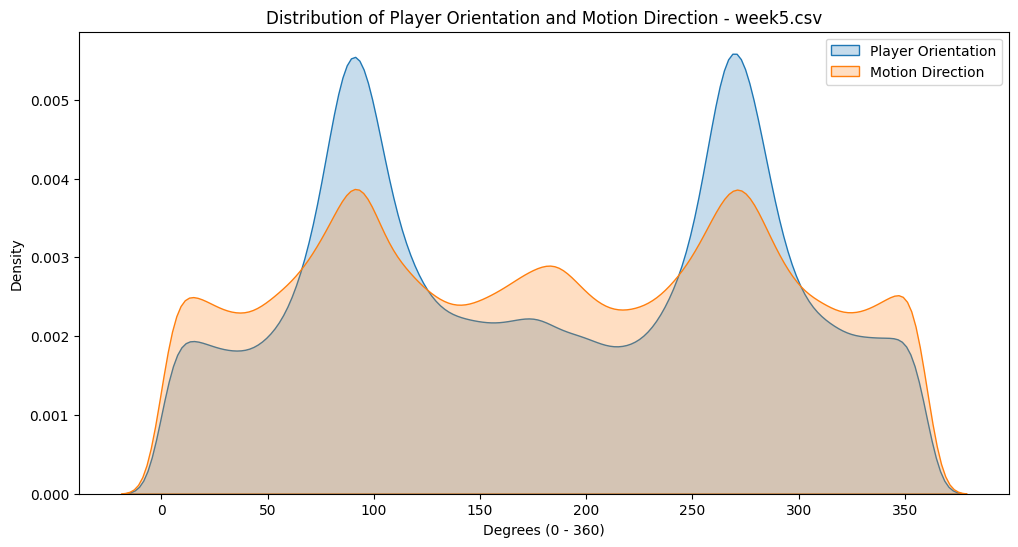

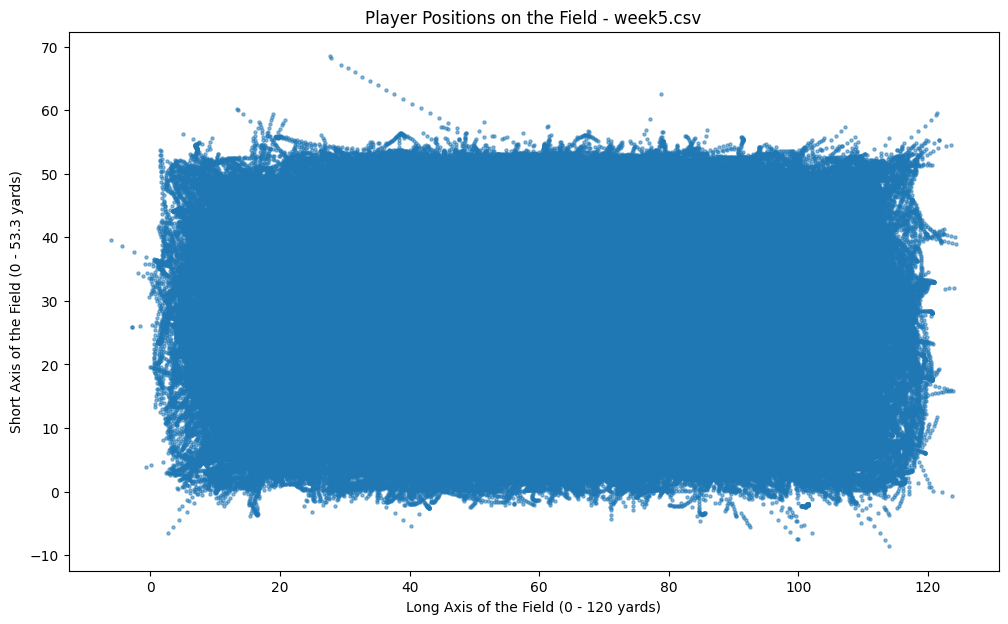

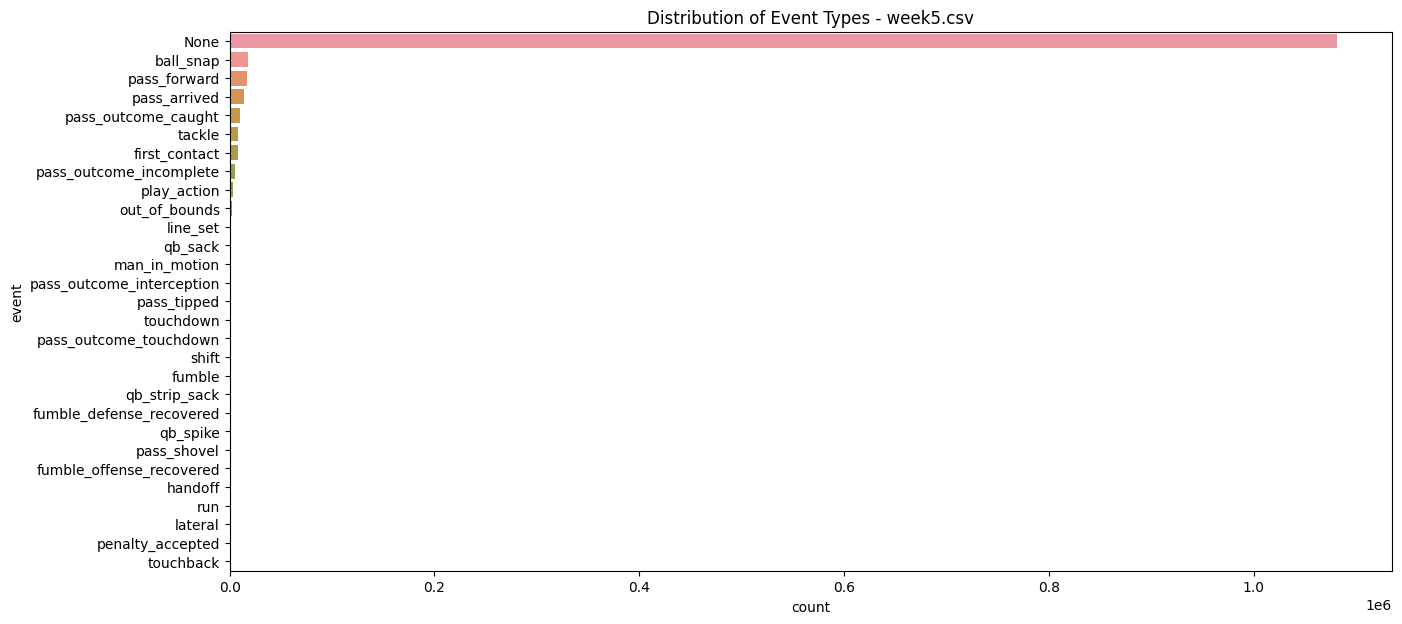

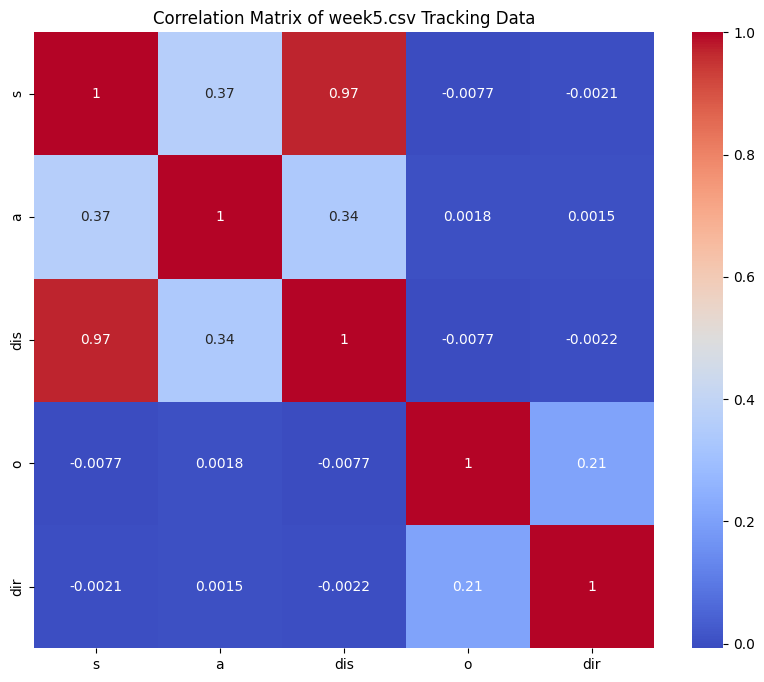

Processing week6.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-10-12T00:25:13.299Z  76.36  21.65  0.87  0.33  0.09  121.68  172.20   
1  2018-10-12T00:25:13.299Z  89.32  23.77  0.01  0.01  0.00  277.85  283.43   
2  2018-10-12T00:25:13.299Z  81.55  20.58  0.97  1.82  0.10   63.10  125.70   
3  2018-10-12T00:25:13.299Z  86.17  31.59  0.00  0.00  0.00  227.23  180.92   
4  2018-10-12T00:25:13.299Z  85.62  44.04  0.00  0.00  0.01  256.25  139.64   

  event      nflId      displayName  jerseyNumber position  frameId  team  \
0  None    79848.0  Malcolm Jenkins          27.0       SS        1  away   
1  None  2505996.0      Eli Manning          10.0       QB        1  home   
2  None  2532800.0    Nigel Bradham          53.0      OLB        1  away   
3  None  2543496.0    Odell Beckham          13.0       WR        1  home   
4  None  2543590.0     Cody Latimer          12.0       WR        1  home   

       gameId  playId playDirection   rou

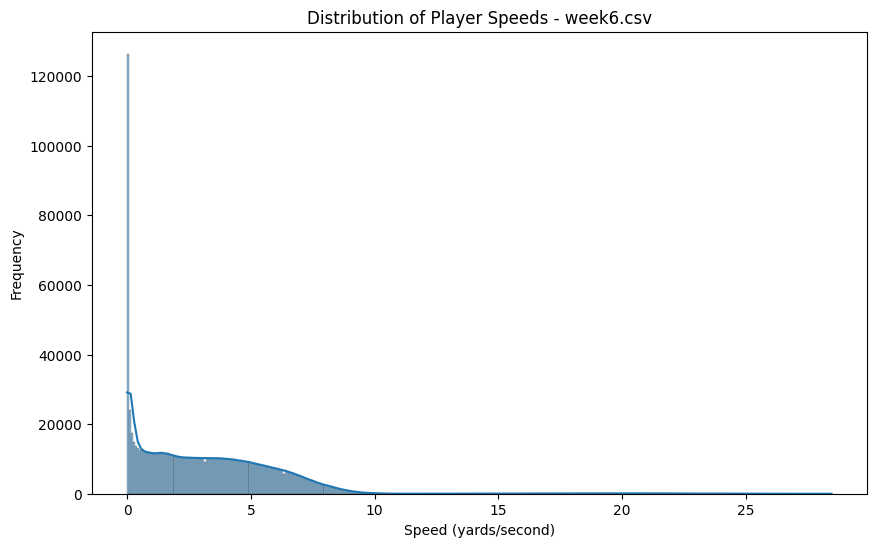

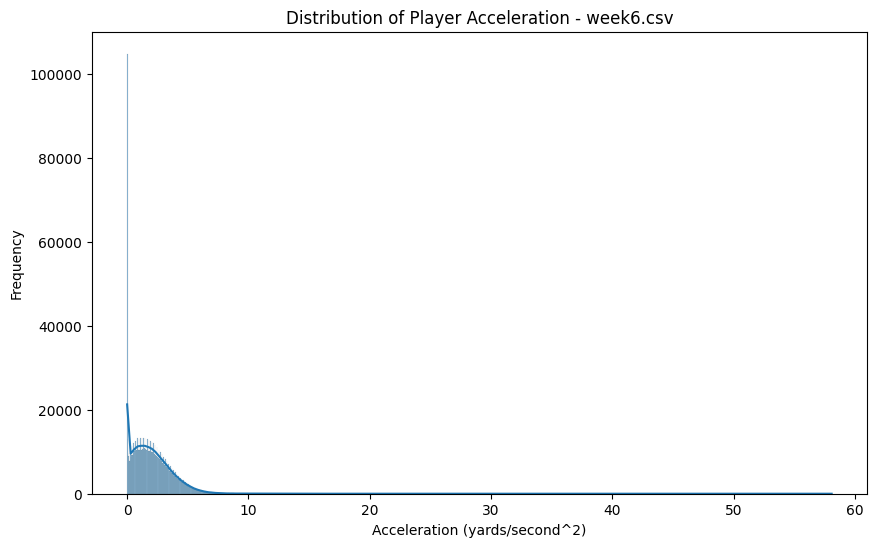

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


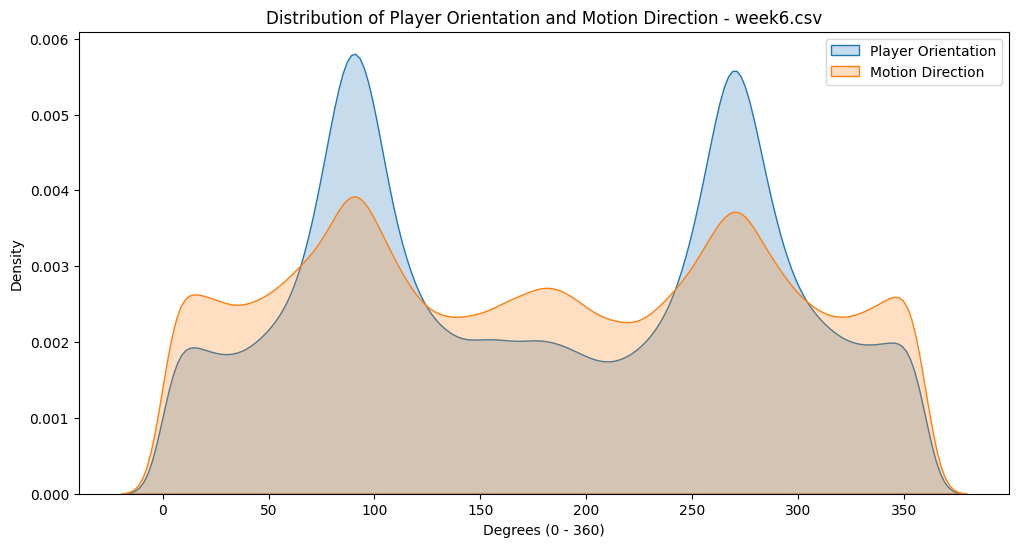

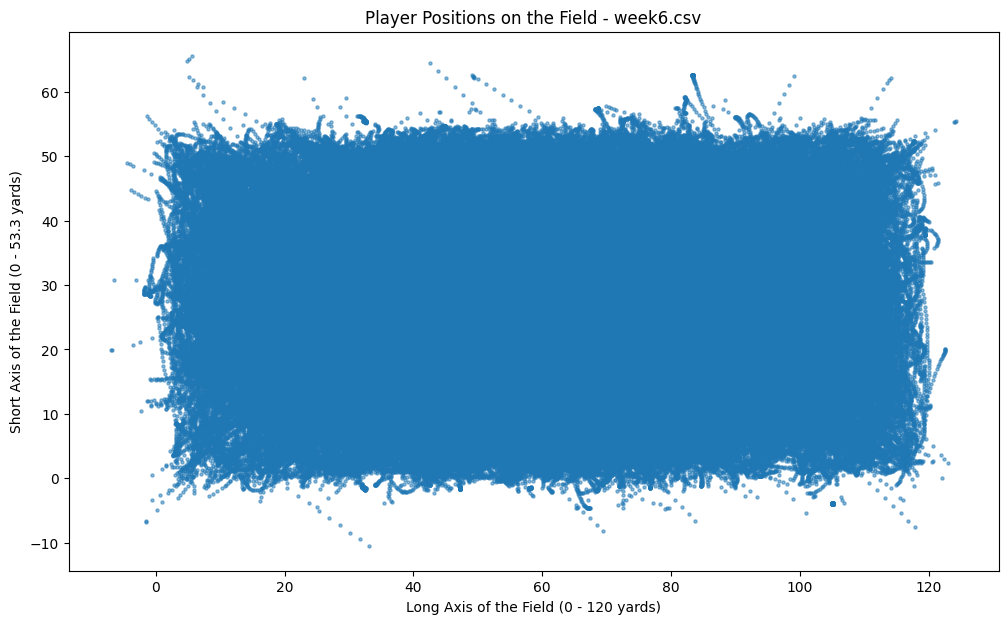

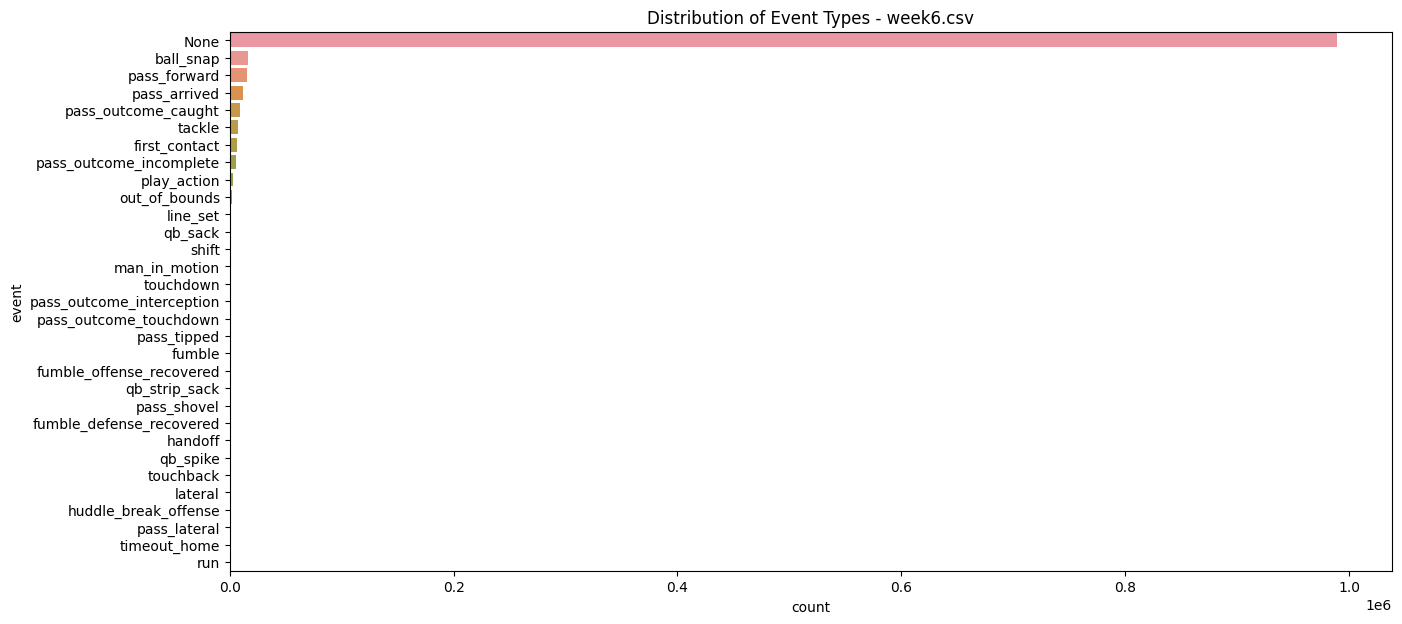

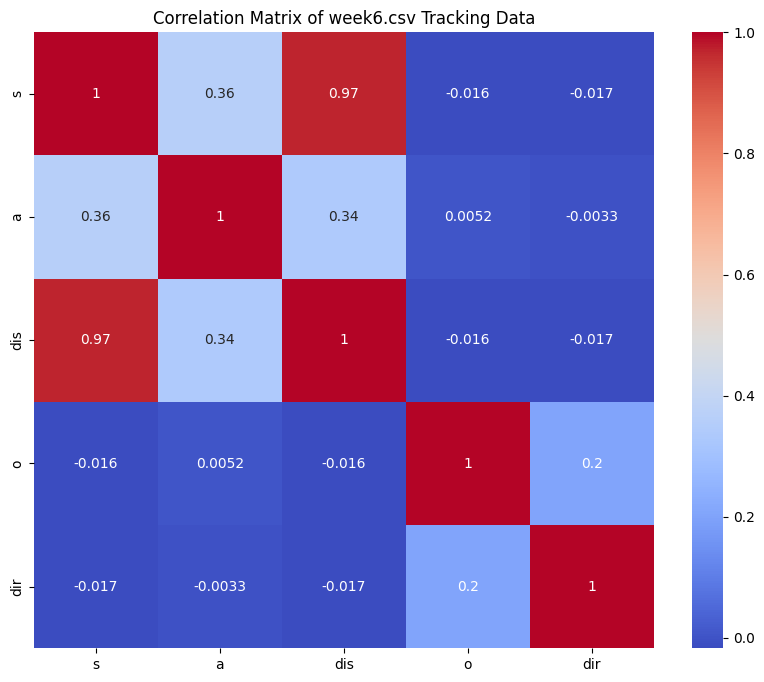

Processing week7.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-10-19T00:24:59.400Z  43.25  29.61  0.00  0.00  0.00  261.14  336.60   
1  2018-10-19T00:24:59.400Z  27.69  18.77  0.00  0.00  0.00  106.50   35.38   
2  2018-10-19T00:24:59.400Z  25.23  35.30  0.00  0.00  0.00   77.76  128.38   
3  2018-10-19T00:24:59.400Z  32.93   6.91  0.49  0.33  0.05   72.19  118.73   
4  2018-10-19T00:24:59.400Z  29.78  35.29  0.55  0.28  0.06  259.21  114.20   

  event      nflId       displayName  jerseyNumber position  frameId  team  \
0  None   494307.0    Darian Stewart          26.0       FS        1  away   
1  None  2495202.0        Von Miller          58.0      OLB        1  away   
2  None  2506106.0  Larry Fitzgerald          11.0       WR        1  home   
3  None  2507917.0    Tramaine Brock          22.0       CB        1  away   
4  None  2530510.0      Chris Harris          25.0       CB        1  away   

       gameId  playId playDirection

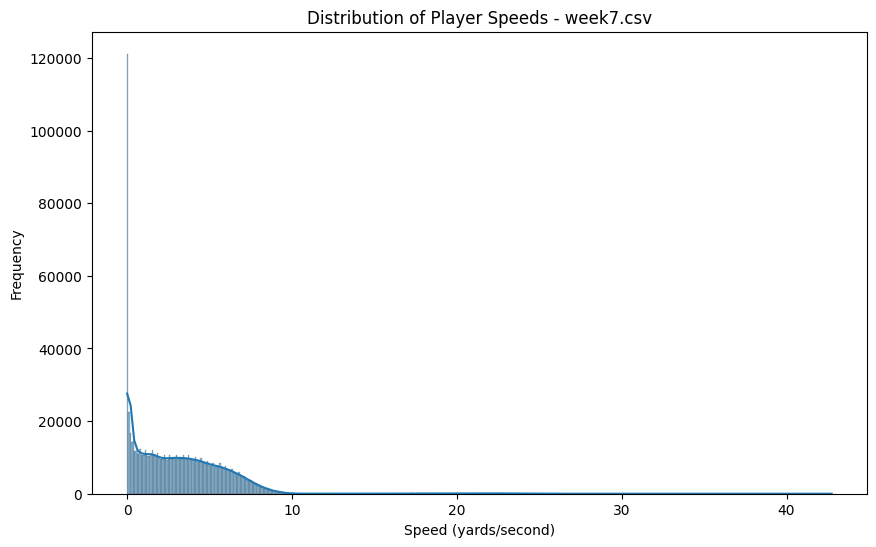

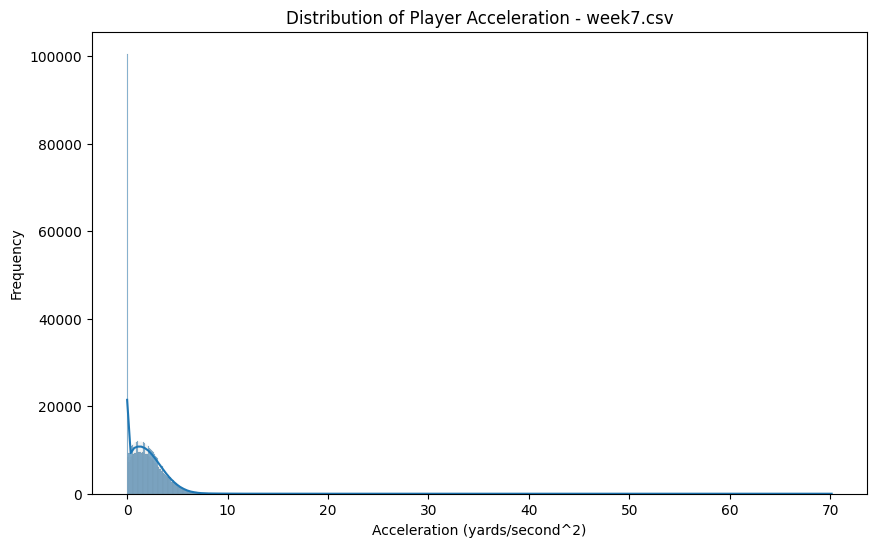

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


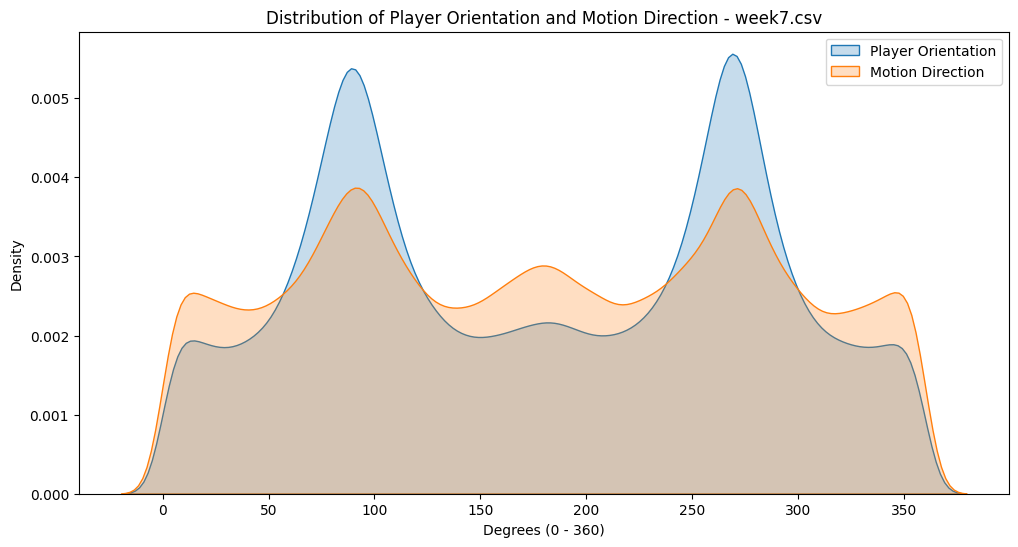

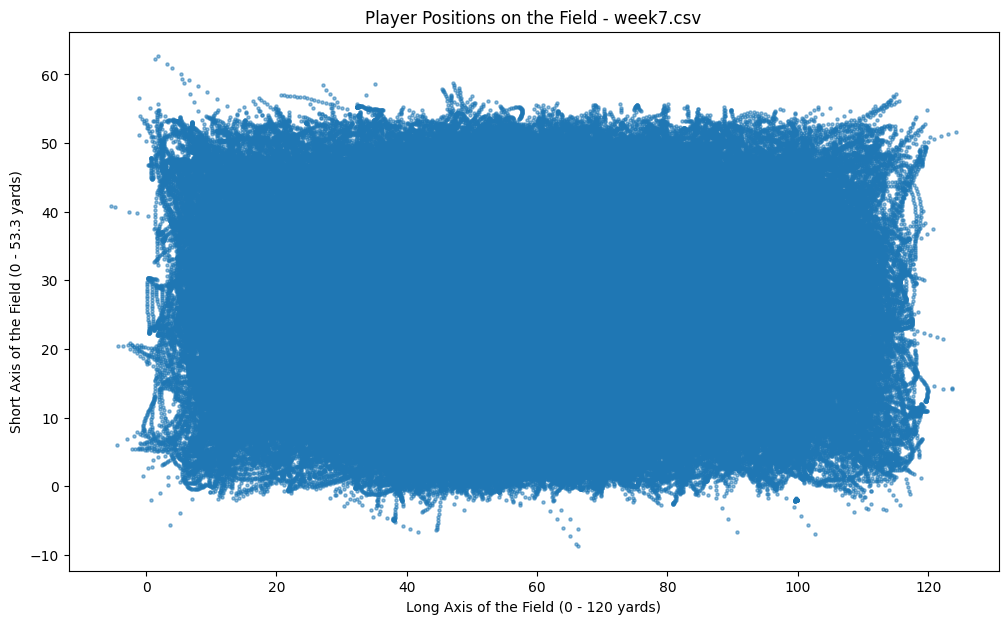

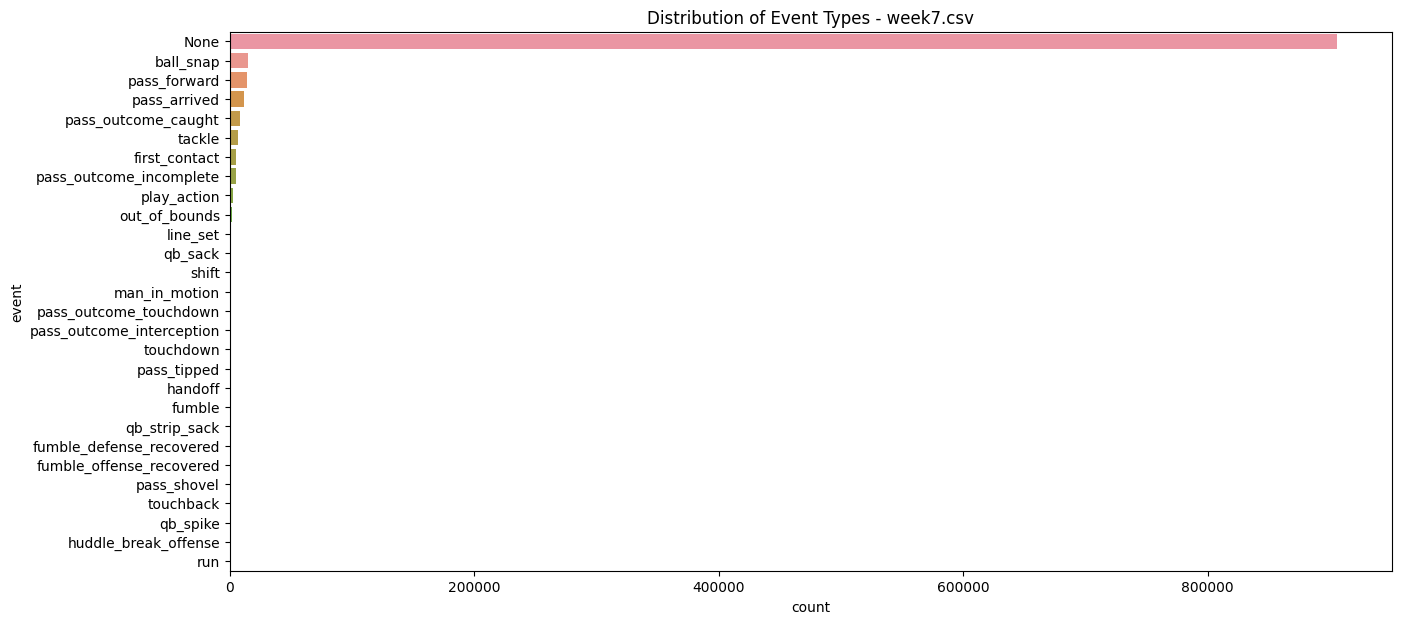

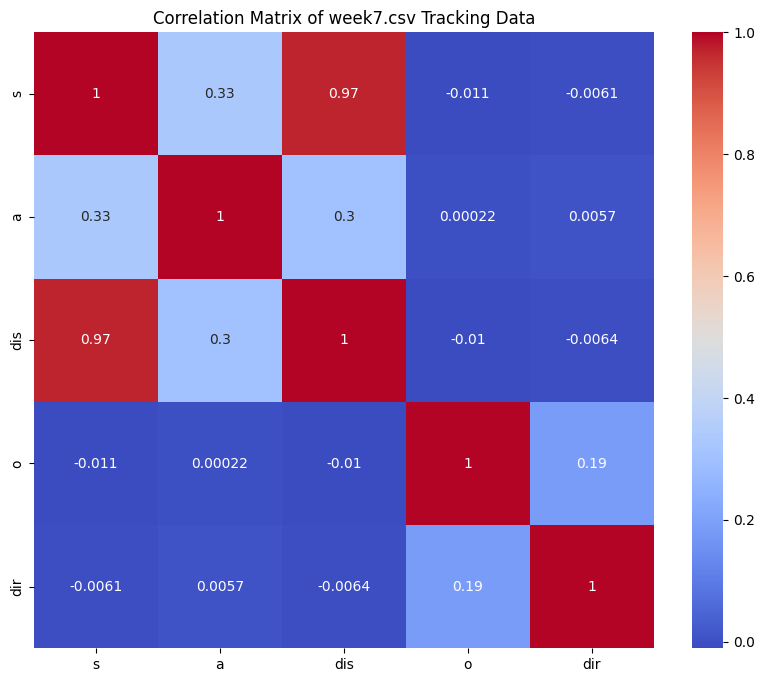

Processing week8.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-10-26T00:27:01.200Z  38.47  35.03  0.00  0.00  0.00   96.28  149.52   
1  2018-10-26T00:27:01.200Z  47.22  43.22  0.43  0.66  0.04  238.49   70.93   
2  2018-10-26T00:27:01.200Z  44.05  14.36  0.15  1.01  0.02  281.24  272.67   
3  2018-10-26T00:27:01.200Z  34.97  21.04  0.00  0.00  0.00   90.20   11.64   
4  2018-10-26T00:27:01.200Z  35.29  23.72  0.00  0.00  0.00   90.94   95.36   

  event      nflId       displayName  jerseyNumber position  frameId  team  \
0  None     2649.0    Danny Amendola          80.0       WR        1  away   
1  None   496735.0    Kareem Jackson          25.0       CB        1  home   
2  None  2495872.0  Johnathan Joseph          24.0       CB        1  home   
3  None  2506404.0        Frank Gore          21.0       RB        1  away   
4  None  2533436.0    Brock Osweiler           8.0       QB        1  away   

       gameId  playId playDirection

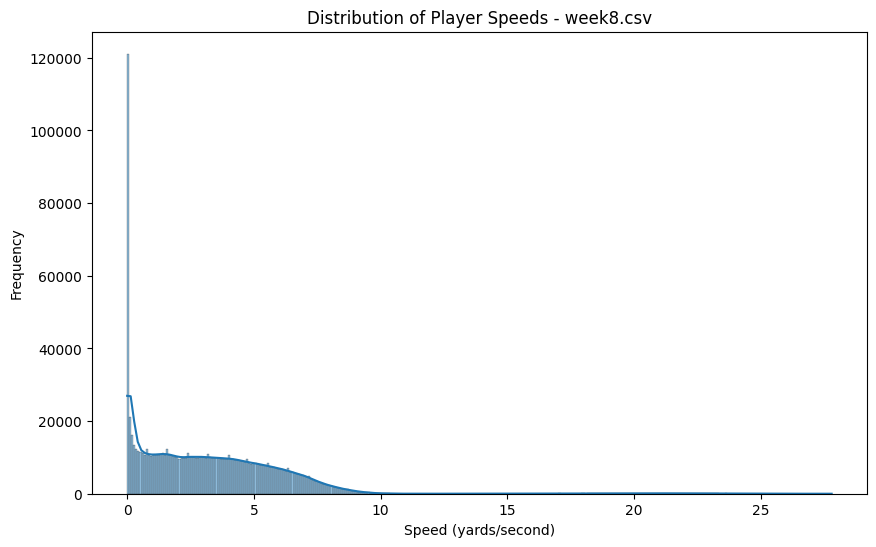

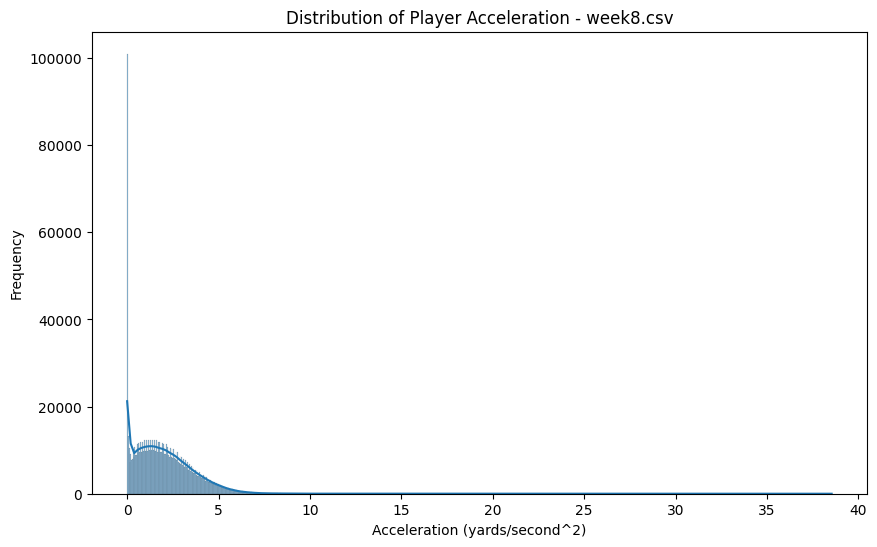

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


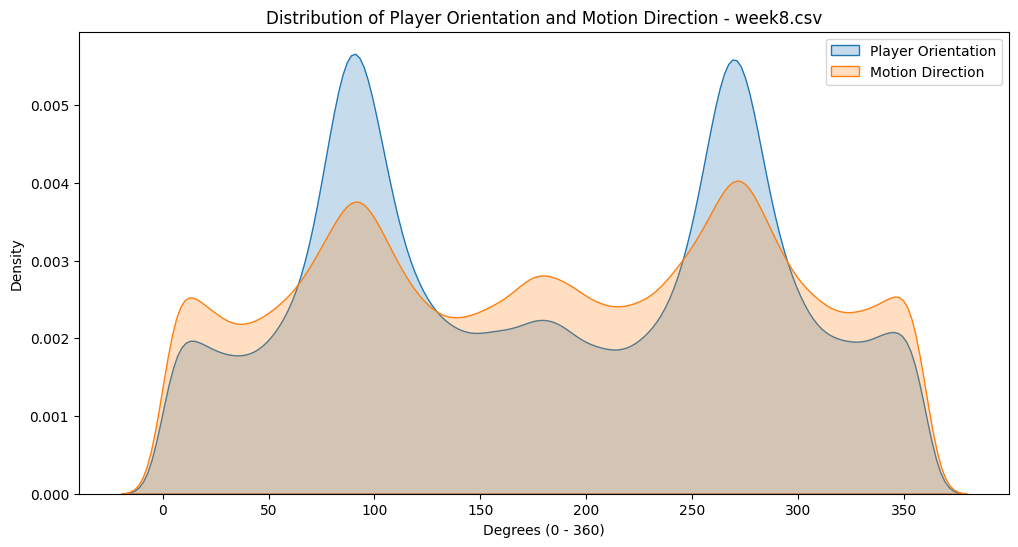

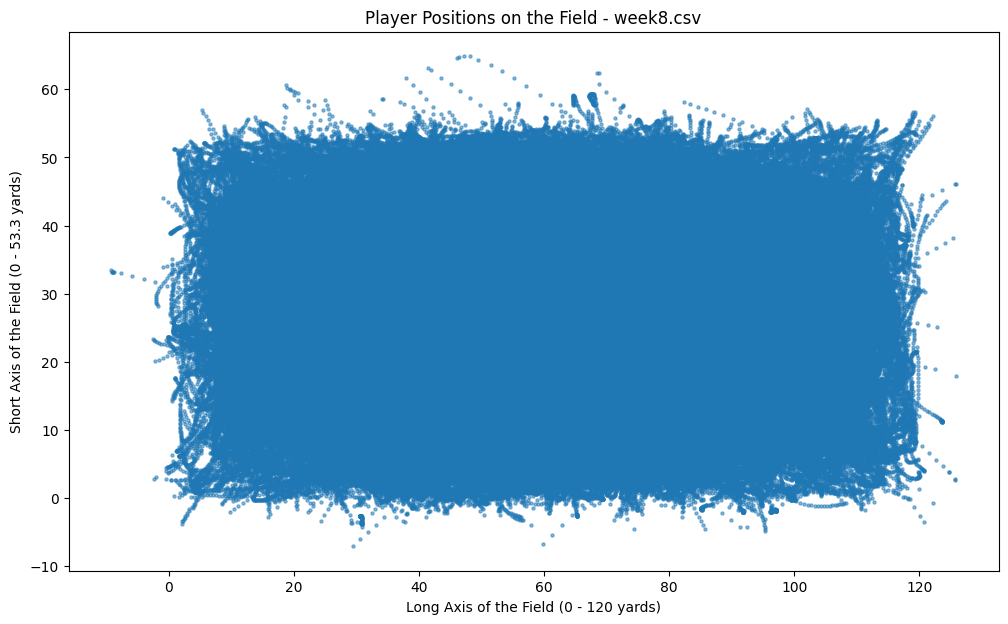

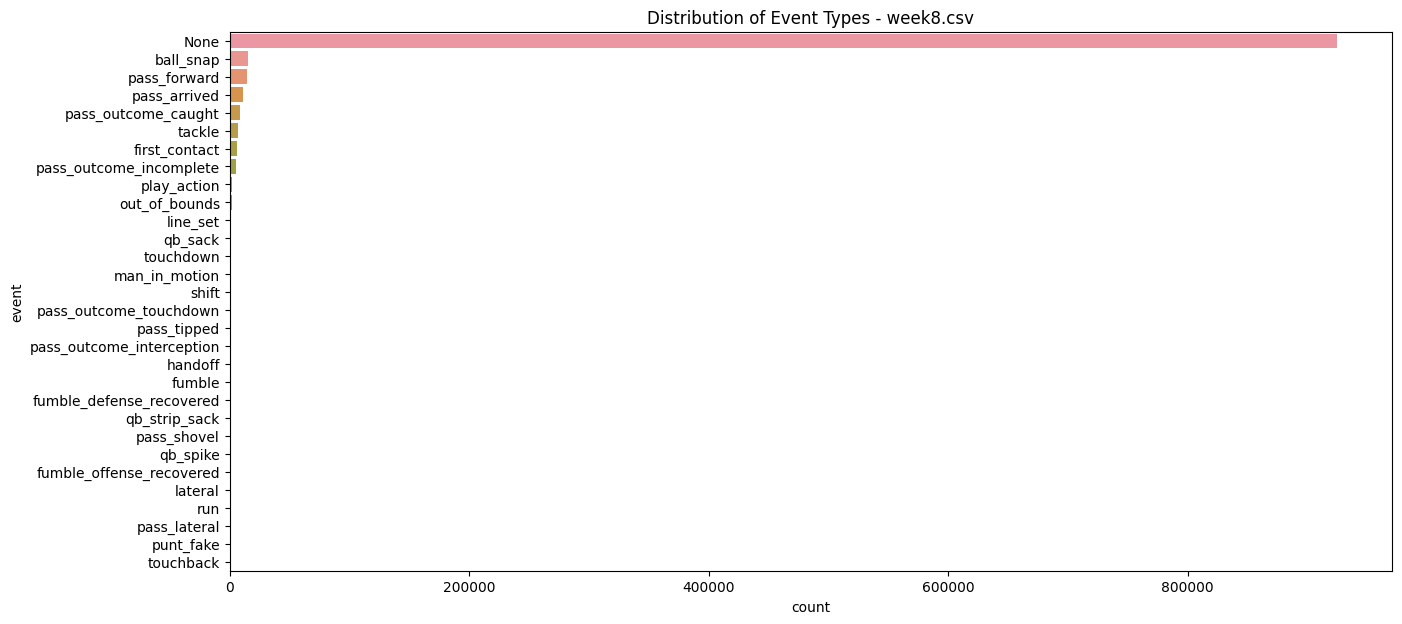

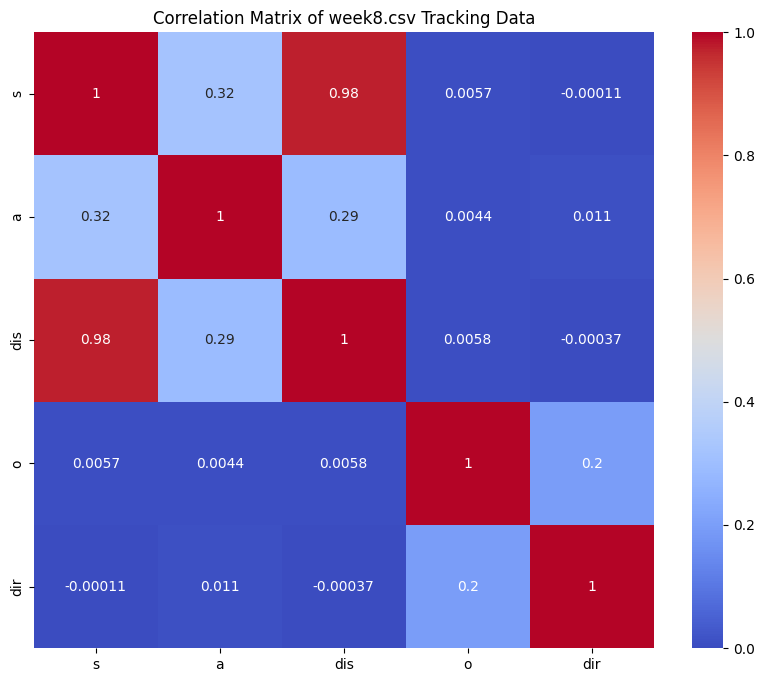

Processing week9.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-11-02T00:23:39.900Z  33.86  43.61  0.00  0.00  0.00   36.04  329.03   
1  2018-11-02T00:23:39.900Z  32.65  21.36  0.00  0.00  0.00  114.14   91.34   
2  2018-11-02T00:23:39.900Z  32.29  33.20  2.35  2.26  0.24   55.75   19.16   
3  2018-11-02T00:23:39.900Z  35.49  19.57  0.17  0.95  0.02  313.55  304.53   
4  2018-11-02T00:23:39.900Z  35.99  32.77  0.00  0.00  0.00  208.44  357.89   

  event      nflId      displayName  jerseyNumber position  frameId  team  \
0  None     1032.0     Jordy Nelson          82.0       WR        1  away   
1  None    71265.0       Jared Cook          87.0       TE        1  away   
2  None   497302.0   Brandon LaFell          19.0       WR        1  away   
3  None  2495507.0  Richard Sherman          25.0       CB        1  home   
4  None  2499278.0    Malcolm Smith          51.0      OLB        1  home   

       gameId  playId playDirection  rout

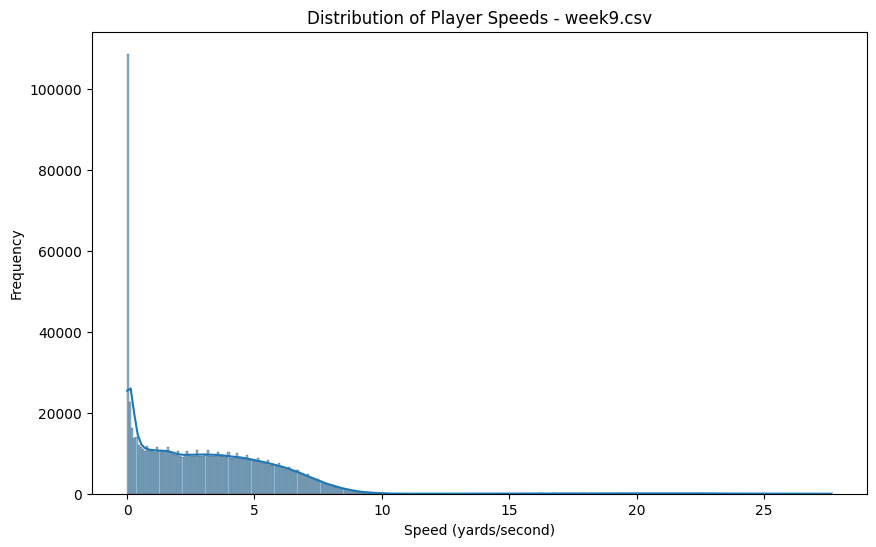

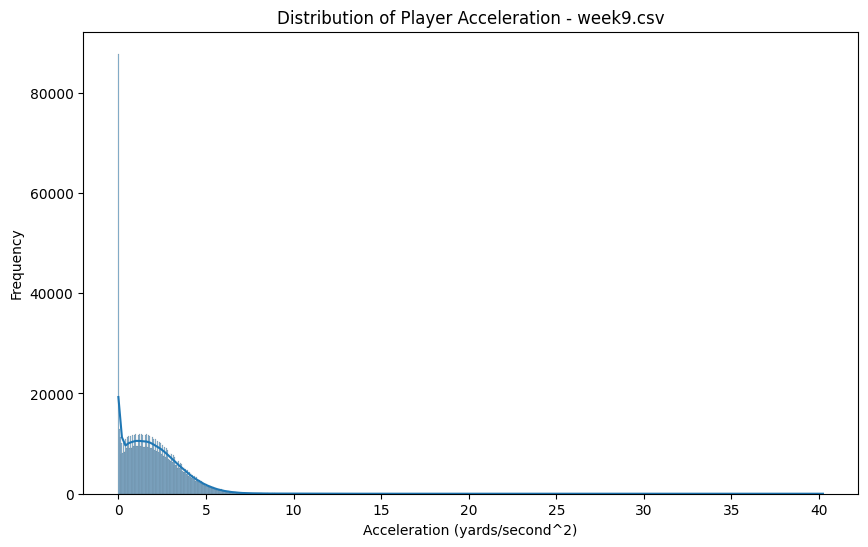

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


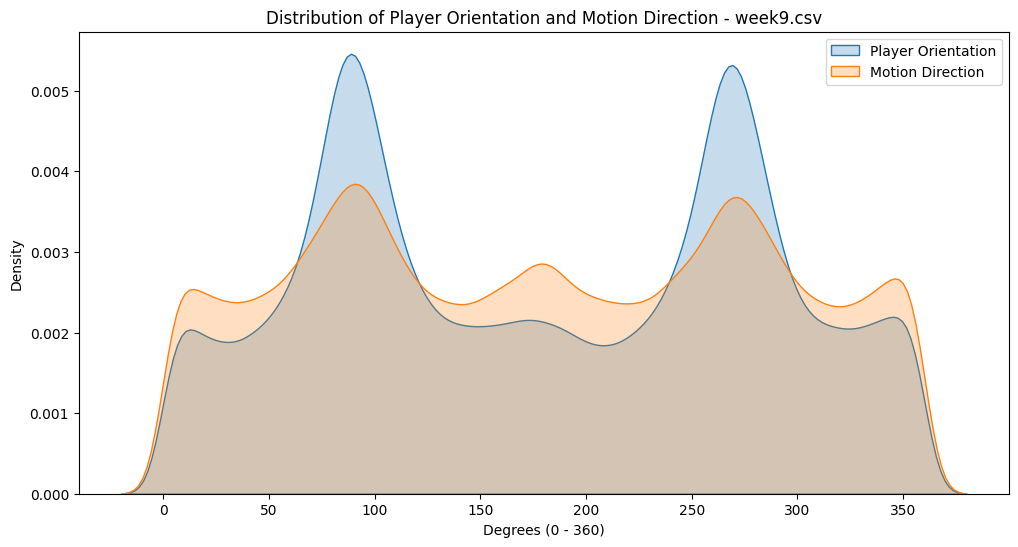

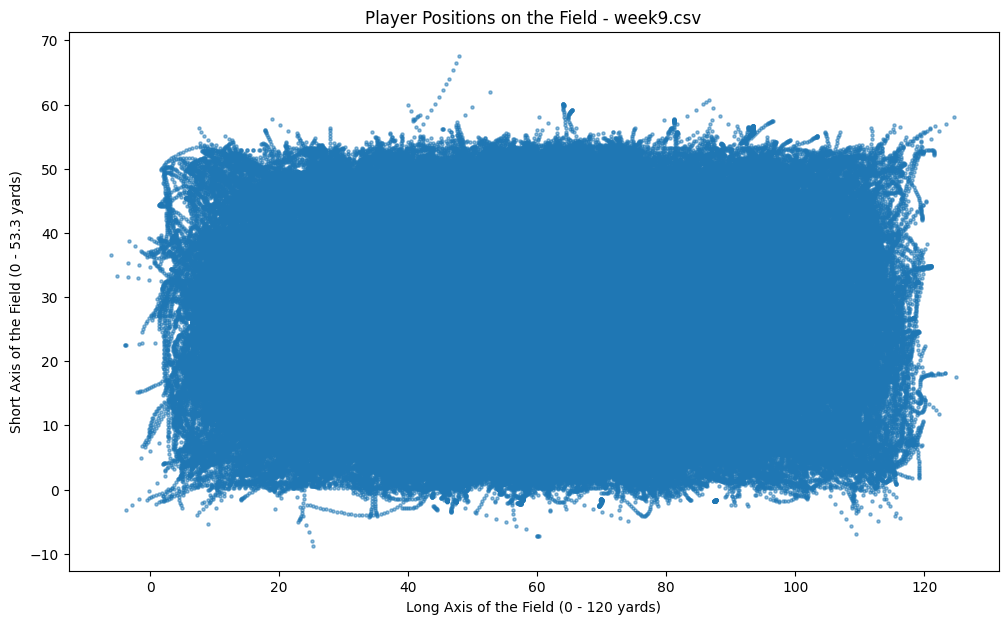

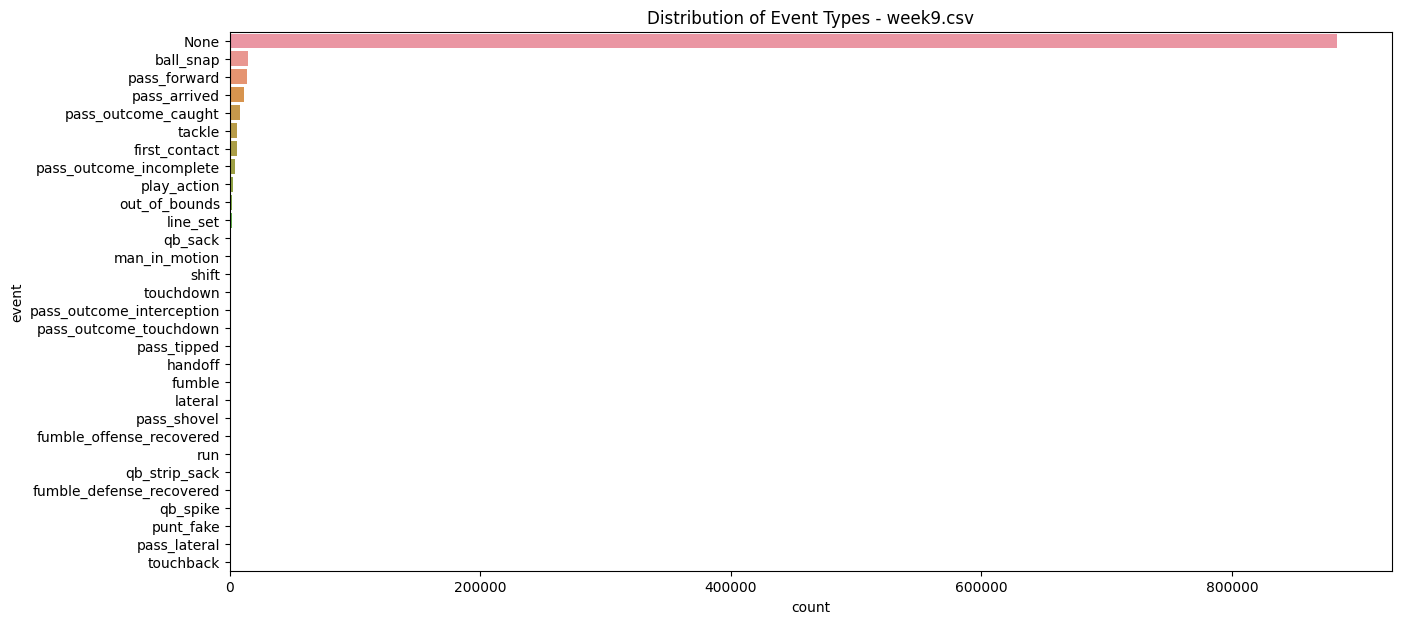

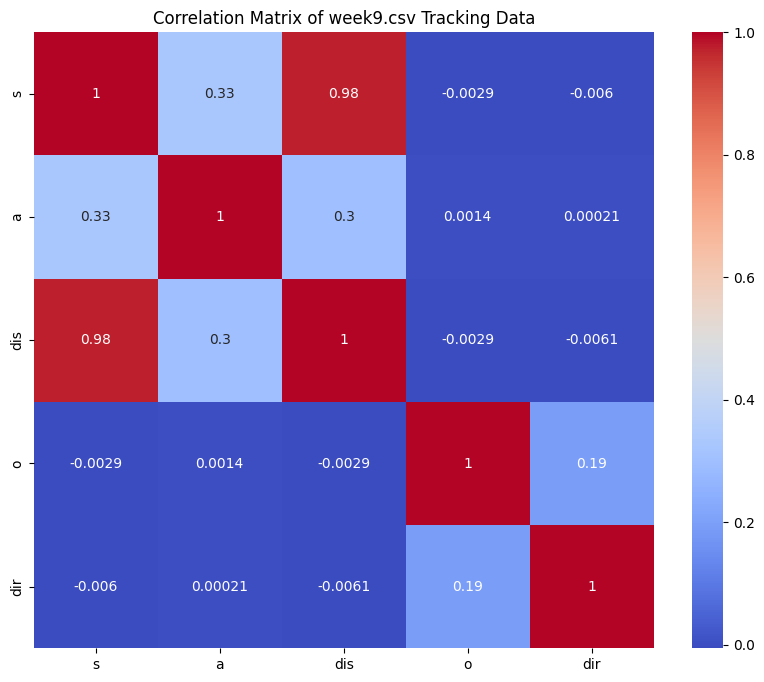

Processing week10.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-11-09T01:24:15.700Z  55.37  12.18  3.38  1.43  0.34  238.29  171.72   
1  2018-11-09T01:24:15.700Z  45.16  29.94  0.15  0.31  0.01  105.65   62.20   
2  2018-11-09T01:24:15.700Z  50.22  36.91  0.09  0.06  0.02   91.74  219.27   
3  2018-11-09T01:24:15.700Z  57.61  37.03  1.60  0.63  0.16  280.00  346.49   
4  2018-11-09T01:24:15.700Z  49.28  22.37  0.00  0.01  0.00   88.59   94.78   

  event      nflId      displayName  jerseyNumber position  frameId  team  \
0  None   496733.0        Joe Haden          23.0       CB        1  home   
1  None  2495455.0       Cam Newton           1.0       QB        1  away   
2  None  2495700.0       Greg Olsen          88.0       TE        1  away   
3  None  2532946.0  Coty Sensabaugh          24.0       CB        1  home   
4  None  2532978.0    Jarius Wright          13.0       WR        1  away   

       gameId  playId playDirection  rou

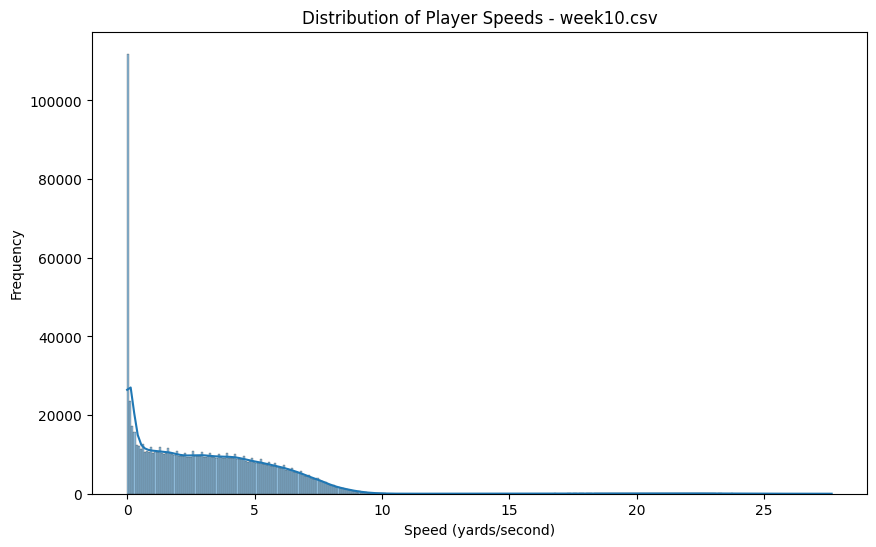

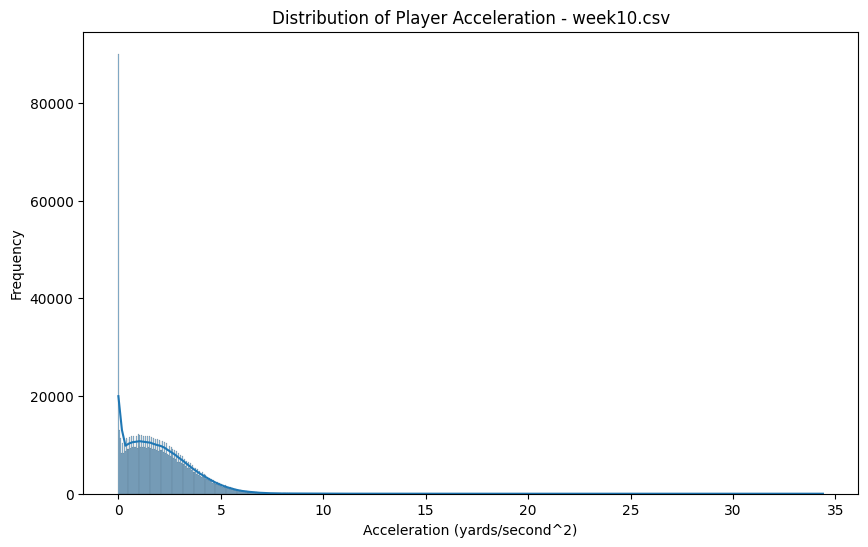

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


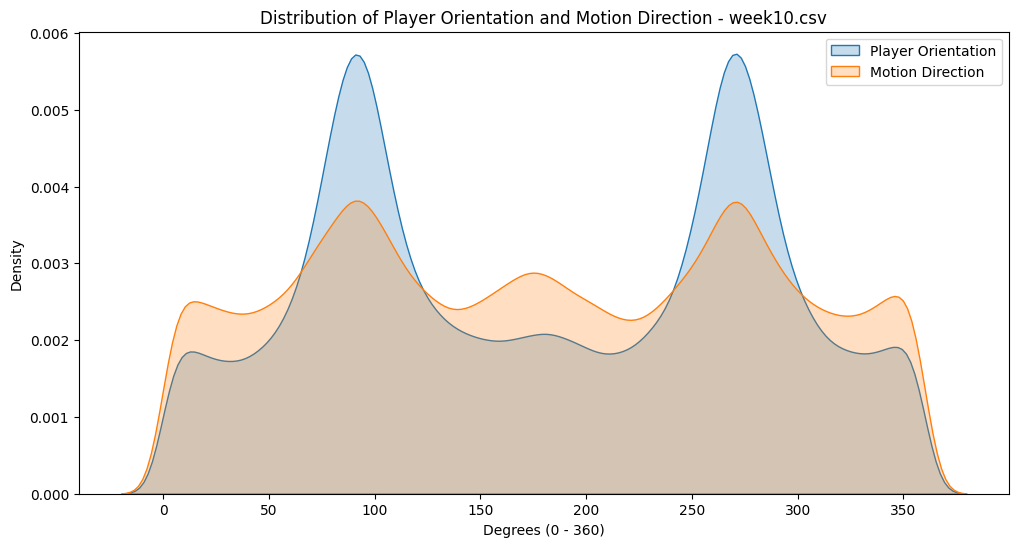

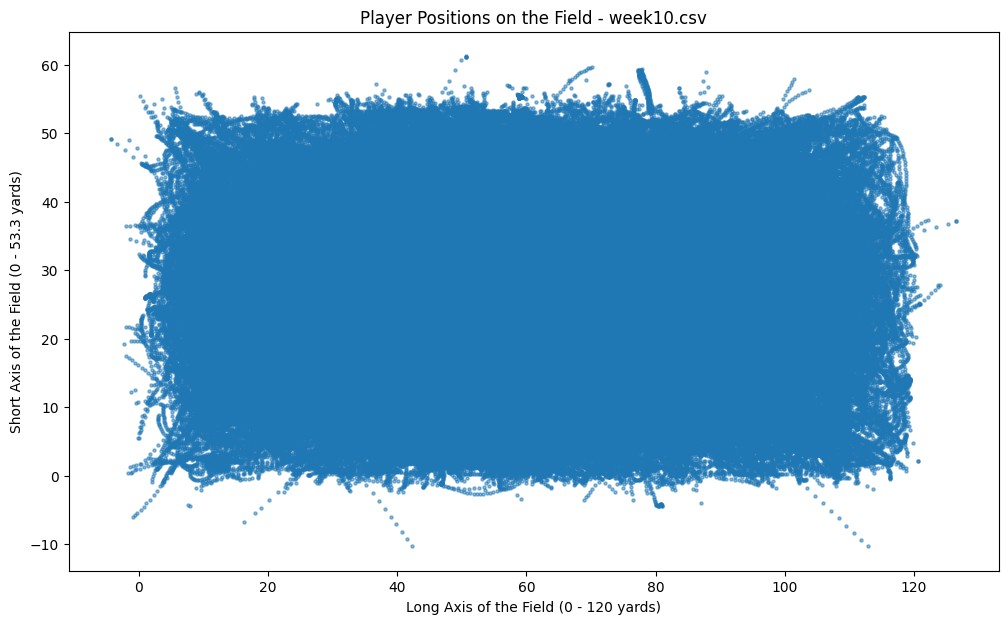

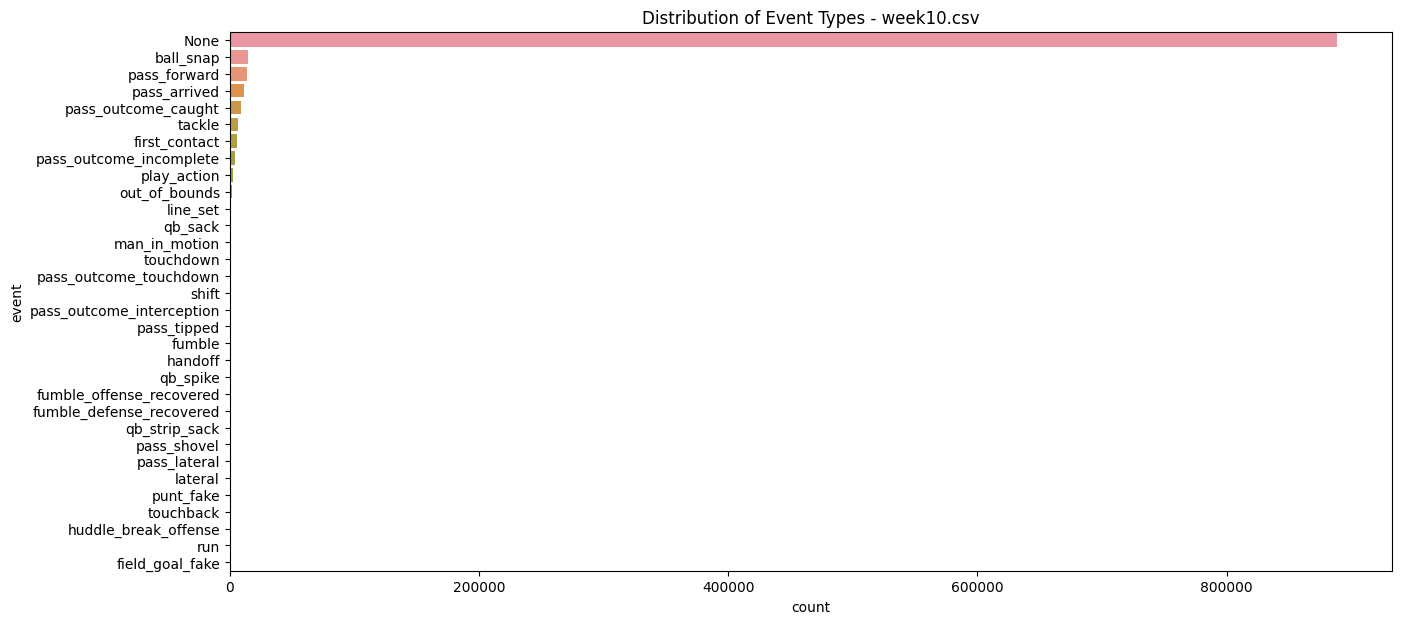

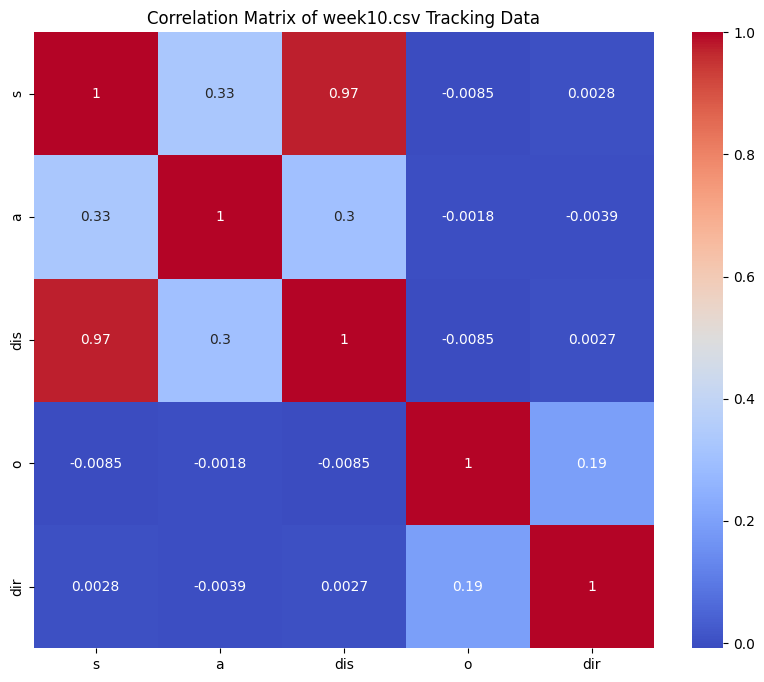

Processing week11.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-11-16T01:24:15.799Z  77.97  18.61  0.00  0.00  0.00  109.88  289.98   
1  2018-11-16T01:24:15.799Z  79.41  23.71  0.00  0.00  0.00   90.31  159.68   
2  2018-11-16T01:24:15.799Z  85.05  22.71  0.00  0.00  0.00  288.53  141.92   
3  2018-11-16T01:24:15.799Z  84.81  17.84  0.01  0.01  0.01  283.13  295.48   
4  2018-11-16T01:24:15.799Z  85.35  27.05  0.00  0.00  0.00  251.12  350.19   

  event      nflId        displayName  jerseyNumber position  frameId  team  \
0  None   497236.0       Jimmy Graham          80.0       TE        1  away   
1  None  2506363.0      Aaron Rodgers          12.0       QB        1  away   
2  None  2532966.0       Bobby Wagner          54.0      MLB        1  home   
3  None  2539243.0  Bradley McDougald          30.0       SS        1  home   
4  None  2540140.0   Barkevious Mingo          51.0      OLB        1  home   

       gameId  playId playDi

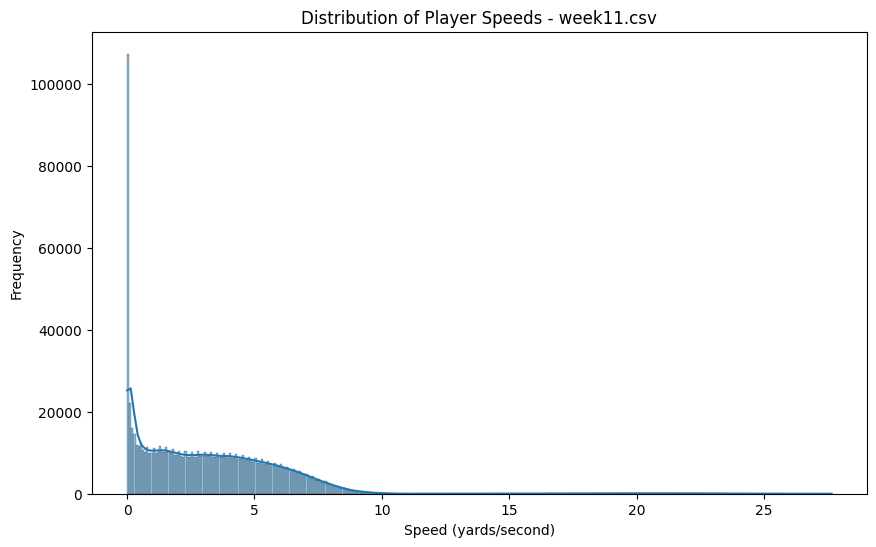

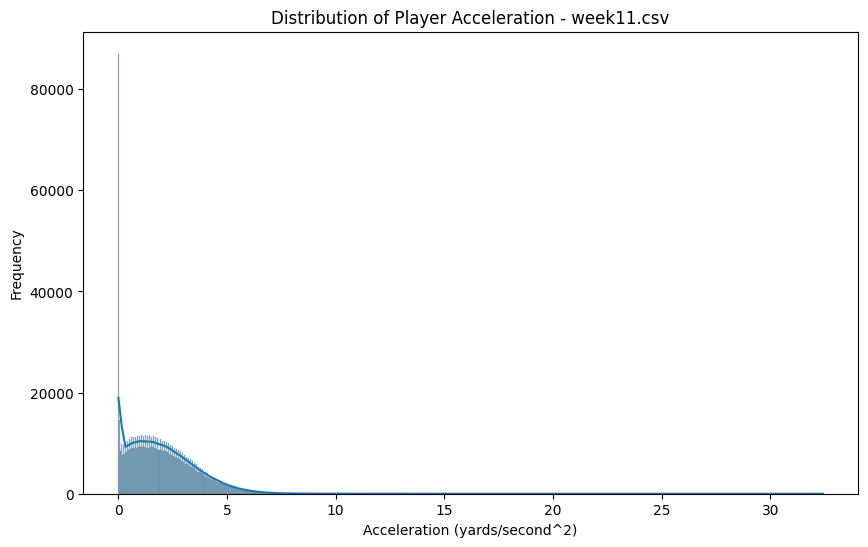

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


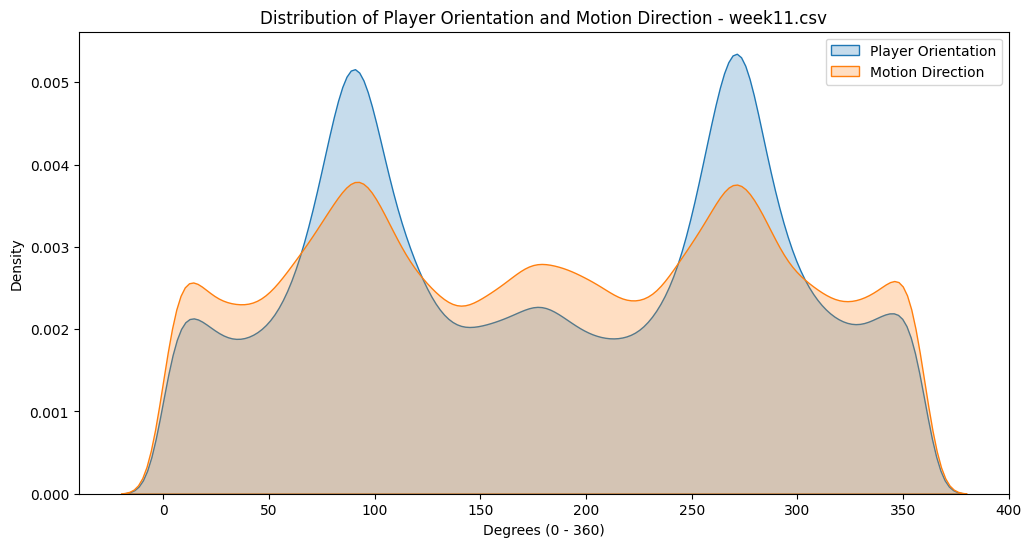

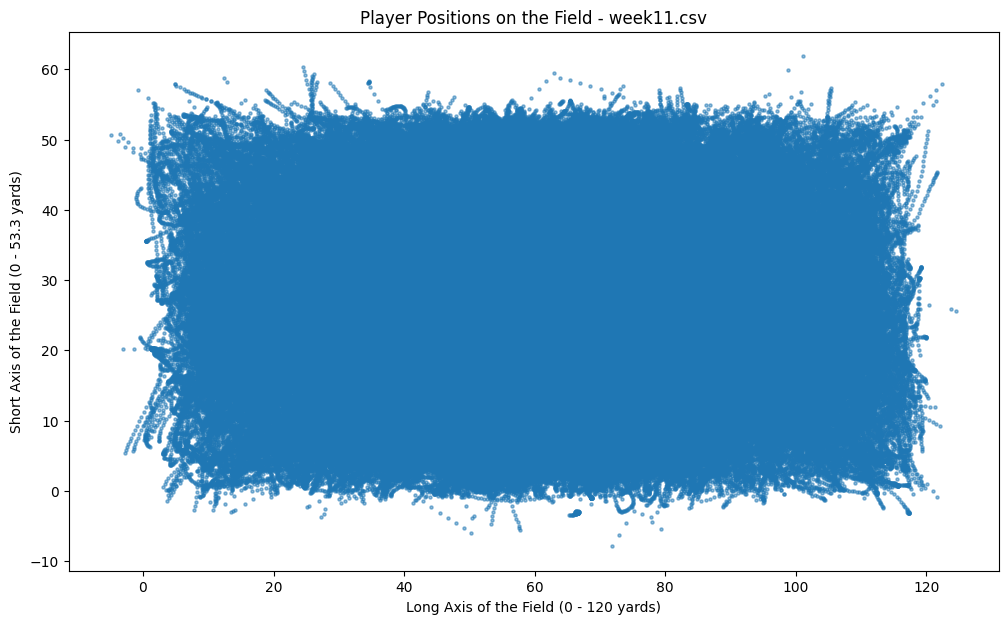

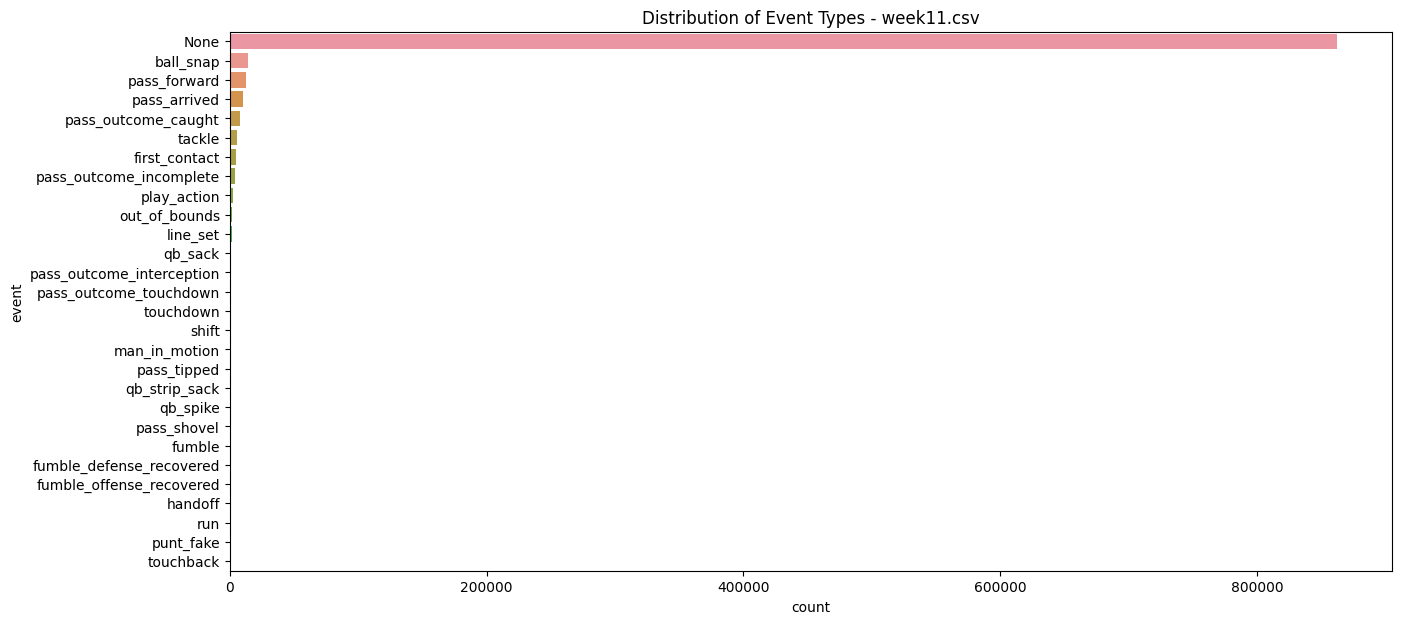

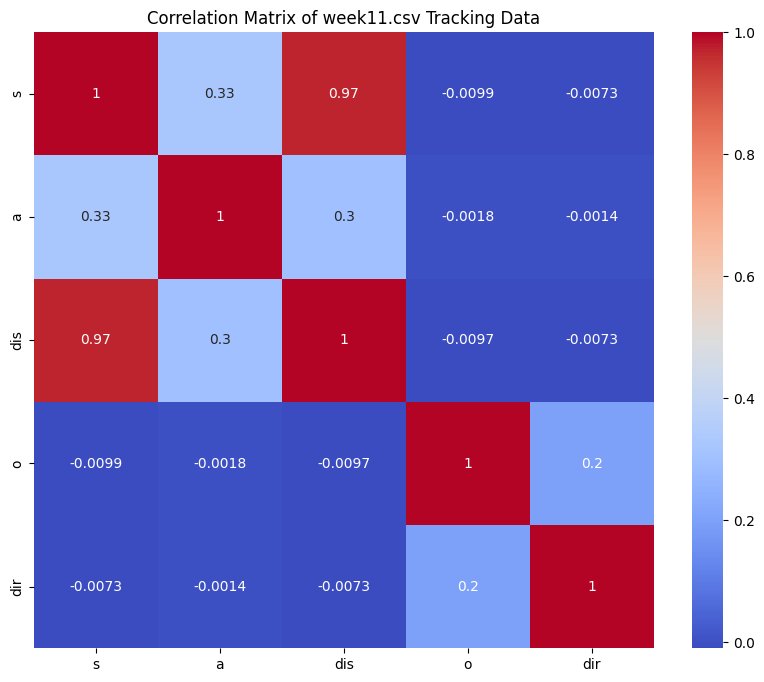

Processing week12.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-11-22T17:39:48.599Z  31.99  26.86  0.08  0.07  0.01   97.26   76.57   
1  2018-11-22T17:39:48.599Z  37.15  43.19  0.00  0.00  0.00  263.41  357.67   
2  2018-11-22T17:39:48.599Z  39.62  31.97  0.12  0.11  0.02  266.92  299.15   
3  2018-11-22T17:39:48.599Z  31.86  23.66  0.00  0.00  0.00   99.08  102.70   
4  2018-11-22T17:39:48.599Z  35.58  31.46  0.00  0.00  0.00  100.63  171.63   

  event      nflId       displayName  jerseyNumber position  frameId  team  \
0  None    79860.0  Matthew Stafford           9.0       QB        1  home   
1  None  2495108.0  Prince Amukamara          20.0       CB        1  away   
2  None  2532961.0   Danny Trevathan          59.0      ILB        1  away   
3  None  2540020.0      Theo Riddick          25.0       RB        1  home   
4  None  2540203.0    Levine Toilolo          87.0       TE        1  home   

       gameId  playId playDirectio

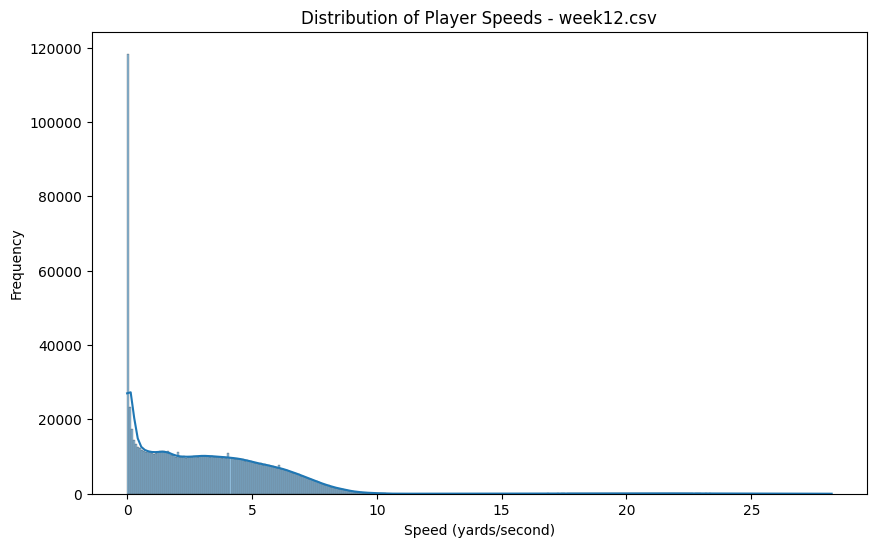

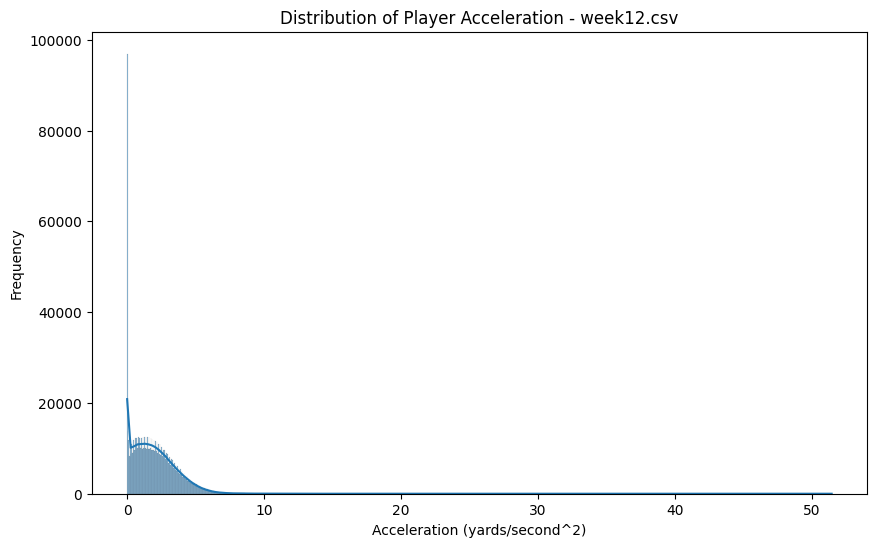

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


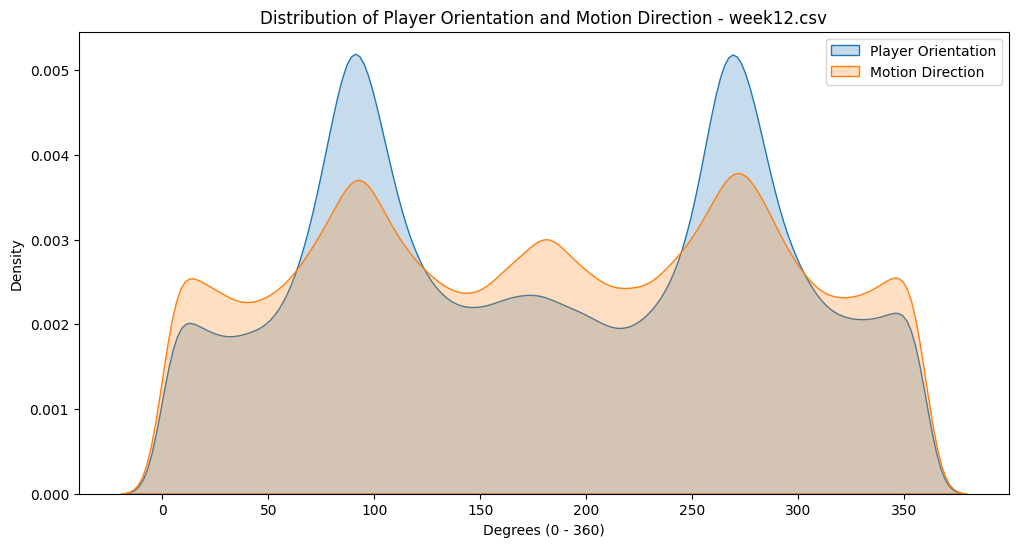

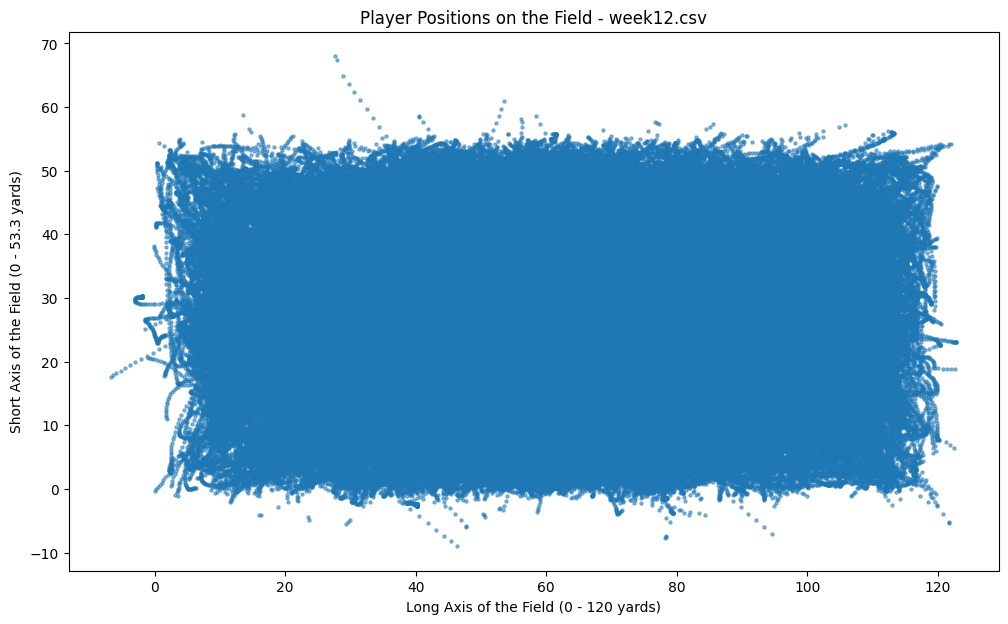

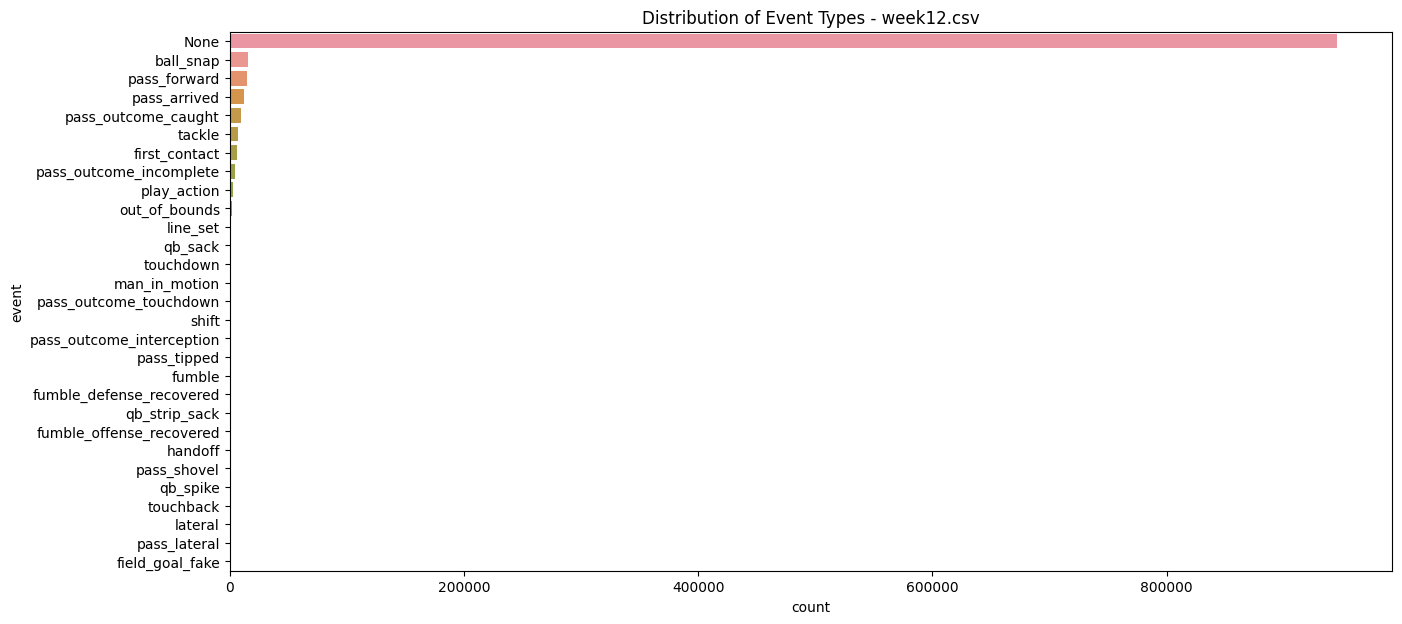

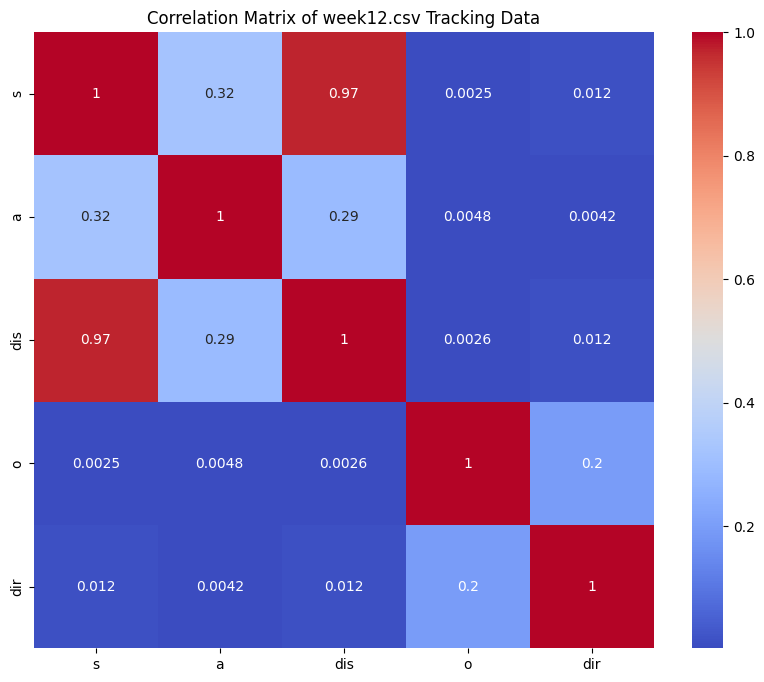

Processing week13.csv
                       time      x      y     s     a  dis       o     dir  \
0  2018-11-30T01:23:34.400Z  76.58  28.51  0.01  0.01  0.0   64.85  111.99   
1  2018-11-30T01:23:34.400Z  83.06  18.17  0.00  0.00  0.0  291.68  348.76   
2  2018-11-30T01:23:34.400Z  76.51  25.57  0.01  0.01  0.0  116.62    6.78   
3  2018-11-30T01:23:34.400Z  77.28  16.68  0.02  0.03  0.0  339.54  162.92   
4  2018-11-30T01:23:34.400Z  82.16   9.84  0.01  0.01  0.0  282.92  188.09   

  event      nflId    displayName  jerseyNumber position  frameId  team  \
0  None  2533008.0  Demario Davis          56.0      ILB        1  away   
1  None  2535698.0   Cole Beasley          11.0       WR        1  home   
2  None  2539982.0     A.J. Klein          53.0      OLB        1  away   
3  None  2552484.0  P.J. Williams          26.0       CB        1  away   
4  None  2552487.0   Amari Cooper          19.0       WR        1  home   

       gameId  playId playDirection  route  
0  2018112900

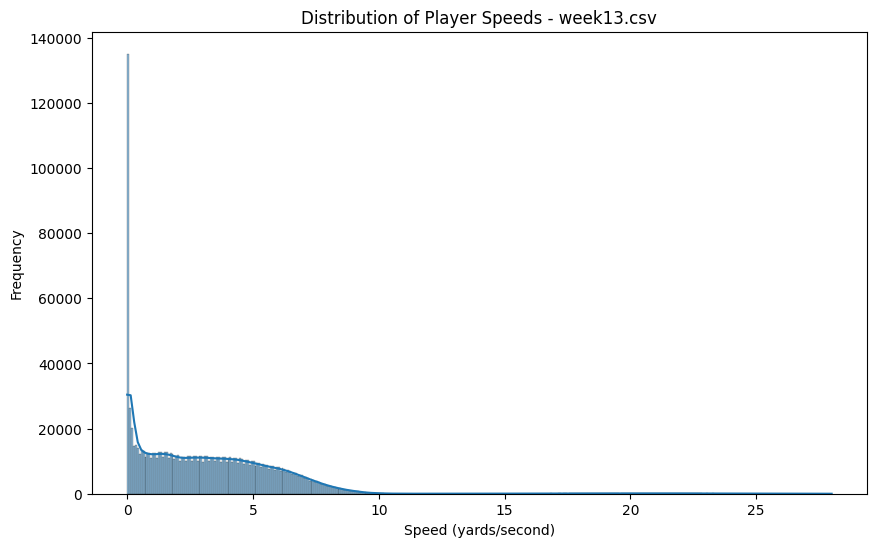

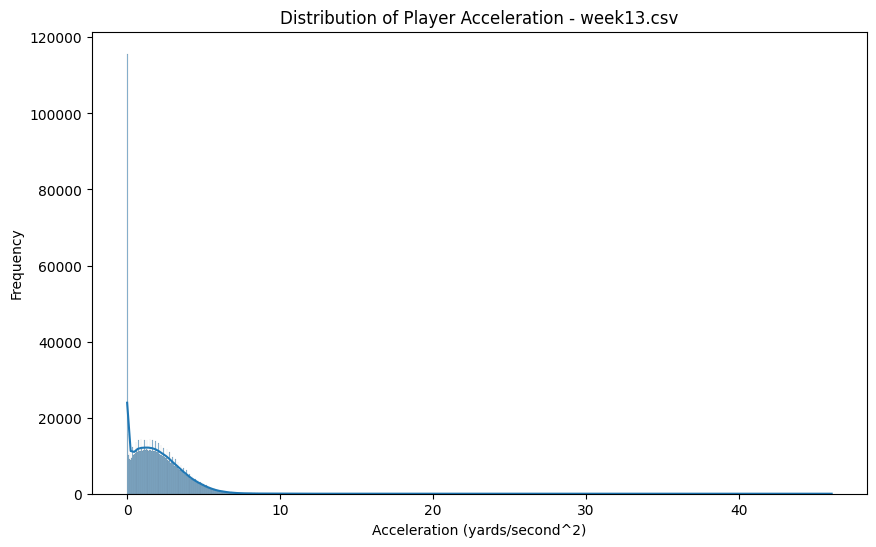

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


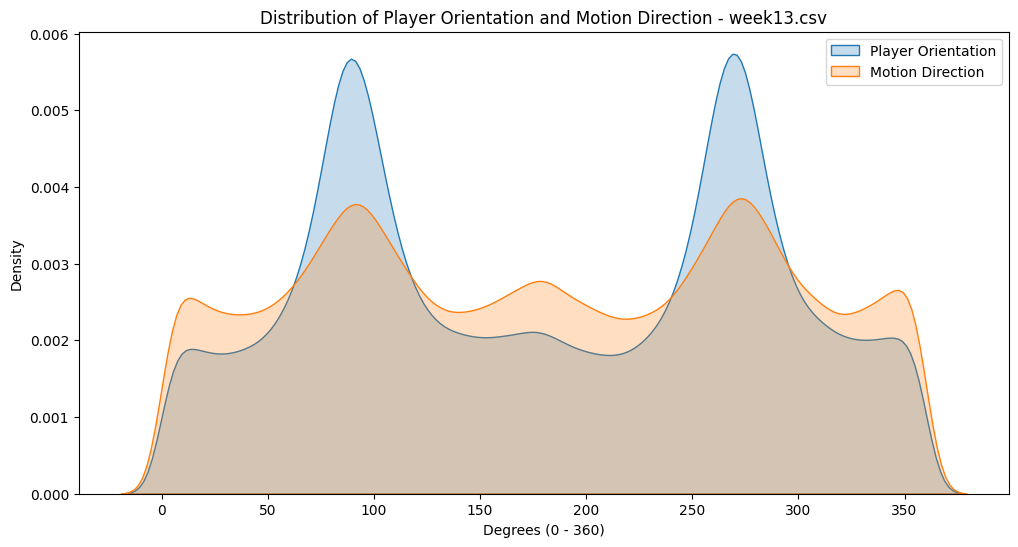

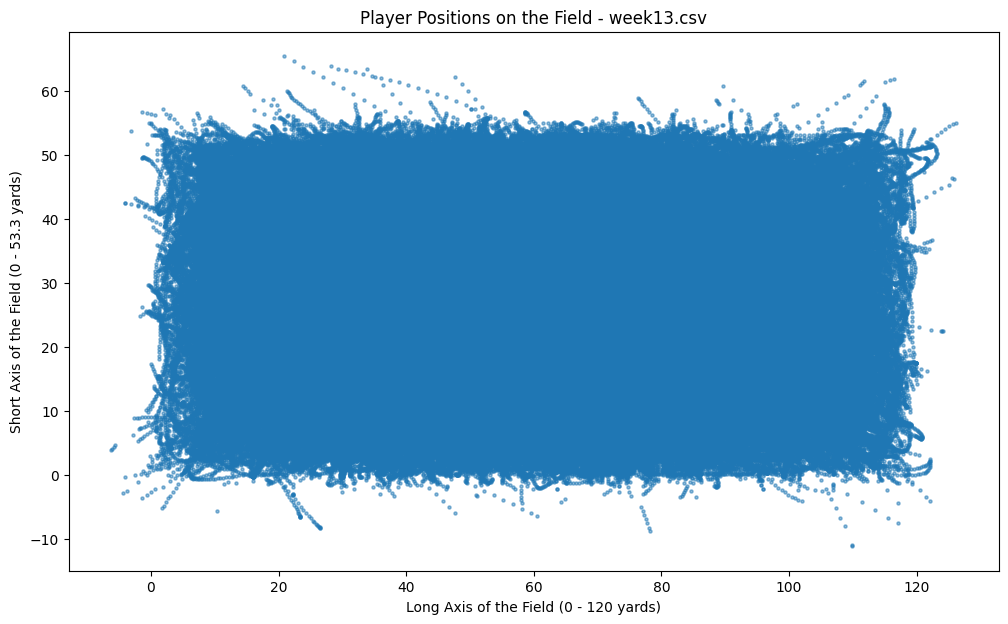

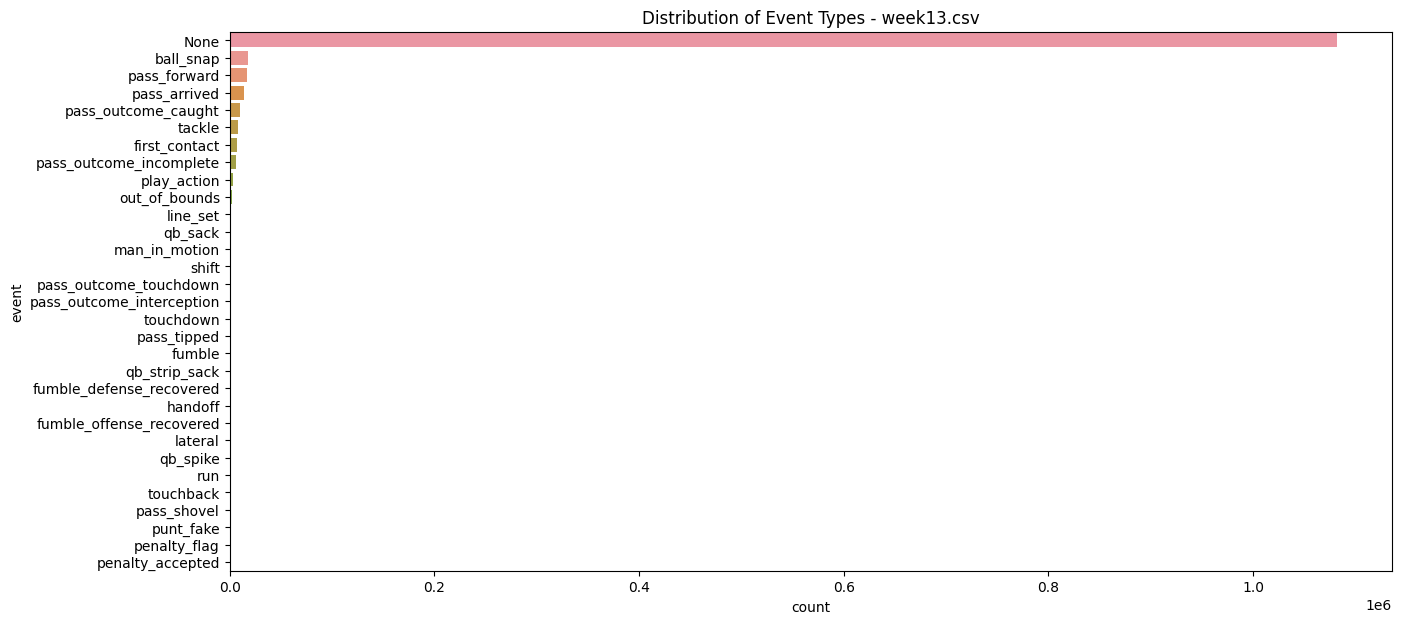

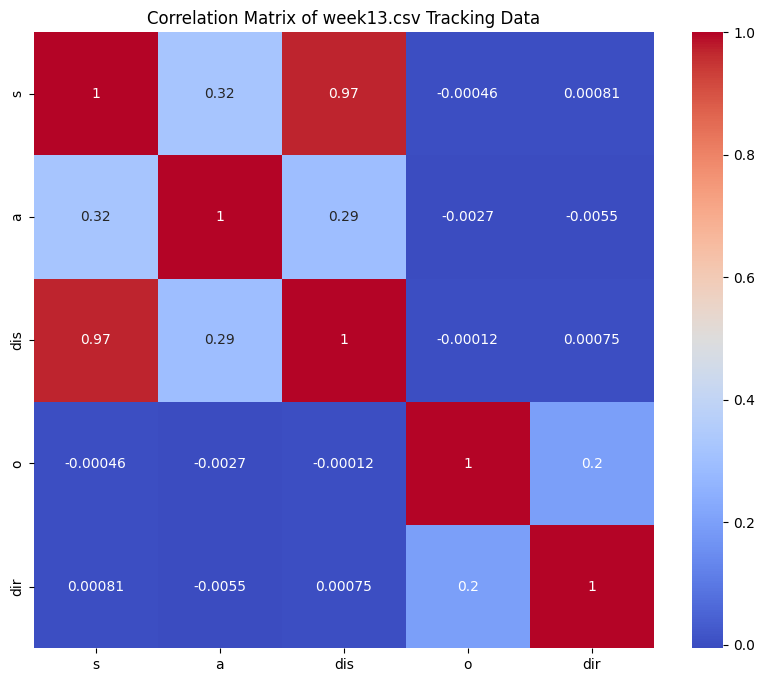

Processing week14.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-12-07T01:23:42.599Z  85.79  25.06  0.00  0.00  0.00  292.51  253.38   
1  2018-12-07T01:23:42.599Z  68.51  21.01  1.67  1.10  0.16  111.50  162.72   
2  2018-12-07T01:23:42.599Z  79.59  17.14  0.99  1.23  0.09   56.50  327.54   
3  2018-12-07T01:23:42.599Z  76.54   8.66  0.56  0.31  0.06   13.56  248.81   
4  2018-12-07T01:23:42.599Z  75.82  28.98  0.36  1.53  0.04  119.68   62.39   

  event      nflId     displayName  jerseyNumber position  frameId  team  \
0  None  2495469.0      Dion Lewis          33.0       RB        1  home   
1  None  2532848.0  Tashaun Gipson          39.0       FS        1  away   
2  None  2539237.0     D.J. Hayden          25.0       CB        1  away   
3  None  2541162.0      A.J. Bouye          21.0       CB        1  away   
4  None  2543711.0    Telvin Smith          50.0      OLB        1  away   

       gameId  playId playDirection route  
0 

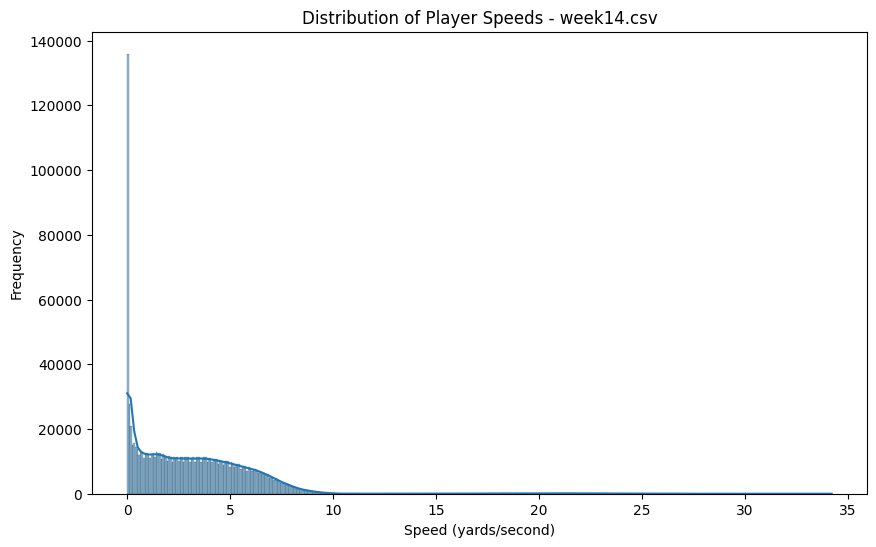

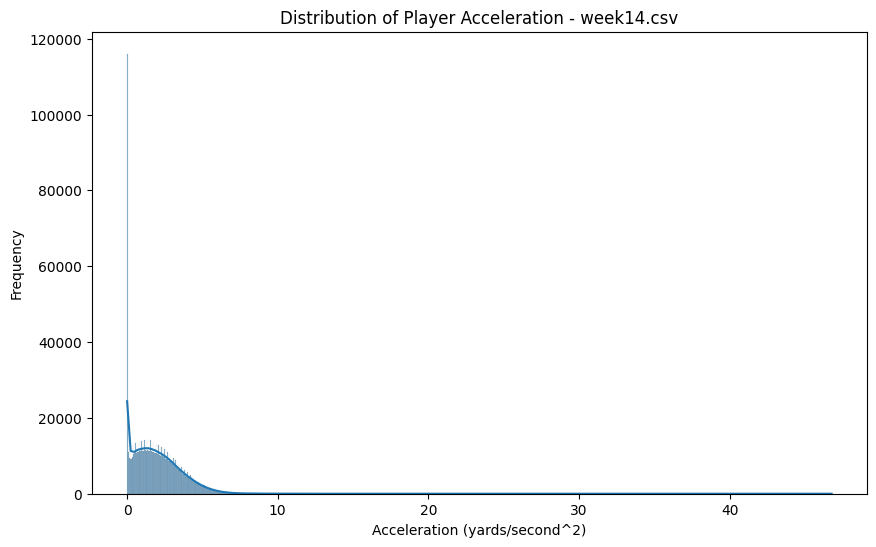

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


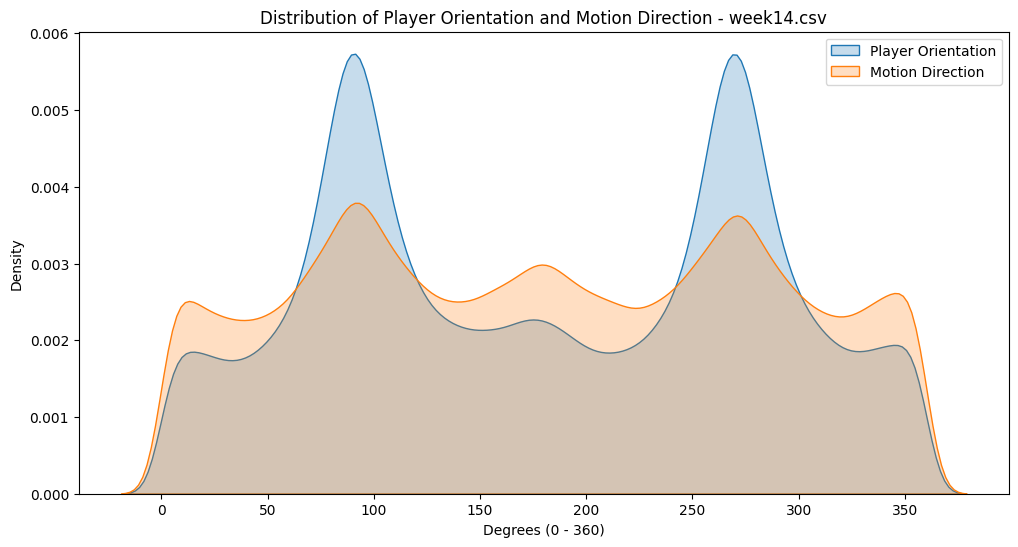

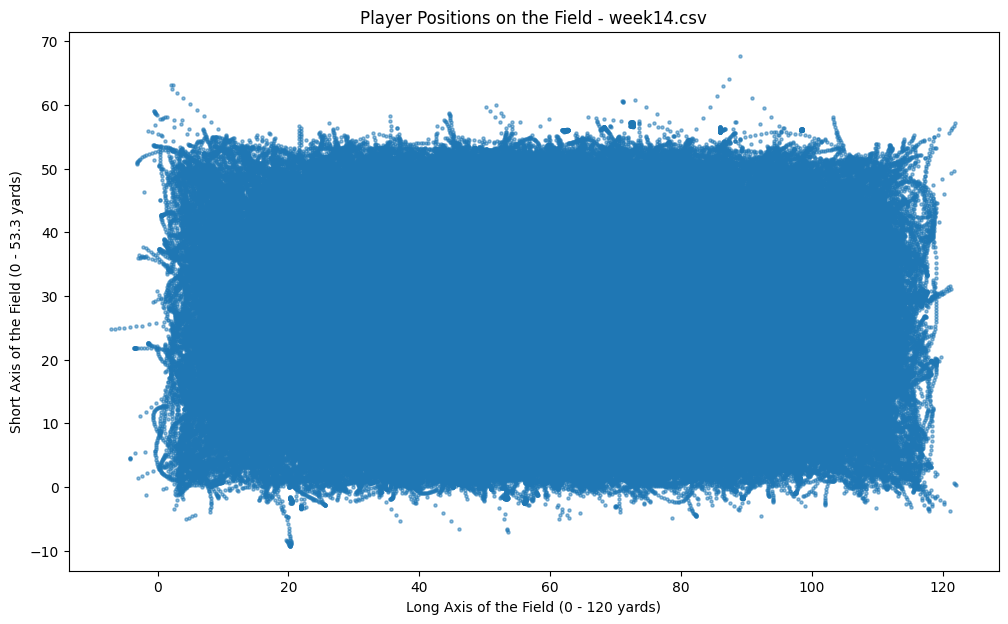

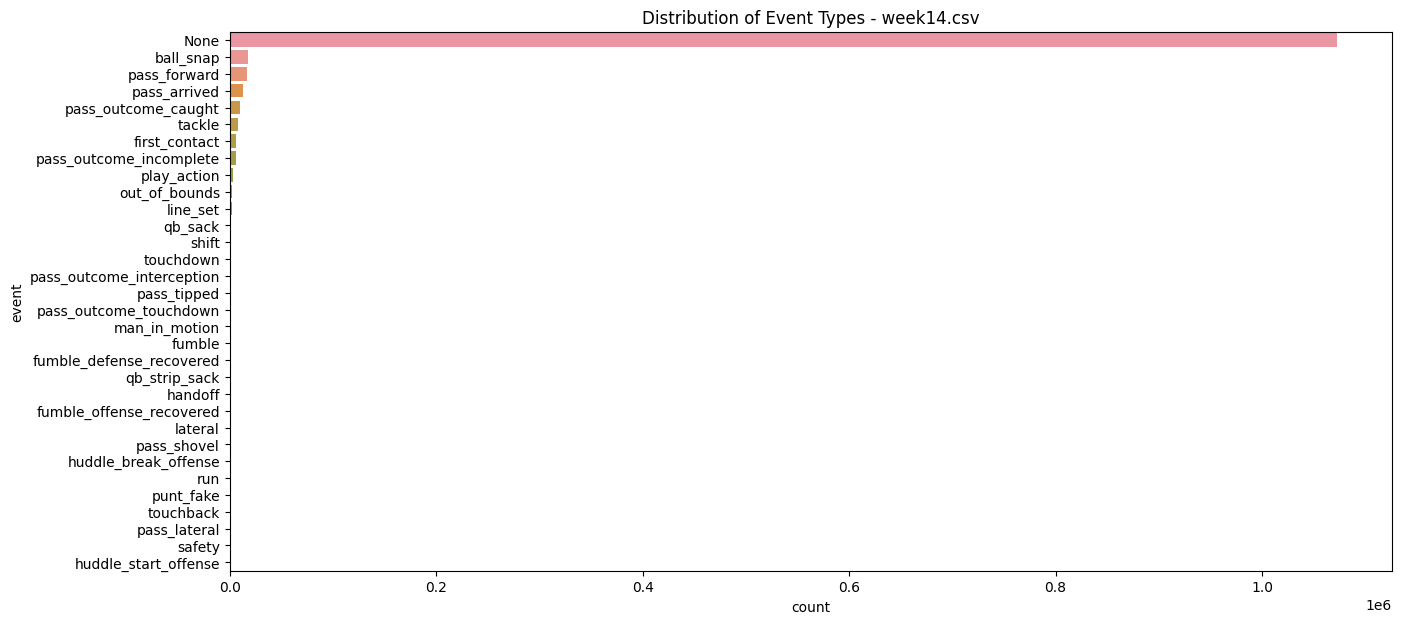

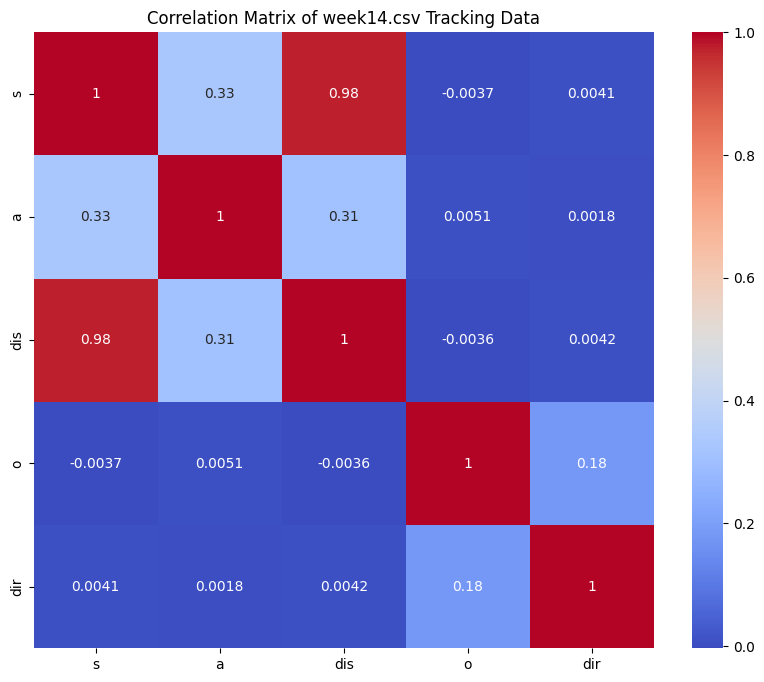

Processing week15.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-12-14T01:23:55.400Z  79.82  24.76  4.95  2.71  0.50  159.18  152.45   
1  2018-12-14T01:23:55.400Z  89.06  22.81  1.74  4.09  0.20  253.90  199.21   
2  2018-12-14T01:23:55.400Z  86.28  32.45  0.01  0.01  0.00  122.22   69.31   
3  2018-12-14T01:23:55.400Z  91.54  27.30  0.11  0.09  0.00  275.04  341.42   
4  2018-12-14T01:23:55.400Z  79.44  44.93  0.33  0.41  0.03   85.63  319.27   

  event      nflId     displayName  jerseyNumber position  frameId  team  \
0  None   496723.0      Eric Berry          29.0       SS        1  home   
1  None  2495288.0    Virgil Green          88.0       TE        1  away   
2  None  2495493.0  Justin Houston          50.0      OLB        1  home   
3  None  2506121.0   Philip Rivers          17.0       QB        1  away   
4  None  2530794.0      Ron Parker          38.0       FS        1  home   

       gameId  playId playDirection route  
0 

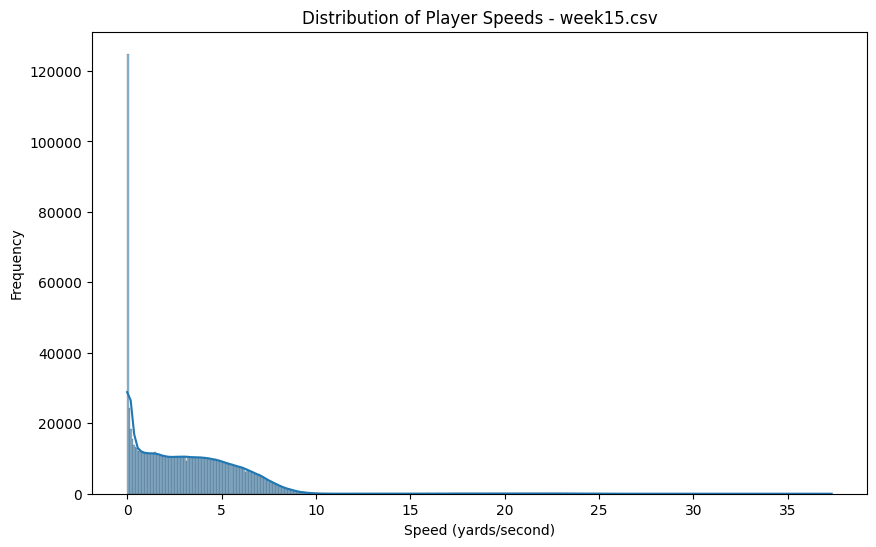

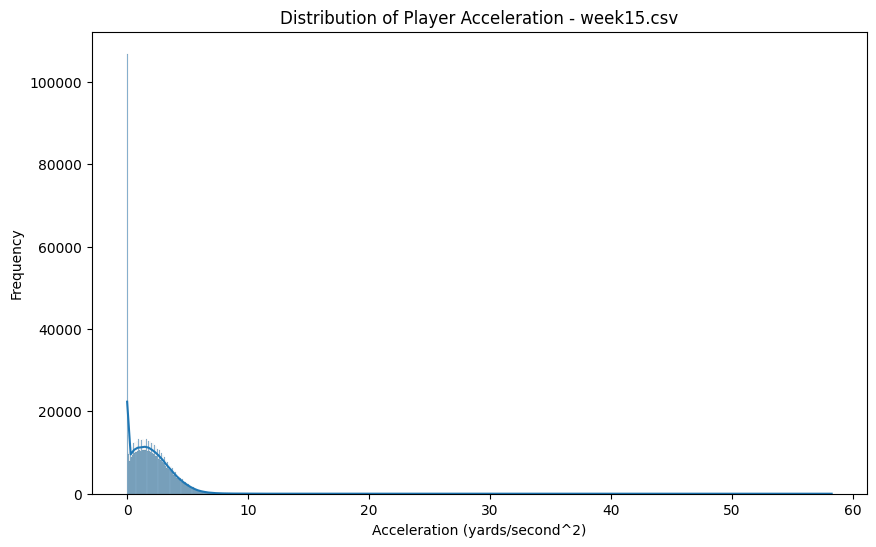

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


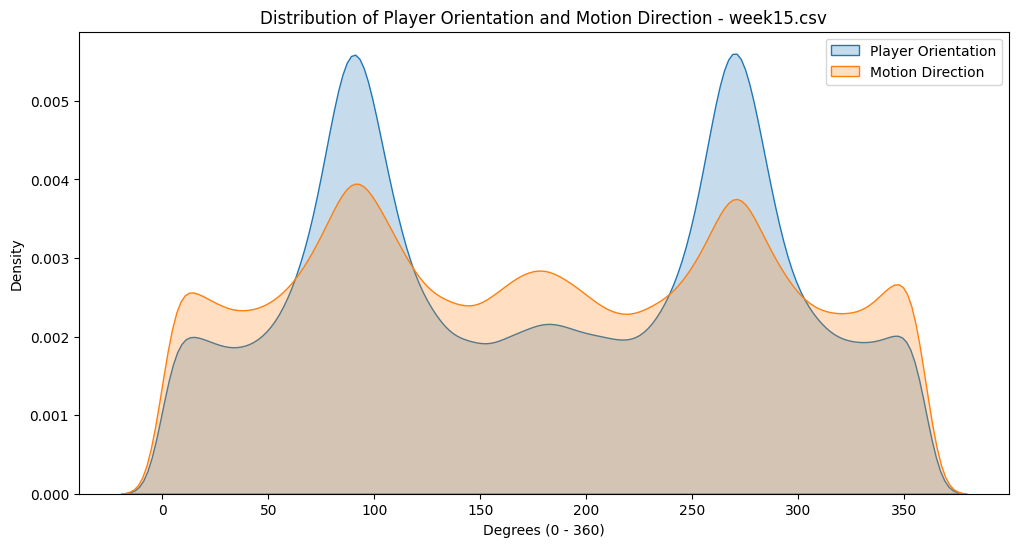

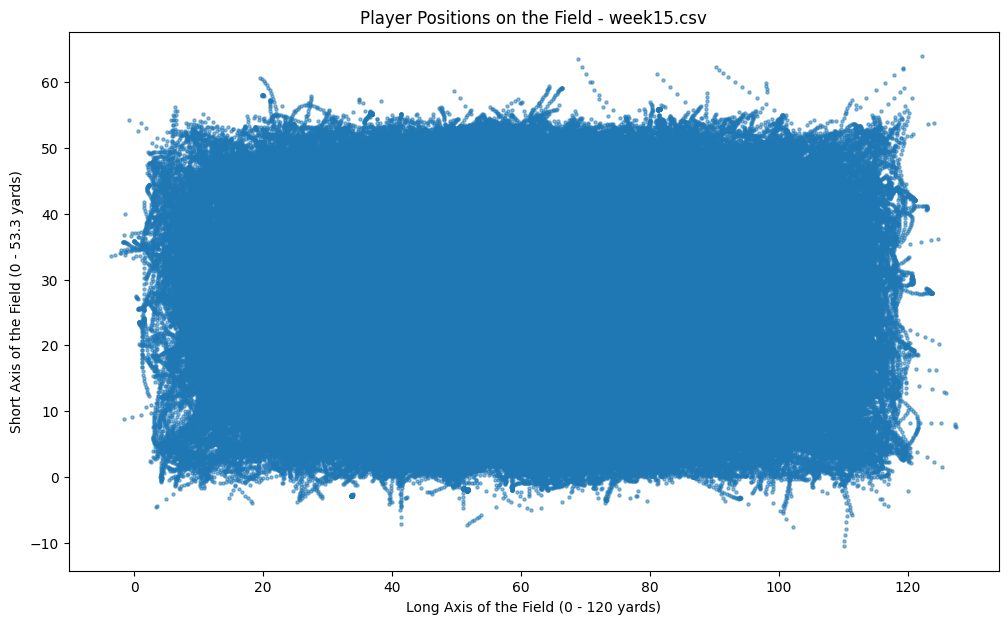

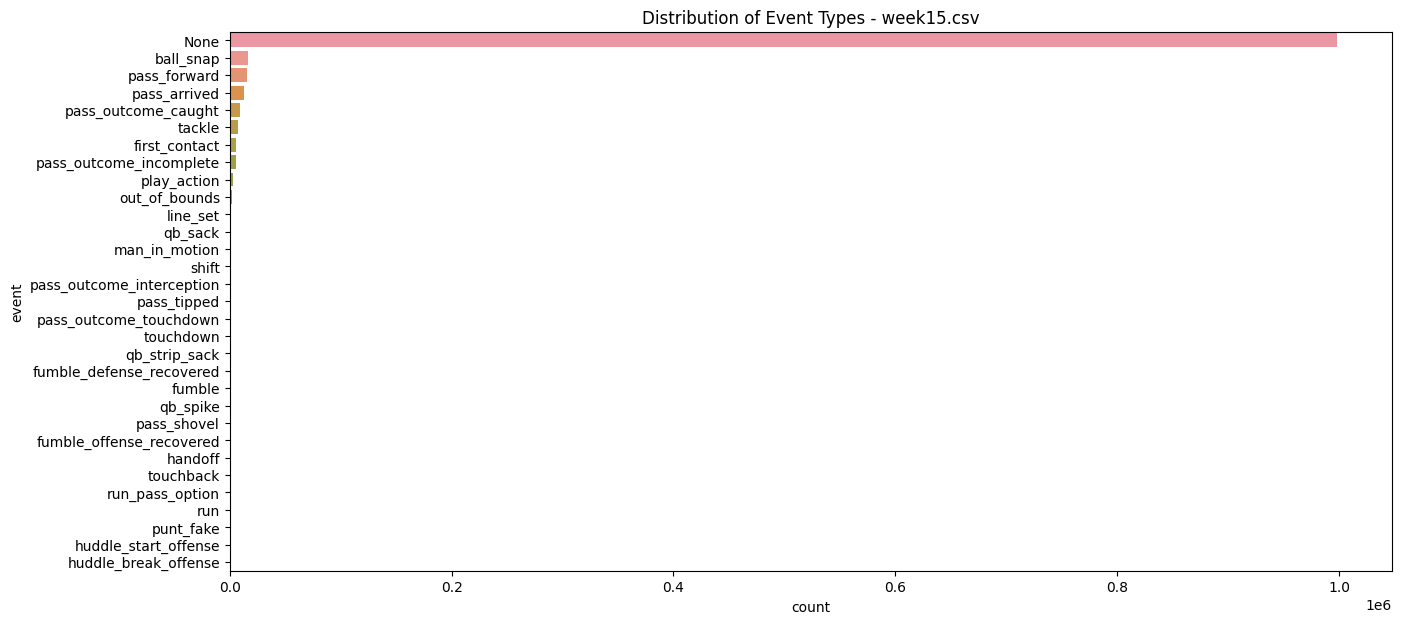

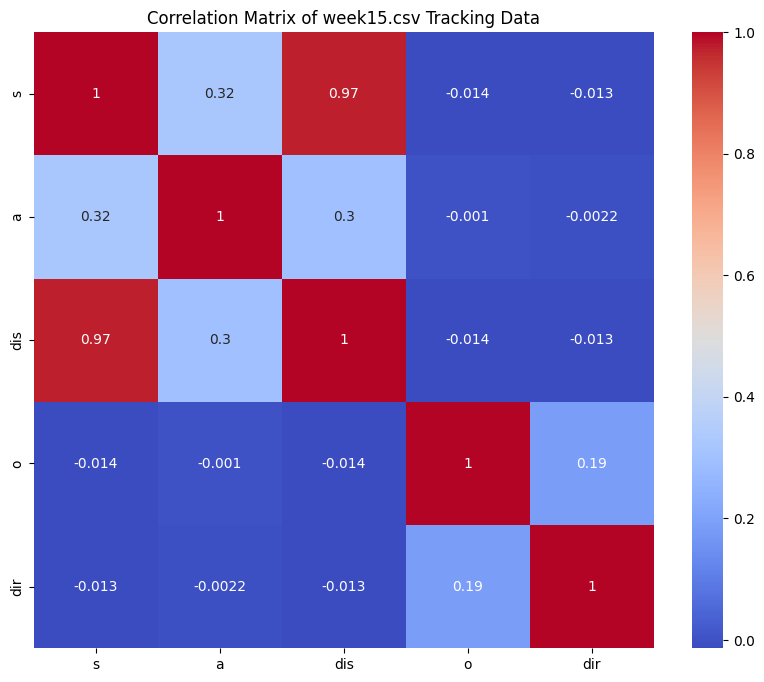

Processing week16.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-12-22T21:31:56.500Z  40.71  23.78  0.00  0.00  0.00   78.10   21.27   
1  2018-12-22T21:31:56.500Z  46.31  24.08  0.66  0.52  0.07  274.14  196.09   
2  2018-12-22T21:31:56.500Z  43.03  18.30  0.01  0.01  0.01  299.04   20.48   
3  2018-12-22T21:31:56.500Z  34.04  23.91  0.00  0.00  0.00  120.07  166.34   
4  2018-12-22T21:31:56.500Z  38.85  19.78  3.31  1.40  0.34  143.48  175.90   

  event      nflId      displayName  jerseyNumber position  frameId  team  \
0  None      264.0     Josh Johnson           8.0       QB        1  away   
1  None     2354.0  Wesley Woodyard          59.0      ILB        1  home   
2  None   496828.0   Derrick Morgan          91.0      OLB        1  home   
3  None  2507164.0  Adrian Peterson          26.0       RB        1  away   
4  None  2532841.0    Michael Floyd          17.0       WR        1  away   

       gameId  playId playDirection rout

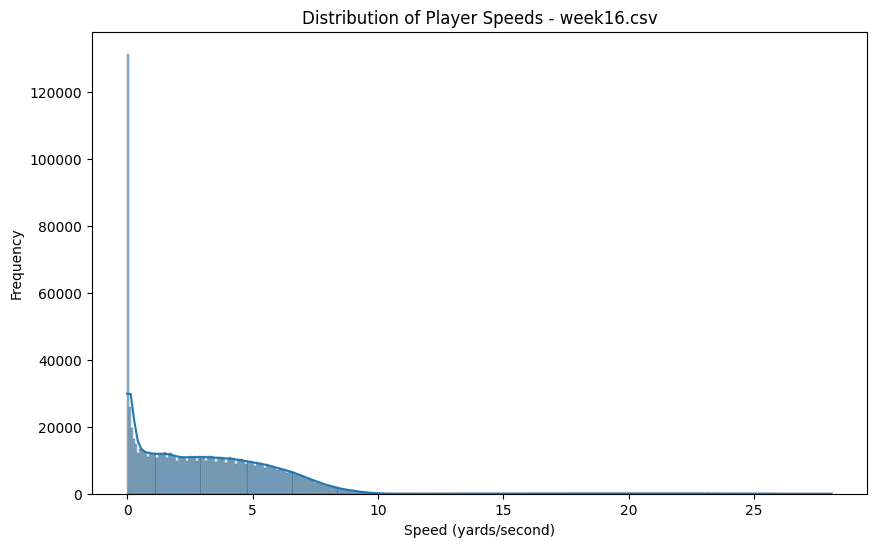

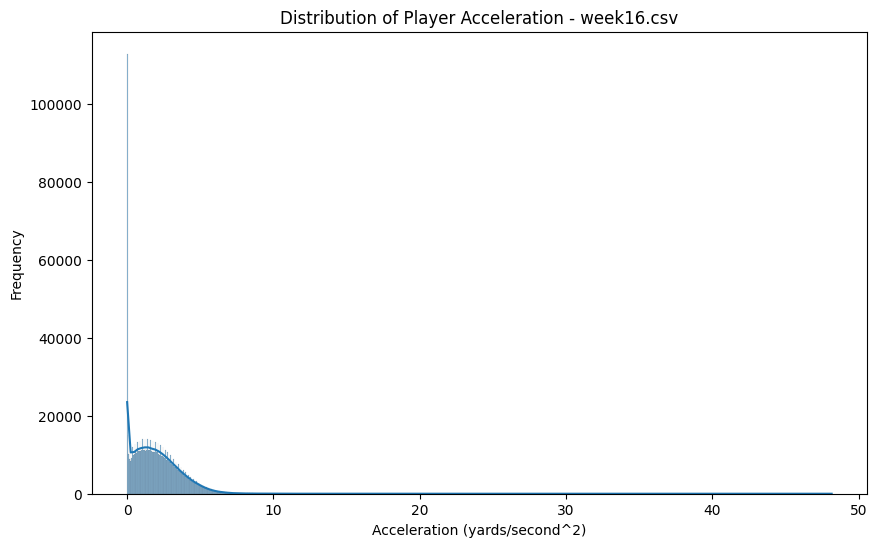

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


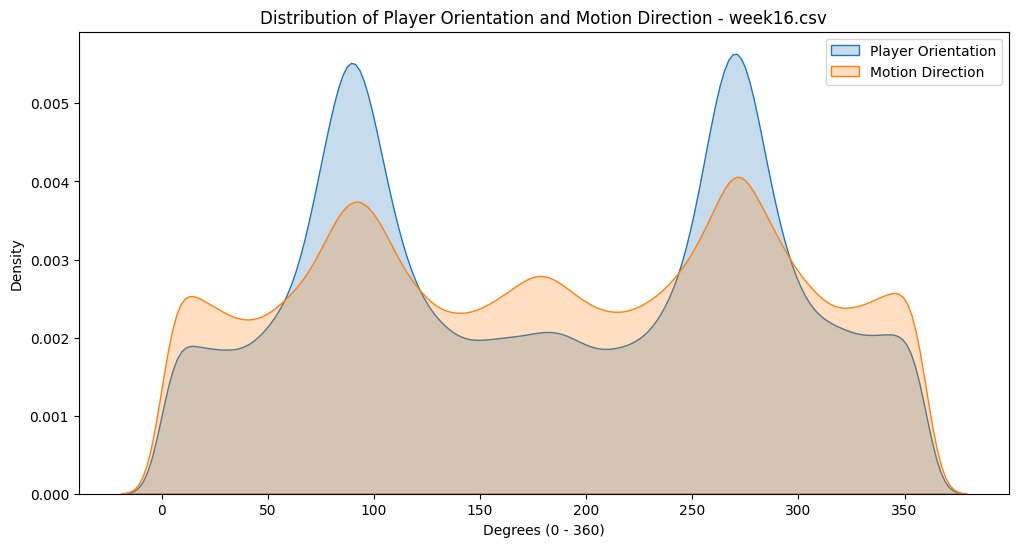

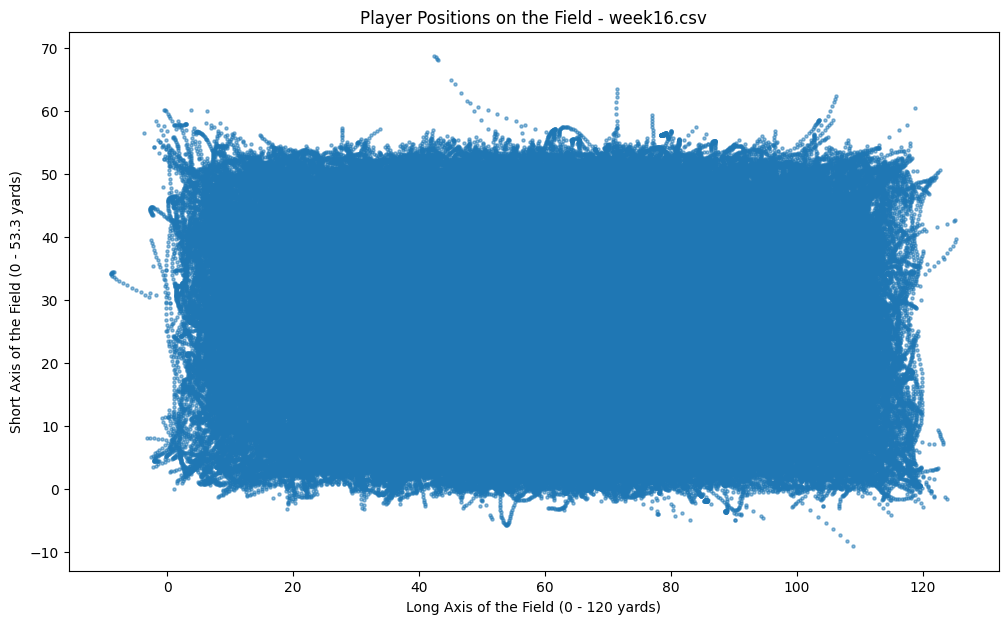

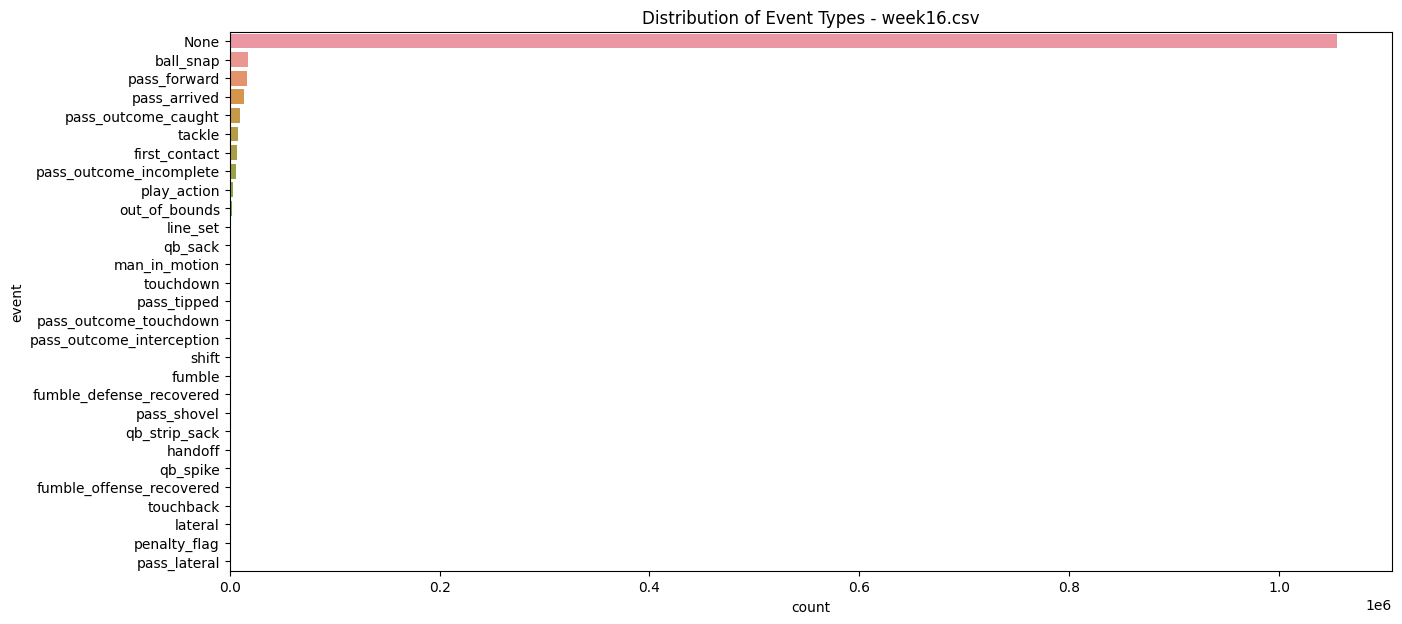

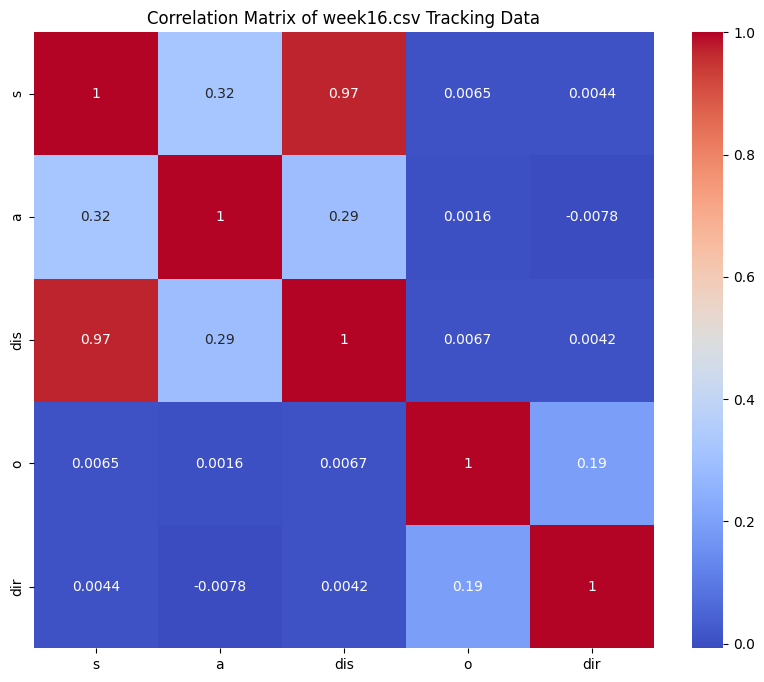

Processing week17.csv
                       time      x      y     s     a   dis       o     dir  \
0  2018-12-30T18:03:23.400Z  89.89  26.42  0.07  0.07  0.01  273.39  236.96   
1  2018-12-30T18:03:23.400Z  84.31  33.65  0.08  0.08  0.02  143.39  359.18   
2  2018-12-30T18:03:23.400Z  89.76  24.50  0.10  0.05  0.00  292.21  202.78   
3  2018-12-30T18:03:23.400Z  70.86  22.92  0.10  0.10  0.01   84.72  279.02   
4  2018-12-30T18:03:23.400Z  86.51  31.35  0.00  0.00  0.00  279.50   61.20   

  event      nflId        displayName  jerseyNumber position  frameId  team  \
0  None    79860.0   Matthew Stafford           9.0       QB        1  away   
1  None    80431.0      Clay Matthews          52.0      OLB        1  home   
2  None   497149.0  LeGarrette Blount          29.0       RB        1  away   
3  None  2506789.0    Tramon Williams          38.0       CB        1  home   
4  None  2540203.0     Levine Toilolo          87.0       TE        1  away   

       gameId  playId playDi

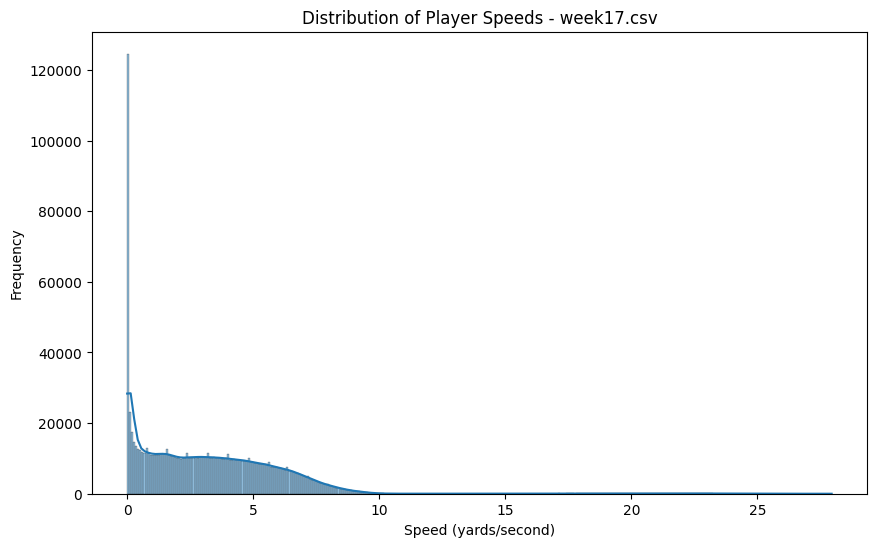

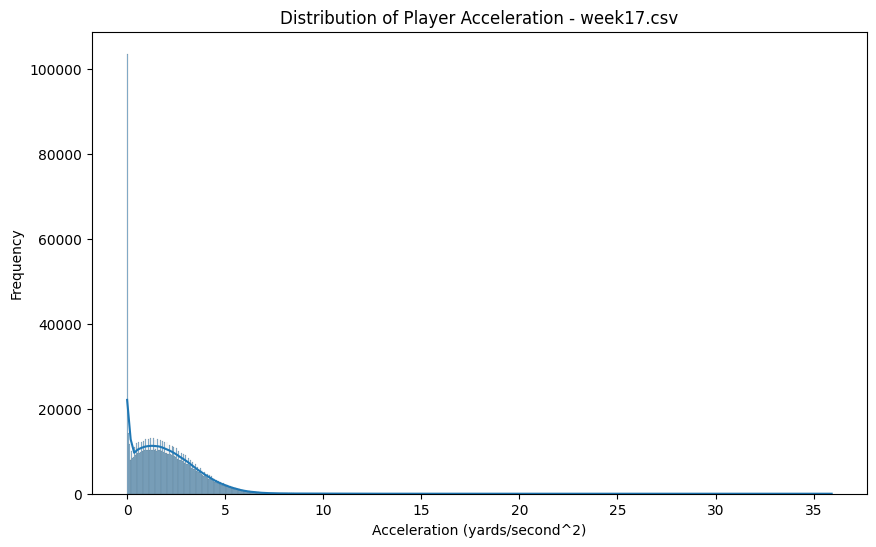

<ipython-input-38-e1030a510fb7>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['o'], label='Player Orientation', shade=True)
<ipython-input-38-e1030a510fb7>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dir'], label='Motion Direction', shade=True)


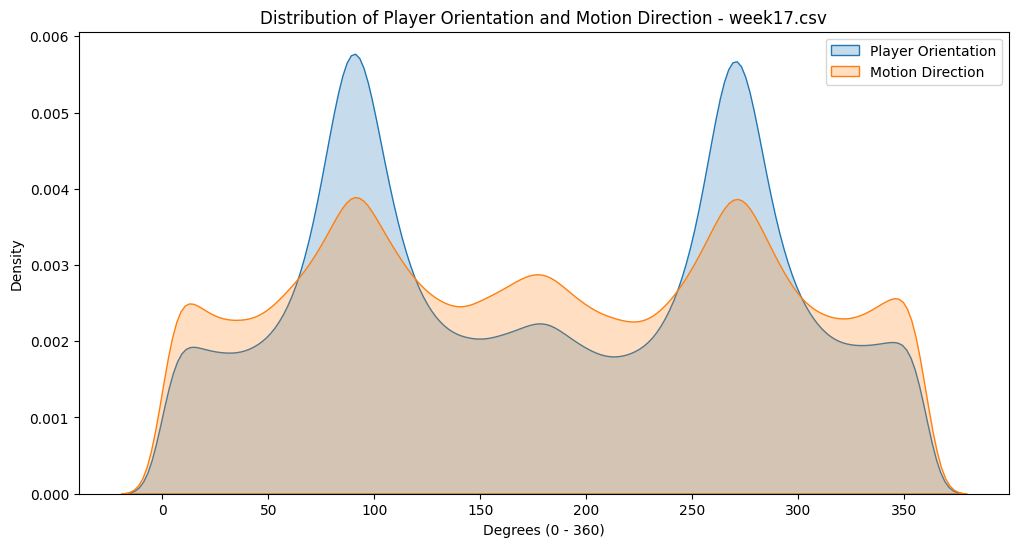

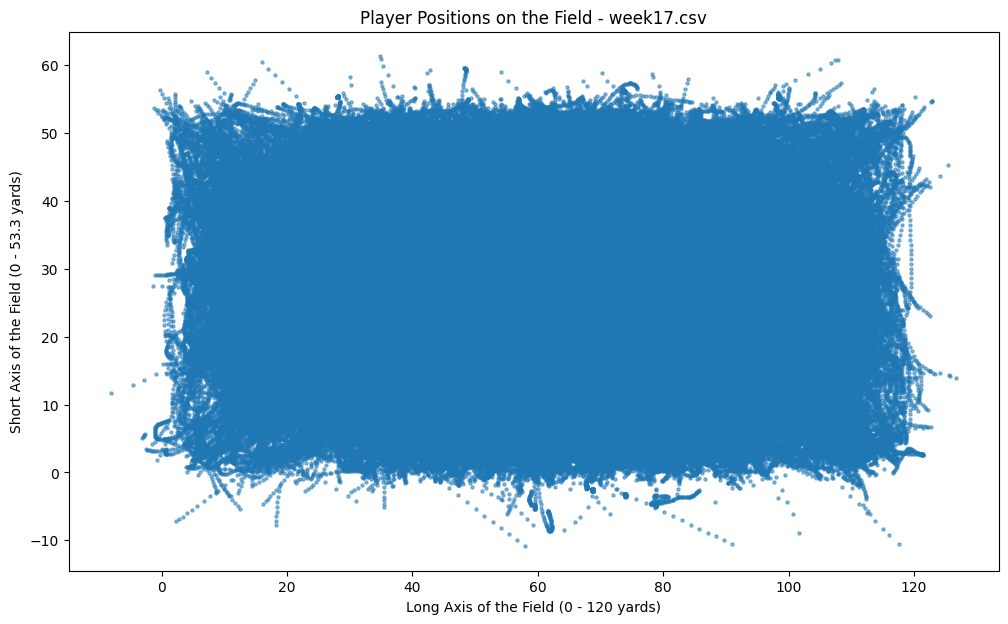

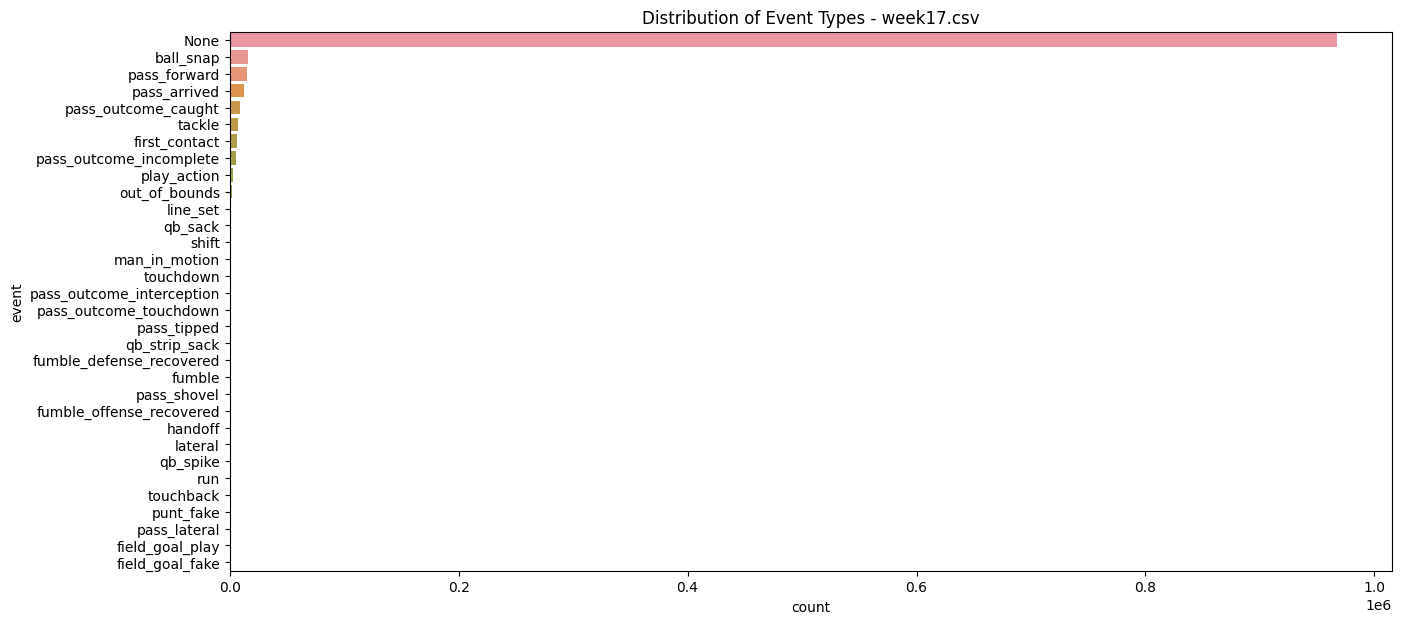

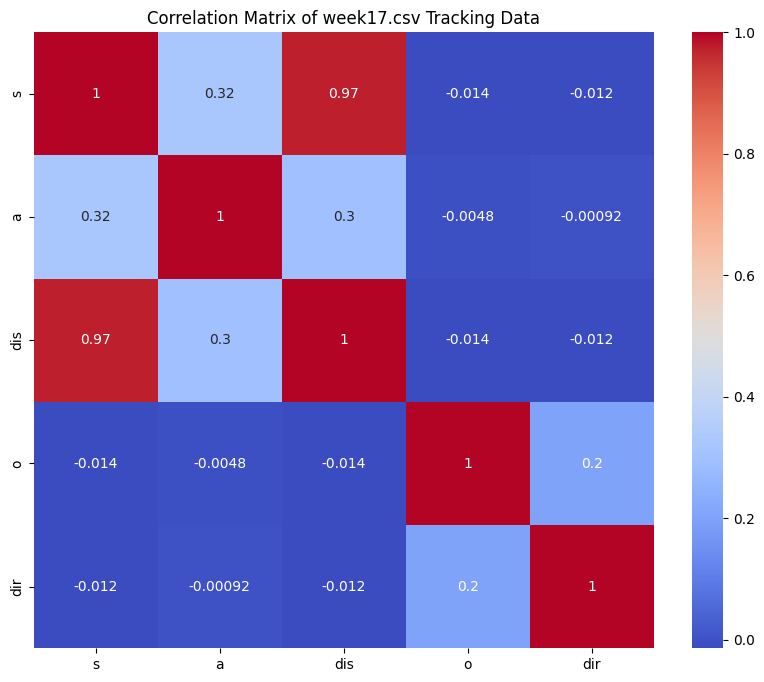

In [38]:
# Function to perform EDA for a given week's data
def perform_eda(filename):
    # Load the Dataset
    df = pd.read_csv(filename)

    # Quick Overview
    print(df.head())

    # Check for Missing Values
    missing_values = df.isnull().sum()
    print(missing_values)

    # Distribution of Player Speeds
    plt.figure(figsize=(10, 6))
    sns.histplot(df['s'], kde=True)
    plt.title(f'Distribution of Player Speeds - {filename}')
    plt.xlabel('Speed (yards/second)')
    plt.ylabel('Frequency')
    plt.show()

    # Distribution of Player Acceleration
    plt.figure(figsize=(10, 6))
    sns.histplot(df['a'], kde=True)
    plt.title(f'Distribution of Player Acceleration - {filename}')
    plt.xlabel('Acceleration (yards/second^2)')
    plt.ylabel('Frequency')
    plt.show()

    # Player Orientation & Motion Direction
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df['o'], label='Player Orientation', shade=True)
    sns.kdeplot(df['dir'], label='Motion Direction', shade=True)
    plt.title(f'Distribution of Player Orientation and Motion Direction - {filename}')
    plt.xlabel('Degrees (0 - 360)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Player Positions on the Field
    plt.figure(figsize=(12, 7))
    plt.scatter(df['x'], df['y'], alpha=0.5, s=5)
    plt.title(f'Player Positions on the Field - {filename}')
    plt.xlabel('Long Axis of the Field (0 - 120 yards)')
    plt.ylabel('Short Axis of the Field (0 - 53.3 yards)')
    plt.show()

    # Event Types Distribution
    plt.figure(figsize=(15, 7))
    sns.countplot(data=df, y='event', order=df['event'].value_counts().index)
    plt.title(f'Distribution of Event Types - {filename}')
    plt.show()

    # Correlations
    correlation = df[['s', 'a', 'dis', 'o', 'dir']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix of {filename} Tracking Data')
    plt.show()

# Loop through all the weeks
for i in range(1, 18):  # 17 weeks
    filename = f'week{i}.csv'
    print(f"Processing {filename}")
    perform_eda(filename)

